In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak 
import math
import numpy.ma as ma
import matplotlib.cm as cm
import astropy.coordinates as coord
import astropy.units as u

In [180]:
from astropy.io import fits
from astropy.table import Table
from scipy.optimize import curve_fit
from statistics import mean
from astropy.io import ascii

In [181]:
table = Table.read("C:\Aramaki Lab Research\MeV Gamma Ray Science\MeV Skymap Code\gll_psc_v22.fit")

In [182]:
table1 = Table.read("C:\Aramaki Lab Research\MeV Gamma Ray Science\MeV Skymap Code\BAT_105m_catalog_SED.fits")

In [183]:
FLE = Table.read("C:\Aramaki Lab Research\MeV Gamma Ray Science\MeV Skymap Code\J_A+A_618_A22_catalog.dat.fits")
bright_FLE = FLE[np.argsort(FLE['EF30-100'])]

# 3C 111

In [184]:
fermi_obj_name = table['ASSOC1']
objname_fermi = '3C 111                      ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)


[False False False ... False False False]


In [185]:
table[wg3]

Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J0418.2+3807,64.5633,38.1219,161.5931,-8.7665,0.0861,0.0761,-30.840,0.1396,0.1234,-30.840,1270,,12.816,533.06,8.1571e-10,8.7474e-11,1.5954e-11,1.3292e-12,PowerLaw,7.6458e-12,6.2213e-13,2.7072,0.0576,9.0865e-12,8.6599e-13,2.6614,0.0779,0.1143,0.0486,2.459,8.8779e-12,8.2629e-13,2.3501,0.1442,0.00554,0.00226,0.6667,--,2.669,1798.40,5.7128517e-08 .. 2.3774796e-15,-3.943616e-08 .. 5.4938307e-12,8.901447e-12 .. 9.820034e-17,1.449334 .. 0.0,24.0699,0.3006,0.1119,9.477,6.8108726e-08,7.698152e-09,412910016.0,31560000.0,3.8938797e-08 .. 2.8183136e-08,-7.2599637e-09 .. 7.045856e-09,5.600686 .. 4.262039,131.3466,0.5625,0.0882,10.170,1.521126e-07,1.6791525e-08,405020000.0,5260000.0,6.416886e-08 .. 3.3972317e-08,-1.550777e-08 .. 1.529521e-08,4.4187646 .. 2.4936156,3FGL J0418.5+3813c,,,,,N,,rdg,,3C 111,,0.9463,0.9883,64.5887,38.0266,0.00000,0


In [186]:
Obj_3C111_spectra_fermi = []

for gal in table[wg3]:
    Obj_3C111_spectra_fermi.extend(gal['nuFnu_Band'])

#print(Obj_3C111_spectra_fermi)

Obj_3C111_spectra_fermi = [i * (624151) for i in Obj_3C111_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_3C111_spectra_fermi)

Obj_3C111_spectra_fermi_yerrmin = [3.8352347871768785e-06, 8.469747747160102e-07, 3.0043451061896356e-07, 1.7400583890444486e-07, 1.217686827408546e-07, 0.0, 0.0]

Obj_3C111_spectra_fermi_yerrmax = [2.934220743738402e-06, 8.527917753154216e-07, 3.0795946913305923e-07, 1.7911944223117024e-07, 1.3180461610729193e-07, 1.3202226163278182e-07, 1.4163191638903185e-07]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[5.555847226003732e-06, 4.534243050906706e-06, 2.542196100637807e-06, 1.0631267796193953e-06, 4.322649915048933e-07, 4.196398169676875e-08, 6.129184117495984e-11]


In [187]:
obj_name = table1['COUNTERPART_NAME']
name = '3C 111.0'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
214,SWIFT J0418.3+3800,64.589,38.024,51.98,3C 111.0,0.0,64.5887,38.0266,118.67,116.60,122.05,0.0,2.00,1.94,2.06,1.20,0.0485,44.82,0.0,40,Sy1.2,3.0 .. 22.5,0.00114557613 .. 0.0205409676,0.0264436193 .. 0.0361678712


In [188]:
Obj_3C111_spectra_swift = [] 
Obj_3C111_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_3C111_spectra_swift.extend(gal['Flux'])
    Obj_3C111_spectra_swift_err.extend(gal['Flux_err'])

#print(Obj_3C111_spectra_swift)

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_3C111_spectra_swift = [i * (1e-3) for i in Obj_3C111_spectra_swift]
Obj_3C111_spectra_swift_err = [i * (1e-3) for i in Obj_3C111_spectra_swift_err]

print(Obj_3C111_spectra_swift)
print(Obj_3C111_spectra_swift_err)



#Obj_3C111_spectra_swift_err = [1.1455761300000001e-06, 1.19316543e-06, 1.0470750300000002e-06, 1.2184768000000002e-06, 1.4117163400000002e-06, 2.51005334e-06, 4.63173445e-06, 2.05409676e-05]

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[2.64436193e-05, 2.88153719e-05, 2.96614654e-05, 2.73679886e-05, 2.89530028e-05, 2.5202706500000003e-05, 2.59074569e-05, 3.61678712e-05]
[1.1455761300000001e-06, 1.19316543e-06, 1.0470750300000002e-06, 1.2184768000000002e-06, 1.4117163400000002e-06, 2.51005334e-06, 4.63173445e-06, 2.05409676e-05]


In [189]:
Obj_3C111_COMPTEL_PhotonFlux_075_1MEV = 22.8 * (1e-5)
Obj_3C111_COMPTEL_PhotonFlux_1_3MEV = 3 * (1e-5)

Obj_3C111_COMPTEL_EnergyFlux_075_1MEV = math.sqrt(0.75) * Obj_3C111_COMPTEL_PhotonFlux_075_1MEV
Obj_3C111_COMPTEL_PhotonFlux_1_3MEV = math.sqrt(3) * Obj_3C111_COMPTEL_PhotonFlux_1_3MEV

COMPTEL_EnergyBand = [math.sqrt(0.75), math.sqrt(3)]
print(COMPTEL_EnergyBand)

Obj_3C111_COMPTEL_EnergyFlux = [Obj_3C111_COMPTEL_EnergyFlux_075_1MEV, Obj_3C111_COMPTEL_PhotonFlux_1_3MEV]
print(Obj_3C111_COMPTEL_EnergyFlux)

Obj_3C111_COMPTEL_EnergyFlux_err = [0,0]

[0.8660254037844386, 1.7320508075688772]
[0.00019745379206285201, 5.1961524227066324e-05]


In [190]:
Energy_Bands = Bat_Energy_BandMeV + COMPTEL_EnergyBand + Fermi_Energy_BandMeV
print(Energy_Bands)

Spectra_3C111 = Obj_3C111_spectra_swift + Obj_3C111_COMPTEL_EnergyFlux + Obj_3C111_spectra_fermi
print(Spectra_3C111)

Spectra_3C111_minerr = Obj_3C111_spectra_swift_err + Obj_3C111_COMPTEL_EnergyFlux_err + Obj_3C111_spectra_fermi_yerrmin

Spectra_3C111_maxerr = Obj_3C111_spectra_swift_err + Obj_3C111_COMPTEL_EnergyFlux_err + Obj_3C111_spectra_fermi_yerrmax

Obj_3C111_spectra_fermi_yerr = [Obj_3C111_spectra_fermi_yerrmin, Obj_3C111_spectra_fermi_yerrmax]

Spectra_3C111_err = [Spectra_3C111_minerr, Spectra_3C111_maxerr]

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707, 0.8660254037844386, 1.7320508075688772, 70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[2.64436193e-05, 2.88153719e-05, 2.96614654e-05, 2.73679886e-05, 2.89530028e-05, 2.5202706500000003e-05, 2.59074569e-05, 3.61678712e-05, 0.00019745379206285201, 5.1961524227066324e-05, 5.555847226003732e-06, 4.534243050906706e-06, 2.542196100637807e-06, 1.0631267796193953e-06, 4.322649915048933e-07, 4.196398169676875e-08, 6.129184117495984e-11]


Text(0.5, 1.0, 'Spectra of Object 3C 111')

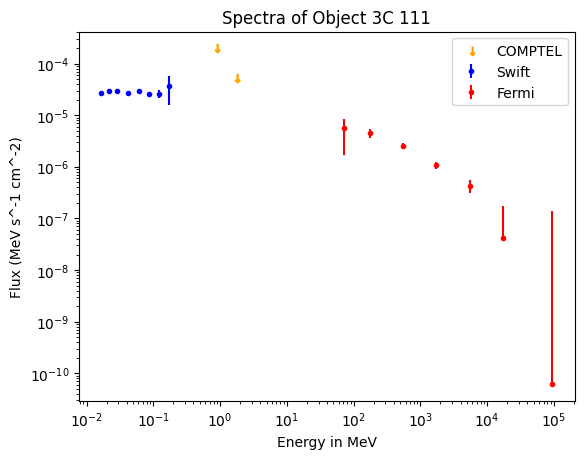

In [191]:
plt.errorbar(Bat_Energy_BandMeV, Obj_3C111_spectra_swift, yerr = Obj_3C111_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.scatter(COMPTEL_EnergyBand, Obj_3C111_COMPTEL_EnergyFlux, marker = r'$\downarrow$', color = 'orange', label = 'COMPTEL')
plt.errorbar(Fermi_Energy_BandMeV, Obj_3C111_spectra_fermi, yerr = Obj_3C111_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of Object 3C 111')


# 3C 120

In [192]:
fermi_obj_name = table['ASSOC1']
objname_fermi = '3C 120                      ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)
table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J0433.0+0522,68.2618,5.3696,190.3369,-27.4165,0.0445,0.0400,-89.140,0.0721,0.0649,-89.140,1026,,18.124,445.67,6.9478e-10,7.5639e-11,1.2992e-11,1.1319e-12,LogParabola,1.1410e-11,7.4189e-13,2.7163,0.0504,1.4416e-11,1.0680e-12,2.5347,0.0860,0.2830,0.0777,4.861,1.3938e-11,1.0738e-12,1.8836,0.2737,0.01517,0.00517,0.6667,--,4.866,1781.19,5.067217e-08 .. 3.5641467e-18,-2.7477222e-08 .. 4.8173245e-12,8.283641e-12 .. 9.906823e-20,1.8227217 .. 0.0,227.4511,0.9986,0.2743,18.076,1.00748736e-07,7.0755717e-09,444470016.0,31560000.0,4.128177e-09 .. 4.9673655e-08,-3.866326e-09 .. 5.872722e-09,1.0593493 .. 10.047023,409.2463,1.1603,0.1327,12.982,1.8712316e-07,1.8940618e-08,452360000.0,5260000.0,6.843403e-12 .. 3.107877e-08,-- .. 1.3088205e-08,0.0 .. 2.7165759,,,,,,N,,RDG,,3C 120,,1.0000,0.9913,68.2962,5.3543,0.00000,0


In [193]:
Obj_3C120_spectra_fermi = []

for gal in table[wg3]:
    Obj_3C120_spectra_fermi.extend(gal['nuFnu_Band'])

#print(Obj_3C111_spectra_fermi)

Obj_3C120_spectra_fermi = [i * (624151) for i in Obj_3C120_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_3C120_spectra_fermi)

Obj_3C120_spectra_fermi_yerrmin = [2.803588479110451e-06, 5.441999766152338e-07, 2.0466190113428103e-07, 1.182712211695126e-07, 6.222254418181836e-08, 0.0, 0.0]
Obj_3C120_spectra_fermi_yerrmax = [2.821968232631731e-06, 5.381445235734614e-07, 2.0466190831208275e-07, 1.2456497140245302e-07, 7.596224712531148e-08, 7.882189616789952e-08, 8.35746129646106e-08]
Obj_3C120_spectra_fermi_yerr = [Obj_3C120_spectra_fermi_yerrmin, Obj_3C120_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[5.170242897516858e-06, 3.4682878437618074e-06, 2.4382749215221856e-06, 8.557591982266558e-07, 1.3840854640005673e-07, 3.088336859848154e-11, 6.183353455141128e-14]


In [194]:
obj_name = table1['COUNTERPART_NAME']
name = '3C 120'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
226,SWIFT J0433.0+0521,68.298,5.356,43.40,3C 120,0.0,68.2962,5.3543,95.38,93.05,98.49,0.0,2.01,1.93,2.08,0.80,0.033,44.38,0.0,80,Beamed AGN,3.0 .. 22.5,0.00105719594 .. 0.0208430421,0.0215589516 .. 0.00564944046


In [195]:
Obj_3C120_spectra_swift = [] 
Obj_3C120_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_3C120_spectra_swift.extend(gal['Flux'])
    Obj_3C120_spectra_swift_err.extend(gal['Flux_err'])


Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_3C120_spectra_swift = [i * (1e-3) for i in Obj_3C120_spectra_swift]
Obj_3C120_spectra_swift_err = [i * (1e-3) for i in Obj_3C120_spectra_swift_err]

print(Obj_3C120_spectra_swift)
print(Obj_3C120_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[2.15589516e-05, 2.30989195e-05, 2.3432770700000003e-05, 2.37078518e-05, 2.20299866e-05, 2.1233560499999998e-05, 1.79352593e-05, 5.64944046e-06]
[1.0571959400000001e-06, 1.18502625e-06, 1.0364597e-06, 1.19404017e-06, 1.49260834e-06, 2.6709111400000003e-06, 4.71821055e-06, 2.08430421e-05]


In [196]:
Obj_3C120_COMPTEL_PhotonFlux_075_1MEV = 27.3 * (1e-5)
Obj_3C120_COMPTEL_PhotonFlux_1_3MEV = 3.8 * (1e-5)

Obj_3C120_COMPTEL_EnergyFlux_075_1MEV = math.sqrt(0.75) * Obj_3C120_COMPTEL_PhotonFlux_075_1MEV
Obj_3C120_COMPTEL_EnergyFlux_1_3MEV = math.sqrt(3) * Obj_3C120_COMPTEL_PhotonFlux_1_3MEV

Obj_3C120_COMPTEL_Energy = [math.sqrt(0.75), math.sqrt(3)]

Obj_3C120_COMPTEL_EnergyFlux = [Obj_3C120_COMPTEL_EnergyFlux_075_1MEV, Obj_3C120_COMPTEL_EnergyFlux_1_3MEV]

Text(0.5, 1.0, 'Spectra of 3C 120')

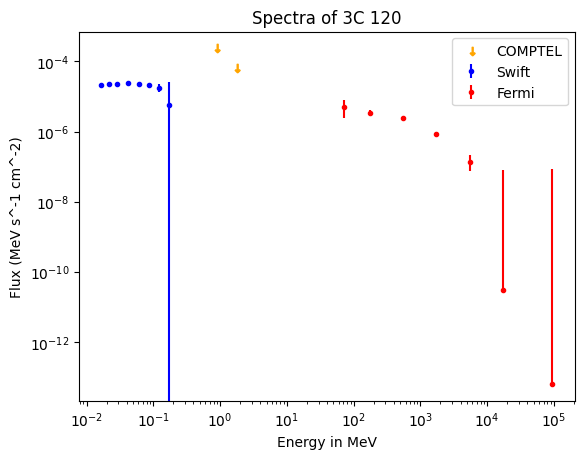

In [197]:
plt.errorbar(Bat_Energy_BandMeV, Obj_3C120_spectra_swift, yerr = Obj_3C120_spectra_swift_err, fmt = 'o', color = 'blue', markersize = 3, label = 'Swift')
plt.scatter(Obj_3C120_COMPTEL_Energy, Obj_3C120_COMPTEL_EnergyFlux, marker = r'$\downarrow$', color = 'orange', label = 'COMPTEL')
plt.errorbar(Fermi_Energy_BandMeV, Obj_3C120_spectra_fermi, yerr = Obj_3C120_spectra_fermi_yerr, fmt = 'o', color = 'red', markersize = 3, label = 'Fermi')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of 3C 120')

# 3C 273

In [198]:
fermi_obj_name = table['ASSOC1']
objname_fermi = '3C 273                      ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]


[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J1229.0+0202,187.2675,2.0454,289.9305,64.3510,0.0090,0.0088,88.230,0.0146,0.0143,88.230,1208,,135.872,279.05,6.2881e-09,1.4483e-10,1.2873e-10,1.5582e-12,LogParabola,3.6662e-10,4.4482e-12,2.7049,0.0109,3.9371e-10,5.4815e-12,2.6083,0.0156,0.0917,0.0093,8.696,3.8336e-10,5.0600e-12,2.4512,0.0291,0.00511,0.00057,0.6667,--,8.878,15287.06,6.1187336e-07 .. 3.3676237e-12,-3.736698e-08 .. 4.8877387e-12,9.664999e-11 .. 1.10055973e-13,18.304876 .. 1.9060148,6361.0679,0.9583,0.2563,125.509,1.0176407e-06,1.35996805e-08,286670016.0,31560000.0,4.975151e-07 .. 2.9988996e-07,-8.881011e-09 .. 8.9901055e-09,86.491905 .. 48.23688,12153.2773,1.1640,0.1204,99.685,2.0882555e-06,3.5279548e-08,273520000.0,5260000.0,6.503525e-07 .. 1.6970517e-07,-2.0927224e-08 .. 1.7773973e-08,47.125755 .. 12.778085,3FGL J1229.1+0202,3FHL J1229.2+0201,J1228+0154,3EG J1229+0210,EGR J1229+0203,N,,FSRQ,,3C 273,,1.0000,0.9998,187.2779,2.0524,0.00000,0


In [199]:
Obj_3C273_spectra_fermi = []

for gal in table[wg3]:
    Obj_3C273_spectra_fermi.extend(gal['nuFnu_Band'])

#print(Obj_3C111_spectra_fermi)

Obj_3C273_spectra_fermi = [i * (624151) for i in Obj_3C273_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_3C273_spectra_fermi)

Obj_3C273_spectra_fermi_yerrmin = [3.683985674416204e-06, 8.442139870464601e-07, 3.4609076218712663e-07, 2.422386578232016e-07, 1.908510182080077e-07, 1.4144101766306e-07, 5.172677499143576e-08]
Obj_3C273_spectra_fermi_yerrmax = [3.683985674416204e-06, 8.442139870464601e-07, 3.4609076218712663e-07, 2.422386578232016e-07, 1.908510182080077e-07, 1.7405769924002767e-07, 9.969828917995142e-08]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[6.032418580202009e-05, 3.9444581008567237e-05, 1.9985055935031054e-05, 7.876183412333475e-06, 2.1914352220642457e-06, 4.573640122290906e-07, 6.869154585044396e-08]


In [200]:
obj_name = table1['COUNTERPART_NAME']
name = '3C 273'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
619,SWIFT J1229.1+0202,187.276,2.047,197.62,3C 273,0.0,187.2779,2.0524,421.57,418.49,424.66,0.0,1.75,1.73,1.77,0.70,0.1583,46.46,0.0,80,Beamed AGN,3.0 .. 22.5,0.000884711219 .. 0.0188428052,0.0735220909 .. 0.15560098


In [201]:
Obj_3C273_spectra_swift = [] 
Obj_3C273_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_3C273_spectra_swift.extend(gal['Flux'])
    Obj_3C273_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_3C273_spectra_swift = [i * (1e-3) for i in Obj_3C273_spectra_swift]
Obj_3C273_spectra_swift_err = [i * (1e-3) for i in Obj_3C273_spectra_swift_err]

print(Obj_3C273_spectra_swift)
print(Obj_3C273_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[7.35220909e-05, 7.88383186e-05, 8.4435761e-05, 9.35884714e-05, 0.000100185104, 0.00011159676300000001, 0.000122341111, 0.00015560098]
[8.84711219e-07, 1.05392095e-06, 8.95128236e-07, 1.02069112e-06, 1.2564923400000001e-06, 2.2350503100000004e-06, 4.18877369e-06, 1.88428052e-05]


In [202]:
Obj_3C273_COMPTEL_PhotonFlux_075_1MEV1 = 13.8 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_1_3MEV1 = 10.7 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_3_10MEV1 = 5.6 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1 = 1.7 * (1e-5)

Obj_3C273_COMPTEL_EnergyFlux_075_1MEV1 = math.sqrt(0.75) * Obj_3C273_COMPTEL_PhotonFlux_075_1MEV1
Obj_3C273_COMPTEL_EnergyFlux_1_3MEV1 = math.sqrt(3) * Obj_3C273_COMPTEL_PhotonFlux_1_3MEV1
Obj_3C273_COMPTEL_EnergyFlux_3_10MEV1 = math.sqrt(30) * Obj_3C273_COMPTEL_PhotonFlux_3_10MEV1
Obj_3C273_COMPTEL_EnergyFlux_10_30MEV1 = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1

Obj_3C273_COMPTEL_PhotonFlux_075_1MEV1_err = 4.8 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_1_3MEV1_err = 3.7 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_3_10MEV1_err = 1.9 * (1e-5)
#Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1_err = 0 * (1e-5)

Obj_3C273_COMPTEL_EnergyFlux_075_1MEV1_err = math.sqrt(0.75) * Obj_3C273_COMPTEL_PhotonFlux_075_1MEV1_err
Obj_3C273_COMPTEL_EnergyFlux_1_3MEV1_err = math.sqrt(3) * Obj_3C273_COMPTEL_PhotonFlux_1_3MEV1_err
Obj_3C273_COMPTEL_EnergyFlux_3_10MEV1_err = math.sqrt(30) * Obj_3C273_COMPTEL_PhotonFlux_3_10MEV1_err
#Obj_3C273_COMPTEL_EnergyFlux_10_30MEV1_err = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1_err

COMPTEL_EnergyBand = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30)]
print(COMPTEL_EnergyBand)

Obj_3C273_COMPTEL_EnergyFlux1 = [Obj_3C273_COMPTEL_EnergyFlux_075_1MEV1, Obj_3C273_COMPTEL_EnergyFlux_1_3MEV1, Obj_3C273_COMPTEL_EnergyFlux_3_10MEV1]
print(Obj_3C273_COMPTEL_EnergyFlux1)

Obj_3C273_COMPTEL_EnergyFlux_err1 = [Obj_3C273_COMPTEL_EnergyFlux_075_1MEV1_err, Obj_3C273_COMPTEL_EnergyFlux_1_3MEV1_err, Obj_3C273_COMPTEL_EnergyFlux_3_10MEV1_err]
print(Obj_3C273_COMPTEL_EnergyFlux_err1)

[0.8660254037844386, 1.7320508075688772, 5.477225575051661]
[0.00011951150572225254, 0.00018532943640986986, 0.00030672463220289304]
[4.1569219381653056e-05, 6.408587988004847e-05, 0.00010406728592598157]


In [203]:
Obj_3C273_COMPTEL_PhotonFlux_075_1MEV2 = 27.6 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_1_3MEV2 = 6.1 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_3_10MEV2 = 1.1 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_10_30MEV2 = 0.08 * (1e-5)

Obj_3C273_COMPTEL_EnergyFlux_075_1MEV2 = math.sqrt(0.75) * Obj_3C273_COMPTEL_PhotonFlux_075_1MEV2
Obj_3C273_COMPTEL_EnergyFlux_1_3MEV2 = math.sqrt(3) * Obj_3C273_COMPTEL_PhotonFlux_1_3MEV2
Obj_3C273_COMPTEL_EnergyFlux_3_10MEV2 = math.sqrt(30) * Obj_3C273_COMPTEL_PhotonFlux_3_10MEV2
Obj_3C273_COMPTEL_EnergyFlux_10_30MEV2 = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV2

Obj_3C273_COMPTEL_PhotonFlux_075_1MEV2_err = 9.6 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_1_3MEV2_err = 2.1 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_3_10MEV2_err = 0.4 * (1e-5)
#Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1_err = 0 * (1e-5)

Obj_3C273_COMPTEL_EnergyFlux_075_1MEV2_err = math.sqrt(0.75) * Obj_3C273_COMPTEL_PhotonFlux_075_1MEV2_err
Obj_3C273_COMPTEL_EnergyFlux_1_3MEV2_err = math.sqrt(3) * Obj_3C273_COMPTEL_PhotonFlux_1_3MEV2_err
Obj_3C273_COMPTEL_EnergyFlux_3_10MEV2_err = math.sqrt(30) * Obj_3C273_COMPTEL_PhotonFlux_3_10MEV2_err
#Obj_3C273_COMPTEL_EnergyFlux_10_30MEV1_err = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1_err

COMPTEL_EnergyBand = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30)]
print(COMPTEL_EnergyBand)

Obj_3C273_COMPTEL_EnergyFlux2 = [Obj_3C273_COMPTEL_EnergyFlux_075_1MEV2, Obj_3C273_COMPTEL_EnergyFlux_1_3MEV2, Obj_3C273_COMPTEL_EnergyFlux_3_10MEV2]
print(Obj_3C273_COMPTEL_EnergyFlux2)

Obj_3C273_COMPTEL_EnergyFlux_err2 = [Obj_3C273_COMPTEL_EnergyFlux_075_1MEV2_err, Obj_3C273_COMPTEL_EnergyFlux_1_3MEV2_err, Obj_3C273_COMPTEL_EnergyFlux_3_10MEV2_err]
print(Obj_3C273_COMPTEL_EnergyFlux_err2)

[0.8660254037844386, 1.7320508075688772, 5.477225575051661]
[0.00023902301144450508, 0.00010565509926170151, 6.024948132556828e-05]
[8.313843876330611e-05, 3.637306695894642e-05, 2.190890230020665e-05]


In [204]:
Energy_Bands = Bat_Energy_BandMeV + COMPTEL_EnergyBand + Fermi_Energy_BandMeV
print(Energy_Bands)

Spectra_3C273 = Obj_3C273_spectra_swift + Obj_3C273_COMPTEL_EnergyFlux1 + Obj_3C273_spectra_fermi
print(Spectra_3C273)

Spectra_3C273_minerr = Obj_3C273_spectra_swift_err + Obj_3C273_COMPTEL_EnergyFlux_err1 + Obj_3C273_spectra_fermi_yerrmin

Spectra_3C273_maxerr = Obj_3C273_spectra_swift_err + Obj_3C273_COMPTEL_EnergyFlux_err1 + Obj_3C273_spectra_fermi_yerrmax

Spectra_3C273_err = [Spectra_3C273_minerr, Spectra_3C273_maxerr]

Upper_lim_3C273 = [(math.sqrt(300),Obj_3C273_COMPTEL_EnergyFlux_10_30MEV1)]

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707, 0.8660254037844386, 1.7320508075688772, 5.477225575051661, 70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[7.35220909e-05, 7.88383186e-05, 8.4435761e-05, 9.35884714e-05, 0.000100185104, 0.00011159676300000001, 0.000122341111, 0.00015560098, 0.00011951150572225254, 0.00018532943640986986, 0.00030672463220289304, 6.032418580202009e-05, 3.9444581008567237e-05, 1.9985055935031054e-05, 7.876183412333475e-06, 2.1914352220642457e-06, 4.573640122290906e-07, 6.869154585044396e-08]


In [205]:
Obj_3C273_spectra_swift_err = [Obj_3C273_spectra_swift_err, Obj_3C273_spectra_swift_err]
Obj_3C273_COMPTEL_EnergyFlux_err1 = [Obj_3C273_COMPTEL_EnergyFlux_err1, Obj_3C273_COMPTEL_EnergyFlux_err1]
Obj_3C273_spectra_fermi_yerr = [Obj_3C273_spectra_fermi_yerrmin, Obj_3C273_spectra_fermi_yerrmax]

In [206]:
FLE_obj_name = bright_FLE['AssocCOMP']
obj_name_COMP = '3C273                  '

wg9 = (obj_name_COMP == FLE_obj_name)
print(wg9)

bright_FLE[wg9]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

Name,RAdeg,DEdeg,GLON,GLAT,ePos,Signi,EF30-100,e_EF30-100,EF100-300,e_EF100-300,F30-100,e_F30-100,F100-300,e_F100-300,Class1,z,Assoc1,Assoc3FGL,AssocCOMP
,deg,deg,deg,deg,deg,,mW / m2,mW / m2,mW / m2,mW / m2,1/cm2/s,1/cm2/s,1/cm2/s,1/cm2/s,,,,,
bytes15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,bytes18,bytes18,bytes23
1FLE J1227+0218,186.971298,2.308913,289.132965,64.547798,0.243569,31.050,6.490310e-11,1.439090e-11,3.745700e-11,1.063370e-11,7.790260e-07,1.727320e-07,2.470080e-07,4.046980e-08,fsrq,0.158000,3FGL J1229.1+0202,3FGL J1229.1+0202,3C273


In [207]:
EFBucket30_100 = []
EFBucket30_100e = []
EFBucket100_300 = []
EFBucket100_300e = []

for gal in bright_FLE[wg9]:
    EFBucket30_100.append(gal['EF30-100'])
    EFBucket30_100e.append(gal['e_EF30-100'])
    EFBucket100_300.append(gal['EF100-300'])
    EFBucket100_300e.append(gal['e_EF100-300'])

print(EFBucket30_100)
print(EFBucket30_100e)
print(EFBucket100_300)
print(EFBucket100_300e)

EF_FLE = EFBucket30_100 + EFBucket100_300
EF_FLEe = EFBucket30_100e + EFBucket100_300e

EF_FLE = [624151 * x for x in EF_FLE]
EF_FLEe = [624151 * x for x in EF_FLEe]


print(EF_FLE)
print(EF_FLEe)

EBucket30_100 = math.sqrt(30*100)
EBucket100_300 = math.sqrt(100*300)

EBuckets = [EBucket30_100, EBucket100_300]
print(EBuckets)

[6.49031e-11]
[1.43909e-11]
[3.7457e-11]
[1.06337e-11]
[4.0509334768099995e-05, 2.3378824007e-05]
[8.982094625899999e-06, 6.6370344887e-06]
[54.772255750516614, 173.20508075688772]


Text(0.5, 1.0, '3C 273')

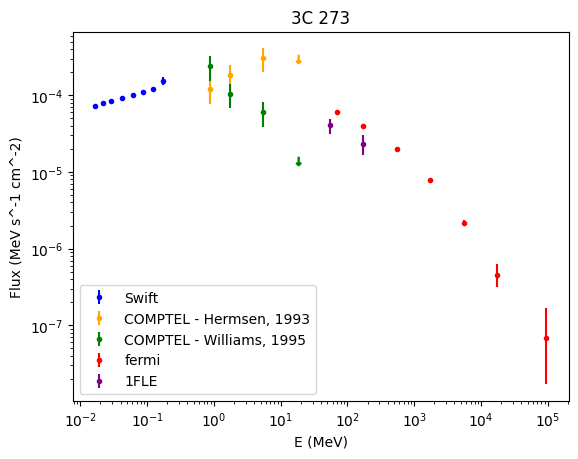

In [208]:
plt.errorbar(Bat_Energy_BandMeV, Obj_3C273_spectra_swift, yerr = Obj_3C273_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(COMPTEL_EnergyBand, Obj_3C273_COMPTEL_EnergyFlux1, yerr = Obj_3C273_COMPTEL_EnergyFlux_err1, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL - Hermsen, 1993')
plt.errorbar(COMPTEL_EnergyBand, Obj_3C273_COMPTEL_EnergyFlux2, yerr = Obj_3C273_COMPTEL_EnergyFlux_err2, fmt = 'o', markersize = 3, color = 'green', label = 'COMPTEL - Williams, 1995')
plt.scatter(math.sqrt(300),Obj_3C273_COMPTEL_EnergyFlux_10_30MEV2, marker = r'$\downarrow$', color = 'green')
plt.scatter(math.sqrt(300),Obj_3C273_COMPTEL_EnergyFlux_10_30MEV1, marker = r'$\downarrow$', color = 'orange')
plt.errorbar(Fermi_Energy_BandMeV, Obj_3C273_spectra_fermi, yerr = Obj_3C273_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'fermi')
plt.errorbar(EBuckets, EF_FLE, yerr = EF_FLEe, fmt = 'o', markersize = 3, color = 'purple', label = '1FLE')
plt.legend(loc='lower left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E (MeV)')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('3C 273')

# 3C 279

In [209]:
fermi_obj_name = table['ASSOC1']
objname_fermi = '3C 279                      ' 

wg4 = (fermi_obj_name == objname_fermi)
print(wg4)

table[wg4]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J1256.1-0547,194.0415,-5.7887,305.0952,57.0632,0.0054,0.0054,-80.290,0.0088,0.0088,-80.290,350,,200.439,441.99,2.4531e-08,2.8454e-10,2.7903e-10,2.6584e-12,LogParabola,2.1955e-10,1.8581e-12,2.3381,0.0066,2.3595e-10,2.2839e-12,2.2534,0.0093,0.0699,0.0048,12.667,2.2823e-10,2.0762e-12,2.1557,0.0149,0.00235,0.00018,0.6667,--,12.640,25713.41,5.879691e-07 .. 6.7262994e-11,-3.280813e-08 .. 1.6311114e-11,9.420267e-11 .. 2.5494641e-12,7.1564097 .. 12.653219,5667.2402,0.5543,0.1483,126.090,8.884944e-07,1.1771937e-08,444470016.0,31560000.0,6.327132e-07 .. 3.987742e-07,-9.104593e-09 .. 8.88e-09,115.81551 .. 71.96925,16261.5596,0.9023,0.0933,135.737,2.523134e-06,3.3842028e-08,457620000.0,5260000.0,3.194375e-07 .. 2.8929236e-07,-1.5916243e-08 .. 1.7506382e-08,31.13378 .. 24.628963,3FGL J1256.1-0547,3FHL J1256.1-0547,J1255-0543,3EG J1255-0549,EGR J1256-0552,P,3C 279,FSRQ,,3C 279,,1.0000,1.0000,194.0465,-5.7893,0.00000,0


In [210]:
Obj_3C279_spectra_fermi = []

for gal in table[wg4]:
    Obj_3C279_spectra_fermi.extend(gal['nuFnu_Band'])

#print(Obj_3C111_spectra_fermi)

Obj_3C279_spectra_fermi = [i * (624151) for i in Obj_3C279_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_3C279_spectra_fermi)

Obj_3C279_spectra_fermi_yerrmin = [3.280801068787295e-06, 1.851202804100966e-06, 5.377148153459105e-07, 4.6769907030168095e-07, 5.061720321495916e-07, 5.602445868928751e-07, 3.33107145009321e-07]
Obj_3C279_spectra_fermi_yerrmax = [3.280801068787295e-06, 1.851202804100966e-06, 5.377148153459105e-07, 4.6769907030168095e-07, 5.061720321495916e-07, 5.602445868928751e-07, 3.858744356349483e-07]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[5.879669283001543e-05, 5.39692442235451e-05, 4.3085094015155034e-05, 2.878121231601055e-05, 1.6502839048320242e-05, 6.3296842085771785e-06, 1.5912505749969552e-06]


In [211]:
obj_name = table1['COUNTERPART_NAME']
name = '3C 279'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
645,SWIFT J1256.2-0551,194.053,-5.799,12.29,3C 279,0.0,194.0465,-5.7893,38.82,34.66,42.49,0.0,1.32,1.09,1.54,1.20,0.5362,46.64,0.0,80,Beamed AGN,3.0 .. 22.5,0.00098094705 .. 0.0198482554,0.0032997462 .. -0.00611037342


In [212]:
Obj_3C279_spectra_swift = [] 
Obj_3C279_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_3C279_spectra_swift.extend(gal['Flux'])
    Obj_3C279_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_3C279_spectra_swift = [i * (1e-3) for i in Obj_3C279_spectra_swift]
Obj_3C279_spectra_swift_err = [i * (1e-3) for i in Obj_3C279_spectra_swift_err]

print(Obj_3C279_spectra_swift)
print(Obj_3C279_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[3.2997462000000002e-06, 4.36917087e-06, 6.35640323e-06, 7.06777116e-06, 7.05165602e-06, 1.2285606899999999e-05, 2.02630442e-05, -6.11037342e-06]
[9.8094705e-07, 1.08851376e-06, 9.48345696e-07, 1.0645842400000002e-06, 1.28471444e-06, 2.3395870799999997e-06, 4.34819609e-06, 1.98482554e-05]


In [213]:
Obj_3C279_COMPTEL_PhotonFlux_3_10MEV = 13.8 * (1e-5)
Obj_3C279_COMPTEL_PhotonFlux_10_30MEV = 2.9 * (1e-5)

Obj_3C279_COMPTEL_EnergyFlux_3_10MEV = math.sqrt(30) * Obj_3C279_COMPTEL_PhotonFlux_3_10MEV
Obj_3C279_COMPTEL_EnergyFlux_10_30MEV = math.sqrt(300) * Obj_3C279_COMPTEL_PhotonFlux_10_30MEV


Obj_3C279_COMPTEL_PhotonFlux_3_10MEV_err = 0 * (1e-5)
Obj_3C279_COMPTEL_PhotonFlux_10_30MEV_err = 0.9 * (1e-5)


Obj_3C279_COMPTEL_EnergyFlux_3_10MEV_err = math.sqrt(30) * Obj_3C279_COMPTEL_PhotonFlux_3_10MEV_err
#Obj_3C273_COMPTEL_EnergyFlux_10_30MEV1_err = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1_err

COMPTEL_EnergyBand = [math.sqrt(30)]
print(COMPTEL_EnergyBand)

Obj_3C279_COMPTEL_EnergyFlux = [Obj_3C279_COMPTEL_PhotonFlux_3_10MEV]
print(Obj_3C279_COMPTEL_EnergyFlux)

Obj_3C279_COMPTEL_EnergyFlux_err = [Obj_3C279_COMPTEL_PhotonFlux_10_30MEV_err]
print(Obj_3C279_COMPTEL_EnergyFlux_err)

[5.477225575051661]
[0.00013800000000000002]
[9e-06]


In [214]:
Energy_Bands = Bat_Energy_BandMeV + COMPTEL_EnergyBand + Fermi_Energy_BandMeV
print(Energy_Bands)

Spectra_3C279 = Obj_3C279_spectra_swift + Obj_3C279_COMPTEL_EnergyFlux + Obj_3C279_spectra_fermi
print(Spectra_3C273)

Spectra_3C279_minerr = Obj_3C279_spectra_swift_err + Obj_3C279_COMPTEL_EnergyFlux_err + Obj_3C279_spectra_fermi_yerrmin

Spectra_3C279_maxerr = Obj_3C279_spectra_swift_err + Obj_3C279_COMPTEL_EnergyFlux_err + Obj_3C279_spectra_fermi_yerrmax

Obj_3C279_spectra_fermi_yerr = [Obj_3C279_spectra_fermi_yerrmin, Obj_3C279_spectra_fermi_yerrmax]

Spectra_3C279_err = [Spectra_3C279_minerr, Spectra_3C279_maxerr]

Upper_lim_3C279 = [(math.sqrt(300),Obj_3C279_COMPTEL_EnergyFlux_10_30MEV)]

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707, 5.477225575051661, 70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[7.35220909e-05, 7.88383186e-05, 8.4435761e-05, 9.35884714e-05, 0.000100185104, 0.00011159676300000001, 0.000122341111, 0.00015560098, 0.00011951150572225254, 0.00018532943640986986, 0.00030672463220289304, 6.032418580202009e-05, 3.9444581008567237e-05, 1.9985055935031054e-05, 7.876183412333475e-06, 2.1914352220642457e-06, 4.573640122290906e-07, 6.869154585044396e-08]


In [215]:
FLE_obj_name = bright_FLE['AssocCOMP']
obj_name_COMP = '3C279                  '

wg9 = (obj_name_COMP == FLE_obj_name)
print(wg9)

bright_FLE[wg9]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

Name,RAdeg,DEdeg,GLON,GLAT,ePos,Signi,EF30-100,e_EF30-100,EF100-300,e_EF100-300,F30-100,e_F30-100,F100-300,e_F100-300,Class1,z,Assoc1,Assoc3FGL,AssocCOMP
,deg,deg,deg,deg,deg,,mW / m2,mW / m2,mW / m2,mW / m2,1/cm2/s,1/cm2/s,1/cm2/s,1/cm2/s,,,,,
bytes15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,bytes18,bytes18,bytes23
1FLE J1256-0545,194.023575,-5.764687,305.063843,57.087788,0.243811,29.215,6.282420e-11,1.392990e-11,6.463480e-11,1.921430e-11,7.540720e-07,1.671990e-07,2.390960e-07,7.312560e-08,fsrq,0.536000,3FGL J1256.1-0547,3FGL J1256.1-0547,3C279


In [216]:
EFBucket30_100 = []
EFBucket30_100e = []
EFBucket100_300 = []
EFBucket100_300e = []

for gal in bright_FLE[wg9]:
    EFBucket30_100.append(gal['EF30-100'])
    EFBucket30_100e.append(gal['e_EF30-100'])
    EFBucket100_300.append(gal['EF100-300'])
    EFBucket100_300e.append(gal['e_EF100-300'])

print(EFBucket30_100)
print(EFBucket30_100e)
print(EFBucket100_300)
print(EFBucket100_300e)

EF_FLE = EFBucket30_100 + EFBucket100_300
EF_FLEe = EFBucket30_100e + EFBucket100_300e

EF_FLE = [624151 * x for x in EF_FLE]
EF_FLEe = [624151 * x for x in EF_FLEe]


print(EF_FLE)
print(EF_FLEe)

EBucket30_100 = math.sqrt(30*100)
EBucket100_300 = math.sqrt(100*300)

EBuckets = [EBucket30_100, EBucket100_300]
print(EBuckets)

[6.28242e-11]
[1.39299e-11]
[6.46348e-11]
[1.92143e-11]
[3.92117872542e-05, 4.03418750548e-05]
[8.6943610149e-06, 1.19926245593e-05]
[54.772255750516614, 173.20508075688772]


Text(0.5, 1.0, 'Spectra of Object 3C 279')

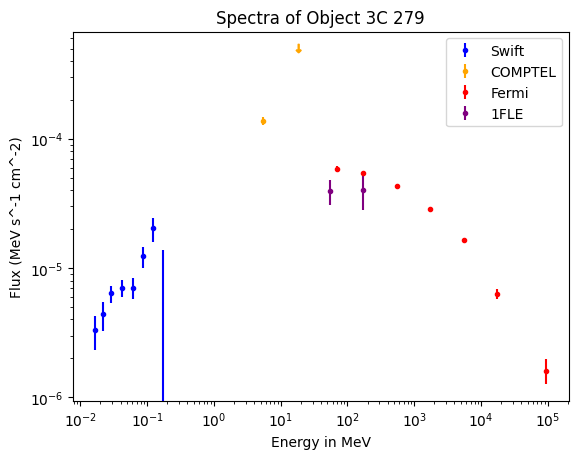

In [217]:

plt.errorbar(Bat_Energy_BandMeV, Obj_3C279_spectra_swift, Obj_3C279_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(COMPTEL_EnergyBand, Obj_3C279_COMPTEL_EnergyFlux, Obj_3C279_COMPTEL_EnergyFlux_err, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL')
plt.scatter(math.sqrt(300),Obj_3C279_COMPTEL_EnergyFlux_10_30MEV, marker = r'$\downarrow$', color = 'orange')
plt.errorbar(Fermi_Energy_BandMeV, Obj_3C279_spectra_fermi, Obj_3C279_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.errorbar(EBuckets, EF_FLE, yerr = EF_FLEe, fmt = 'o', markersize = 3, color = 'purple', label = '1FLE')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of Object 3C 279')

# Crab Nebula


In [218]:
obj_name = table1['COUNTERPART_NAME']
name = 'Crab'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
287,SWIFT J0534.6+2204,83.632,22.017,9957.05,Crab,0.0,83.6332,22.0145,23342.70,23339.20,23346.00,0.0,2.17,2.17,2.17,127.30,0.0,0.0,0.0,150,Pulsar,3.0 .. 22.5,0.00127836631 .. 0.0219022874,6.69955587 .. 4.41711998


In [219]:
Obj_Crab_spectra_swift = [] 
Obj_Crab_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_Crab_spectra_swift.extend(gal['Flux'])
    Obj_Crab_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)

Obj_Crab_spectra_swift = [i * (1e-3) for i in Obj_Crab_spectra_swift]
Obj_Crab_spectra_swift_err = [i * (1e-3) for i in Obj_Crab_spectra_swift_err]

print(Obj_Crab_spectra_swift)
print(Obj_Crab_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[0.00669955587, 0.0063602161400000004, 0.00606444216, 0.0057242608099999995, 0.0053628168100000005, 0.0050188889500000005, 0.00472105837, 0.00441711998]
[1.27836631e-06, 1.4007152100000001e-06, 1.19414181e-06, 1.30616978e-06, 1.62507838e-06, 2.79968116e-06, 5.03106322e-06, 2.1902287400000003e-05]


In [220]:
crab_obj_type = table['Source_Name']
objtype_crab = '4FGL J0534.5+2201i' #inverse compton

wg5 = (crab_obj_type == objtype_crab)
print(wg5)

table[wg5]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J0534.5+2201i,83.6330,22.0200,184.5527,-5.7815,--,--,--,--,--,--,130,Crab IC,--,10000.00,3.3476e-08,--,4.0917e-10,--,LogParabola,--,--,--,--,5.5000e-13,--,1.7500,--,0.0800,--,0.000,--,--,--,--,--,--,--,--,0.000,9634.27,2.1917772e-08 .. 1.941951e-09,-- .. --,3.6600328e-12 .. 9.9866754e-11,-- .. --,--,0.0000,10.0000,--,--,--,--,--,9.680435e-08 .. 9.680435e-08,-- .. --,0.0 .. 0.0,--,0.0000,10.0000,--,--,--,--,--,9.680435e-08 .. 9.680435e-08,-- .. --,0.0 .. 0.0,3FGL J0534.5+2201i,3FHL J0534.5+2201,J0534+2205,,EGR J0534+2159,E,Crab,PWN,,Crab Nebula,,--,--,83.6290,22.0200,0.06000,2048


In [221]:
Obj_CrabNebula_spectra_fermi_invcompt = []

for gal in table[wg5]:
    Obj_CrabNebula_spectra_fermi_invcompt.extend(gal['nuFnu_Band'])

#print(Obj_3C111_spectra_fermi)

Obj_CrabNebula_spectra_fermi_invcompt = [i * (624151) for i in Obj_CrabNebula_spectra_fermi_invcompt] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_CrabNebula_spectra_fermi_invcompt)


[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[2.284413119871178e-06, 5.525084177146304e-06, 1.3831753216734383e-05, 2.7910121872601334e-05, 4.584592836879425e-05, 6.117273815040014e-05, 6.233193422325312e-05]


In [222]:
crab_obj_type = table['Source_Name']
objtype_crab = '4FGL J0534.5+2201s' #synchrotron

wg5 = (crab_obj_type == objtype_crab)
print(wg5)

table[wg5]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J0534.5+2201s,83.6331,22.0199,184.5529,-5.7815,--,--,--,--,--,--,130,,26.173,50.55,7.8913e-10,3.4774e-10,1.4220e-10,2.3408e-11,PowerLaw,2.3083e-07,8.4421e-09,3.8646,0.1319,2.1119e-07,8.5342e-09,3.5309,0.0628,0.5210,0.1187,1.793,2.1336e-07,8.7456e-09,2.7926,0.2617,0.09678,0.01977,0.6667,--,1.768,8100.40,2.7767833e-06 .. 1.2114923e-13,-3.8704326e-07 .. 8.9304106e-11,4.145113e-10 .. 3.836125e-15,7.7667785 .. 0.0,539.1593,0.3430,0.0927,49.072,9.725371e-07,2.403457e-08,381350016.0,31560000.0,6.421784e-07 .. 3.6689235e-07,-1.9051607e-08 .. 1.9098083e-08,39.143436 .. 21.08225,2299.9021,0.4450,0.0467,48.379,1.5917342e-06,4.2115897e-08,383980000.0,5260000.0,4.543245e-07 .. 4.463866e-07,-2.8301312e-08 .. 3.384028e-08,18.053307 .. 15.050327,3FGL J0534.5+2201s,3FHL J0534.5+2201,J0534+2205,,EGR J0534+2159,E,Crab,PWN,,Crab Nebula,,1.0000,0.9999,83.6300,22.0200,0.00045,20


In [223]:
Obj_CrabNebula_spectra_fermi_synch = []

for gal in table[wg5]:
    Obj_CrabNebula_spectra_fermi_synch.extend(gal['nuFnu_Band'])

#print(Obj_3C111_spectra_fermi)

Obj_CrabNebula_spectra_fermi_synch = [i * (624151) for i in Obj_CrabNebula_spectra_fermi_synch] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_CrabNebula_spectra_fermi_synch)

Obj_Crab_spectra_fermi_Synch_yerrmin = [3.6061480477873084e-05, 6.989369789557554e-06, 3.2663466483231073e-06, 0.0, 0.0, 0.0, 0.0]
Obj_Crab_spectra_fermi_Synch_yerrmax = [3.424487920974592e-05, 6.989369572689939e-06, 3.2760405783319006e-06, 3.1528503349046756e-06, 2.715924903907291e-06, 1.3360332839346817e-05, 1.7649532574198507e-06]
Obj_CrabNebula_spectra_fermi_synch_yerr = [Obj_Crab_spectra_fermi_Synch_yerrmin, Obj_Crab_spectra_fermi_Synch_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[0.0002587176339217401, 8.815708308344827e-05, 7.724427519350402e-06, 1.2823887524213325e-06, 5.441387672536831e-09, 4.530016701312275e-08, 2.394321238473035e-09]


In [224]:
Obj_Crab_COMPTEL_PhotonFlux_075_1MEV = 41.0 * (1e-5)
Obj_Crab_COMPTEL_PhotonFlux_1_3MEV = 69.7 * (1e-5)
Obj_Crab_COMPTEL_PhotonFlux_3_10MEV = 34.2 * (1e-5)
Obj_Crab_COMPTEL_PhotonFlux_10_30MEV = 8.8 * (1e-5)

Obj_Crab_COMPTEL_EnergyFlux_075_1MEV = math.sqrt(0.75) * Obj_Crab_COMPTEL_PhotonFlux_075_1MEV
Obj_Crab_COMPTEL_EnergyFlux_1_3MEV = math.sqrt(3) * Obj_Crab_COMPTEL_PhotonFlux_1_3MEV
Obj_Crab_COMPTEL_EnergyFlux_3_10MEV = math.sqrt(30) * Obj_Crab_COMPTEL_PhotonFlux_3_10MEV
Obj_Crab_COMPTEL_EnergyFlux_10_30MEV = math.sqrt(300) * Obj_Crab_COMPTEL_PhotonFlux_10_30MEV

Obj_Crab_COMPTEL_PhotonFlux_075_1MEV_err = 9.5 * (1e-5)
Obj_Crab_COMPTEL_PhotonFlux_1_3MEV_err = 9.7 * (1e-5)
Obj_Crab_COMPTEL_PhotonFlux_3_10MEV_err = 4.6 * (1e-5)
Obj_Crab_COMPTEL_PhotonFlux_10_30MEV_err = 1.8 * (1e-5)

Obj_Crab_COMPTEL_EnergyFlux_075_1MEV_err = math.sqrt(0.75) * Obj_Crab_COMPTEL_PhotonFlux_075_1MEV_err
Obj_Crab_COMPTEL_EnergyFlux_1_3MEV_err = math.sqrt(3) * Obj_Crab_COMPTEL_PhotonFlux_1_3MEV_err
Obj_Crab_COMPTEL_EnergyFlux_3_10MEV_err = math.sqrt(30) * Obj_Crab_COMPTEL_PhotonFlux_3_10MEV_err
Obj_3C273_COMPTEL_EnergyFlux_10_30MEV_err = math.sqrt(300) * Obj_Crab_COMPTEL_PhotonFlux_10_30MEV_err

COMPTEL_EnergyBand = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30), math.sqrt(300)]
print(COMPTEL_EnergyBand)

Obj_Crab_COMPTEL_EnergyFlux = [Obj_Crab_COMPTEL_EnergyFlux_075_1MEV, Obj_Crab_COMPTEL_EnergyFlux_1_3MEV, Obj_Crab_COMPTEL_EnergyFlux_3_10MEV, Obj_Crab_COMPTEL_EnergyFlux_10_30MEV]
print(Obj_Crab_COMPTEL_EnergyFlux)

Obj_Crab_COMPTEL_EnergyFlux_err = [Obj_Crab_COMPTEL_EnergyFlux_075_1MEV_err, Obj_Crab_COMPTEL_EnergyFlux_1_3MEV_err, Obj_Crab_COMPTEL_EnergyFlux_3_10MEV_err, Obj_3C273_COMPTEL_EnergyFlux_10_30MEV_err]
print(Obj_Crab_COMPTEL_EnergyFlux_err)

[0.8660254037844386, 1.7320508075688772, 5.477225575051661, 17.320508075688775]
[0.0003550704155516199, 0.0012072394128755076, 0.0018732111466676685, 0.0015242047106606123]
[8.227241335952167e-05, 0.00016800892833418107, 0.00025195237645237644, 0.00031176914536239794]


In [225]:
FLE_obj_name = bright_FLE['AssocCOMP']
obj_name_COMP = 'PSR_B0531+21(Crab)     '

wg9 = (obj_name_COMP == FLE_obj_name)
print(wg9)

bright_FLE[wg9]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

Name,RAdeg,DEdeg,GLON,GLAT,ePos,Signi,EF30-100,e_EF30-100,EF100-300,e_EF100-300,F30-100,e_F30-100,F100-300,e_F100-300,Class1,z,Assoc1,Assoc3FGL,AssocCOMP
,deg,deg,deg,deg,deg,,mW / m2,mW / m2,mW / m2,mW / m2,1/cm2/s,1/cm2/s,1/cm2/s,1/cm2/s,,,,,
bytes15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,bytes18,bytes18,bytes23
1FLE J0530+2144,82.749641,21.745382,184.342072,-6.620215,0.241331,161.650,6.724240e-10,8.069080e-11,4.136090e-10,9.707620e-11,8.071030e-06,9.685240e-07,2.559110e-06,3.694530e-07,pwn,0.000000,3FGL J0534.5+2201s,3FGL J0534.5+2201s,PSR_B0531+21(Crab)


In [226]:
EFBucket30_100 = []
EFBucket30_100e = []
EFBucket100_300 = []
EFBucket100_300e = []

for gal in bright_FLE[wg9]:
    EFBucket30_100.append(gal['EF30-100'])
    EFBucket30_100e.append(gal['e_EF30-100'])
    EFBucket100_300.append(gal['EF100-300'])
    EFBucket100_300e.append(gal['e_EF100-300'])

print(EFBucket30_100)
print(EFBucket30_100e)
print(EFBucket100_300)
print(EFBucket100_300e)

EF_FLE = EFBucket30_100 + EFBucket100_300
EF_FLEe = EFBucket30_100e + EFBucket100_300e

EF_FLE = [624151 * x for x in EF_FLE]
EF_FLEe = [624151 * x for x in EF_FLEe]


print(EF_FLE)
print(EF_FLEe)

EBucket30_100 = math.sqrt(30*100)
EBucket100_300 = math.sqrt(100*300)

EBuckets = [EBucket30_100, EBucket100_300]
print(EBuckets)


[6.72424e-10]
[8.06908e-11]
[4.13609e-10]
[9.70762e-11]
[0.00041969411202399996, 0.000258154470959]
[5.0363243510800004e-05, 6.0590207306200005e-05]
[54.772255750516614, 173.20508075688772]


Text(0.5, 1.0, 'Crab Spectra')

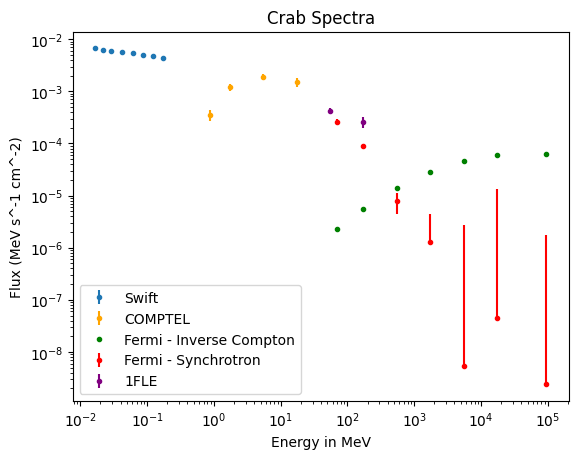

In [227]:
plt.errorbar(Bat_Energy_BandMeV, Obj_Crab_spectra_swift, yerr = Obj_Crab_spectra_swift_err, fmt = 'o', markersize = 3, label = 'Swift')
plt.errorbar(COMPTEL_EnergyBand, Obj_Crab_COMPTEL_EnergyFlux, yerr = Obj_Crab_COMPTEL_EnergyFlux_err, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL')
plt.errorbar(Fermi_Energy_BandMeV, Obj_CrabNebula_spectra_fermi_invcompt, fmt = 'o', markersize = 3, color = 'green', label = 'Fermi - Inverse Compton')
plt.errorbar(Fermi_Energy_BandMeV, Obj_CrabNebula_spectra_fermi_synch, yerr = Obj_CrabNebula_spectra_fermi_synch_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi - Synchrotron')
plt.errorbar(EBuckets, EF_FLE, yerr = EF_FLEe, fmt = 'o', markersize = 3, color = 'purple', label = '1FLE')
plt.legend(loc='lower left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Crab Spectra')

# Centaurus A

In [228]:
fermi_obj_name = table['ASSOC1']
objname_fermi = 'Cen A                       ' 

wg7 = (fermi_obj_name == objname_fermi)
print(wg7)
table[wg7]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J1325.5-4300,201.3813,-43.0165,309.5287,19.4182,0.0105,0.0099,52.570,0.0170,0.0161,52.570,348,,63.457,681.73,3.5581e-09,1.1354e-10,6.3842e-11,1.5818e-12,PowerLaw,1.6191e-11,3.6314e-13,2.6492,0.0230,1.5264e-11,3.8875e-13,2.6662,0.0187,-0.0512,0.0089,4.148,1.5995e-11,3.6033e-13,2.6978,0.0243,-0.00050,0.00009,0.6667,--,2.917,7846.10,2.114724e-07 .. 3.2325198e-11,-8.719589e-08 .. 1.1165019e-11,3.3024476e-11 .. 1.3599346e-12,2.4491396 .. 7.7377543,8.2470,0.0202,0.0401,--,--,--,--,--,1.5569073e-07 .. 1.691461e-07,-8.575757e-09 .. 7.956436e-09,23.462181 .. 27.932505,71.9110,0.0840,0.0248,--,--,--,--,--,1.2857228e-07 .. 1.7853088e-07,-1.8577662e-08 .. 1.7248075e-08,8.372939 .. 13.303789,3FGL J1325.4-4301,3FHL J1325.5-4300,J1324-4348,3EG J1324-4314,,P,Centaurus A,RDG,,Cen A,CenA Lobes field,1.0000,1.0000,201.3651,-43.0191,0.00000,512


In [229]:
Obj_CENA_spectra_fermi = []

for gal in table[wg7]:
    Obj_CENA_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_CENA_spectra_fermi = [i * (624151) for i in Obj_CENA_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_CENA_spectra_fermi)

Obj_CENA_spectra_fermi_yerrmin = [8.499001840639973e-06, 1.083222575492572e-06, 2.784467189589836e-07, 1.8675361491713523e-07, 1.865759796262185e-07, 2.9574306723554634e-07, 2.4716116858155895e-07]
Obj_CENA_spectra_fermi_yerrmax = [8.780601349165675e-06, 1.083222575492572e-06, 2.784467189589836e-07, 1.8675361491713523e-07, 1.865759796262185e-07, 3.2508960153026416e-07, 2.931743594230098e-07]
Obj_CENA_spectra_fermi_yerr = [Obj_CENA_spectra_fermi_yerrmin, Obj_CENA_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[2.0612259417376183e-05, 2.0628062935585528e-05, 8.476477821092905e-06, 3.844446441030654e-06, 2.1366500622043913e-06, 1.9285455481190487e-06, 8.488045566578577e-07]


In [230]:
obj_name = table1['COUNTERPART_NAME']
name = 'Cen A'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
671,SWIFT J1325.4-4301,201.365,-43.019,604.78,Cen A,0.0,201.3651,-43.0191,1346.34,1343.29,1350.03,0.0,1.88,1.88,1.89,2.20,0.0018,42.98,0.0,80,Beamed AGN,3.0 .. 22.5,0.00108032196 .. 0.0191586595,0.274805427 .. 0.350963622


In [231]:
Obj_CENA_spectra_swift = []
Obj_CENA_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_CENA_spectra_swift.extend(gal['Flux'])
    Obj_CENA_spectra_swift_err.extend(gal['Flux_err'])

print(Bat_Energy_BandMeV)

Obj_CENA_spectra_swift = [i * (1e-3) for i in Obj_CENA_spectra_swift]
Obj_CENA_spectra_swift_err = [i * (1e-3) for i in Obj_CENA_spectra_swift_err]

print(Obj_CENA_spectra_swift)
print(Obj_CENA_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[0.000274805427, 0.00028771191800000003, 0.000295605808, 0.00031094369300000004, 0.000323952645, 0.00033354711500000004, 0.000345252812, 0.000350963622]
[1.08032196e-06, 1.19100325e-06, 9.89822089e-07, 1.14119088e-06, 1.4067135100000001e-06, 2.3959358199999997e-06, 4.36010631e-06, 1.9158659500000003e-05]


In [232]:
Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_p1 = 11.3 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_p1 = 14.2 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p1 = 5.5 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_10_30MEV_p1 = 1.4 * (1e-5)

Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_err_p1 = 2.9 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_err_p1 = 4.1 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_err_p1 = 0 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_10_30MEV_err_p1 = 0 * (1e-5)

Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_p1 = math.sqrt(0.75) * Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_p1
Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_p1 = math.sqrt(3) * Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_p1
Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_p1 = math.sqrt(3*10) * Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p1
Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_p1 = math.sqrt(30*10) * Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p1

Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_err_p1 = math.sqrt(0.75) * Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_err_p1 
Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_err_p1 = math.sqrt(3) * Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_err_p1
Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_err_p1 = 0 
Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_err_p1 = 0

COMPTEL_CENA_EnergyBand1 = [math.sqrt(0.75), math.sqrt(3)]
COMPTEL_CENA_EnergyBand1_UL = [math.sqrt(3*10), math.sqrt(30*10)]

Obj_CENA_COMPTEL_EnergyFlux1 = [Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_p1, Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_p1]
Obj_CENA_COMPTEL_EnergyFlux1_UL = [Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_p1, Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_p1]
Obj_CENA_COMPTEL_EnergyFlux_err1 = [Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_err_p1, Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_err_p1]


In [233]:
Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_p2 = 4.4 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_p2 = 13.9 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p2 = 7 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_10_30MEV_p2 = 2.7 * (1e-5)

Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_err_p2 = 0 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_err_p2 = 0 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_err_p2 = 1.7 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_10_30MEV_err_p2 = 0 * (1e-5)

Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_p2 = math.sqrt(0.75) * Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_p2
Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_p2 = math.sqrt(3) * Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_p2
Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_p2 = math.sqrt(3*10) * Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p2
Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_p2 = math.sqrt(30*10) * Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p2

Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_err_p2 = 0 
Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_err_p2 = 0
Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_err_p2 = Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_err_p2 * math.sqrt(3*10)
Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_err_p2 = 0

COMPTEL_CENA_EnergyBand2 = [math.sqrt(30)]
COMPTEL_CENA_EnergyBand2_UL = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30*10)]

Obj_CENA_COMPTEL_EnergyFlux2 = [Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_p2]
Obj_CENA_COMPTEL_EnergyFlux2_UL = [Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_p2, Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_p2, Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_p2]
Obj_CENA_COMPTEL_EnergyFlux_err2 = [Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_err_p2]

In [234]:
Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_p3 = 24.1 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_p3 = 14.9 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p3 = 3.9 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_10_30MEV_p3 = 1.2 * (1e-5)

Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_err_p3 = 6.2 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_err_p3 = 0 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_err_p3 = 0 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_10_30MEV_err_p3 = 0 * (1e-5)

Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_p3 = math.sqrt(0.75) * Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_p3
Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_p3 = math.sqrt(3) * Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_p3
Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_p3 = math.sqrt(3*10) * Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p3
Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_p3 = math.sqrt(30*10) * Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p3

Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_err_p3 = Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_err_p3 * math.sqrt(0.75)
Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_err_p3 = 0
Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_err_p3 = 0
Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_err_p3 = 0

Obj_CENA_COMPTEL_EnergyFlux3 = [Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_p3]
Obj_CENA_COMPTEL_EnergyFlux_err3 = [Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_err_p3]
Obj_CENA_COMPTEL_EnergyFlux3_UL = [Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_p3, Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_p3, Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_p3]

COMPTEL_CENA_EnergyBand3 = [math.sqrt(0.75)]
COMPTEL_CENA_EnergyBand3_UL = [math.sqrt(3), math.sqrt(30), math.sqrt(30*10)]

print(Obj_CENA_COMPTEL_EnergyFlux3_UL)



[0.00025807557032776274, 0.00021361179742701477, 0.0006754998149518622]


In [235]:
Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_p1to4 = 9.1 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_p1to4 = 6.4 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p1to4 = 2.1 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_10_30MEV_p1to4 = 0.6 * (1e-5)

Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_err_p1to4 = 3.0 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_err_p1to4 = 2.5 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_err_p1to4 = 2.1 * (1e-5)
Obj_CENA_COMPTEL_PhotonFlux_10_30MEV_err_p1to4 = 0 * (1e-5)

Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_p1to4 = math.sqrt(0.75) * Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_p1to4
Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_p1to4 = math.sqrt(3) * Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_p1to4
Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_p1to4 = math.sqrt(3*10) * Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p1to4
Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_p1to4 = math.sqrt(30*10) * Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_p1to4

Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_err_p1to4 = Obj_CENA_COMPTEL_PhotonFlux_075_1MEV_err_p1to4 * math.sqrt(0.75)
Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_err_p1to4 = Obj_CENA_COMPTEL_PhotonFlux_1_3MEV_err_p1to4 * math.sqrt(3)
Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_err_p1to4 = Obj_CENA_COMPTEL_PhotonFlux_3_10MEV_err_p1to4 * math.sqrt(30)
Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_err_p1to4 = 0

Obj_CENA_COMPTEL_EnergyFlux1to4 = [Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_p1to4, Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_p1to4, Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_p1to4]
Obj_CENA_COMPTEL_EnergyFlux_err1to4 = [Obj_CENA_COMPTEL_EnergyFlux_075_1MEV_err_p1to4, Obj_CENA_COMPTEL_EnergyFlux_1_3MEV_err_p1to4, Obj_CENA_COMPTEL_EnergyFlux_3_10MEV_err_p1to4]
Obj_CENA_COMPTEL_EnergyFlux1to4_UL = [Obj_CENA_COMPTEL_EnergyFlux_10_30MEV_p1to4]

COMPTEL_CENA_EnergyBand1to4_UL = [math.sqrt(30*10)] 
COMPTEL_CENA_EnergyBand1to4 = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30)]

In [236]:
FLE_obj_name = bright_FLE['AssocCOMP']
obj_name_COMP = 'Centaurus_A            '

wg9 = (obj_name_COMP == FLE_obj_name)
print(wg9)

bright_FLE[wg9]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

Name,RAdeg,DEdeg,GLON,GLAT,ePos,Signi,EF30-100,e_EF30-100,EF100-300,e_EF100-300,F30-100,e_F30-100,F100-300,e_F100-300,Class1,z,Assoc1,Assoc3FGL,AssocCOMP
,deg,deg,deg,deg,deg,,mW / m2,mW / m2,mW / m2,mW / m2,1/cm2/s,1/cm2/s,1/cm2/s,1/cm2/s,,,,,
bytes15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,bytes18,bytes18,bytes23
1FLE J1324-4319,201.120453,-43.318058,309.285156,19.145691,0.245276,24.427,7.094940e-11,1.573150e-11,4.112710e-11,1.222600e-11,8.515980e-07,1.888240e-07,2.700190e-07,4.652980e-08,rdg,0.001800,3FGL J1325.4-4301,3FGL J1325.4-4301,Centaurus_A


In [237]:
EFBucket30_100 = []
EFBucket30_100e = []
EFBucket100_300 = []
EFBucket100_300e = []

for gal in bright_FLE[wg9]:
    EFBucket30_100.append(gal['EF30-100'])
    EFBucket30_100e.append(gal['e_EF30-100'])
    EFBucket100_300.append(gal['EF100-300'])
    EFBucket100_300e.append(gal['e_EF100-300'])

print(EFBucket30_100)
print(EFBucket30_100e)
print(EFBucket100_300)
print(EFBucket100_300e)

EF_FLE = EFBucket30_100 + EFBucket100_300
EF_FLEe = EFBucket30_100e + EFBucket100_300e

EF_FLE = [624151 * x for x in EF_FLE]
EF_FLEe = [624151 * x for x in EF_FLEe]


print(EF_FLE)
print(EF_FLEe)

EBucket30_100 = math.sqrt(30*100)
EBucket100_300 = math.sqrt(100*300)

EBuckets = [EBucket30_100, EBucket100_300]
print(EBuckets)

[7.09494e-11]
[1.57315e-11]
[4.11271e-11]
[1.2226e-11]
[4.42831389594e-05, 2.5669520592099998e-05]
[9.8188314565e-06, 7.630870126000001e-06]
[54.772255750516614, 173.20508075688772]


Text(0.5, 1.0, 'Spectra of Object Cen A')

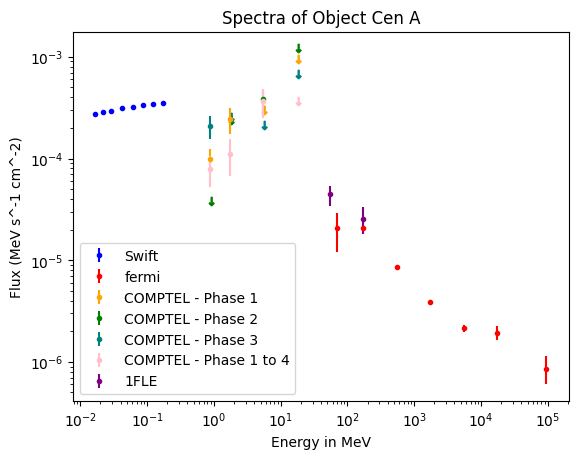

In [238]:
plt.errorbar(Bat_Energy_BandMeV, Obj_CENA_spectra_swift, yerr = Obj_CENA_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(Fermi_Energy_BandMeV, Obj_CENA_spectra_fermi, yerr = Obj_CENA_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'fermi')
plt.errorbar(COMPTEL_CENA_EnergyBand1, Obj_CENA_COMPTEL_EnergyFlux1, yerr = Obj_CENA_COMPTEL_EnergyFlux_err1, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL - Phase 1',)
plt.scatter(COMPTEL_CENA_EnergyBand1_UL, Obj_CENA_COMPTEL_EnergyFlux1_UL, marker = r'$\downarrow$', color = 'orange')
plt.errorbar(COMPTEL_CENA_EnergyBand2, Obj_CENA_COMPTEL_EnergyFlux2, yerr = Obj_CENA_COMPTEL_EnergyFlux_err2, fmt = 'o', markersize = 3, color = 'green', label = 'COMPTEL - Phase 2')
plt.scatter(COMPTEL_CENA_EnergyBand2_UL, Obj_CENA_COMPTEL_EnergyFlux2_UL, marker = r'$\downarrow$', color = 'green')
plt.errorbar(COMPTEL_CENA_EnergyBand3, Obj_CENA_COMPTEL_EnergyFlux3, yerr = Obj_CENA_COMPTEL_EnergyFlux_err3, fmt = 'o', markersize = 3, color = 'teal', label = 'COMPTEL - Phase 3')
plt.scatter(COMPTEL_CENA_EnergyBand3_UL, Obj_CENA_COMPTEL_EnergyFlux3_UL, marker = r'$\downarrow$', color = 'teal')
plt.errorbar(COMPTEL_CENA_EnergyBand1to4, Obj_CENA_COMPTEL_EnergyFlux1to4, yerr = Obj_CENA_COMPTEL_EnergyFlux_err1to4, fmt = 'o', markersize = 3, color = 'pink', label = 'COMPTEL - Phase 1 to 4')
plt.scatter(COMPTEL_CENA_EnergyBand1to4_UL, Obj_CENA_COMPTEL_EnergyFlux1to4_UL, marker = r'$\downarrow$', color = 'pink')
plt.errorbar(EBuckets, EF_FLE, yerr = EF_FLEe, fmt = 'o', markersize = 3, color = 'purple', label = '1FLE')
plt.legend(loc='lower left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of Object Cen A')

# NGC 1068 

In [239]:
fermi_obj_name = table['ASSOC1']
objname_fermi = 'NGC 1068                    ' 

wg4 = (fermi_obj_name == objname_fermi)
print(wg4)
table[wg4]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J0242.6-0000,40.6670,-0.0069,172.0936,-51.9308,0.0303,0.0245,-20.950,0.0492,0.0398,-20.950,862,,17.825,836.02,5.7761e-10,5.3255e-11,7.4612e-12,5.5544e-13,PowerLaw,1.2182e-12,9.0683e-14,2.3761,0.0607,1.2786e-12,1.1429e-13,2.3555,0.0698,0.0364,0.0403,0.941,1.2497e-12,1.0052e-13,2.3037,0.1075,0.00071,0.00092,0.6667,--,0.879,993.40,2.5599105e-08 .. 2.084671e-15,-1.9274953e-08 .. 6.0928636e-12,4.0404706e-12 .. 9.6279555e-17,1.3421437 .. 0.0,11.8958,0.1881,0.1156,--,--,--,--,--,1.2095845e-08 .. 1.7115296e-08,-2.2457562e-09 .. 3.11347e-09,7.1831307 .. 7.347438,44.3508,0.0000,10.0000,--,--,--,--,--,1.4420688e-08 .. 2.5261711e-08,-5.5717213e-09 .. 7.8517965e-09,3.0548139 .. 4.7849016,3FGL J0242.7-0001,3FHL J0242.7-0002,,,,N,,sbg,,NGC 1068,,0.9996,0.9971,40.6697,-0.0130,0.00045,0


In [240]:
Obj_NGC1068_spectra_fermi = []

for gal in table[wg4]:
    Obj_NGC1068_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_NGC1068_spectra_fermi = [i * (624151) for i in Obj_NGC1068_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_NGC1068_spectra_fermi)


Obj_NGC1068_spectra_fermi_yerrmin = [1.89884788973501e-06, 2.822413281658168e-07, 1.1843765488502531e-07, 8.712612659724477e-08, 8.019399526662794e-08, 1.7060209349354707e-07, 0.0]
print(Obj_NGC1068_spectra_fermi_yerrmin)

Obj_NGC1068_spectra_fermi_yerrmax = [1.5976098507411874e-06, 2.8645984693223764e-07, 1.2189441935645754e-07, 9.264733544818297e-08, 9.22518854553088e-08, 2.0554343613149212e-07, 1.756336287881007e-07]
print(Obj_NGC1068_spectra_fermi_yerrmax)


[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[2.52186379606301e-06, 1.241967216020299e-06, 1.0998411182519367e-06, 6.129542221783649e-07, 3.015072816728542e-07, 5.952830634379678e-07, 6.00929805635205e-11]
[1.89884788973501e-06, 2.822413281658168e-07, 1.1843765488502531e-07, 8.712612659724477e-08, 8.019399526662794e-08, 1.7060209349354707e-07, 0.0]
[1.5976098507411874e-06, 2.8645984693223764e-07, 1.2189441935645754e-07, 9.264733544818297e-08, 9.22518854553088e-08, 2.0554343613149212e-07, 1.756336287881007e-07]


In [241]:
Obj_name = table1['COUNTERPART_NAME']
name = 'NGC 1068'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
144,SWIFT J0242.6+0000,40.664,-0.004,18.26,NGC 1068,0.0,40.6696,-0.0133,37.90,35.67,40.39,0.0,1.82,1.67,1.98,4.40,0.0038,42.08,0.0,50,Sy1.9,3.0 .. 22.5,0.000886606344 .. 0.0197641719,0.00449218554 .. 0.00486167381


In [242]:
Obj_NGC1068_spectra_swift = []

for gal in table1[wg2]:
    Obj_NGC1068_spectra_swift.extend(gal['Flux'])

#print(Obj_3C111_spectra_swift)

print(Bat_Energy_BandMeV)

Obj_NGC1068_spectra_swift = [i * (1e-3) for i in Obj_NGC1068_spectra_swift]

print(Obj_NGC1068_spectra_swift)

Obj_NGC1068_spectra_swift_err = [8.86606344e-07, 1.11146993e-06, 9.458152930000001e-07, 1.05572573e-06, 1.31349685e-06, 2.3594345e-06, 4.4591985599999994e-06, 1.9764171899999998e-05]

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[4.49218554e-06, 8.66608694e-06, 1.0650848e-05, 9.65459924e-06, 8.97831656e-06, 3.58815654e-06, 8.31142627e-06, 4.86167381e-06]


In [243]:
Obj_NGC1068_COMPTEL_PhotonFlux_075_1MEV = 51 * (1e-5)
Obj_NGC1068_COMPTEL_PhotonFlux_1_3MEV = 7 * (1e-5)

Obj_NGC1068_COMPTEL_EnergyFlux_075_1MEV = math.sqrt(0.75) * Obj_NGC1068_COMPTEL_PhotonFlux_075_1MEV
Obj_NGC1068_COMPTEL_PhotonFlux_1_3MEV = math.sqrt(3) * Obj_NGC1068_COMPTEL_PhotonFlux_1_3MEV

COMPTEL_EnergyBand = [math.sqrt(0.75), math.sqrt(3)]
print(COMPTEL_EnergyBand)

Obj_NGC1068_COMPTEL_EnergyFlux = [Obj_NGC1068_COMPTEL_EnergyFlux_075_1MEV, Obj_NGC1068_COMPTEL_PhotonFlux_1_3MEV]
print(Obj_NGC1068_COMPTEL_EnergyFlux)

Obj_NGC1068_COMPTEL_EnergyFlux_err = [0, 0]

[0.8660254037844386, 1.7320508075688772]
[0.0004416729559300637, 0.00012124355652982142]


In [244]:
#Energy_Bands = Bat_Energy_BandMeV + COMPTEL_EnergyBand + Fermi_Energy_BandMeV
print(Energy_Bands)

#Spectra_NGC1068 = Obj_NGC1068_spectra_swift + Obj_NGC1068_COMPTEL_EnergyFlux + Obj_NGC1068_spectra_fermi
#print(Spectra_NGC1068)

#Upper_FluxErr_NGC1068 = Obj_NGC1068_spectra_swift_err + Obj_NGC1068_COMPTEL_EnergyFlux_err + Obj_NGC1068_spectra_fermi_yerrmax

Obj_NGC1068_spectra_fermi_yerr = [Obj_NGC1068_spectra_fermi_yerrmin, Obj_NGC1068_spectra_fermi_yerrmax]

#FluxErr_NGC1068 = [Lower_FluxErr_NGC1068, Upper_FluxErr_NGC1068]

#print(FluxErr_NGC1068)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707, 5.477225575051661, 70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]


Text(0.5, 1.0, 'Spectra of Object NGC 1068')

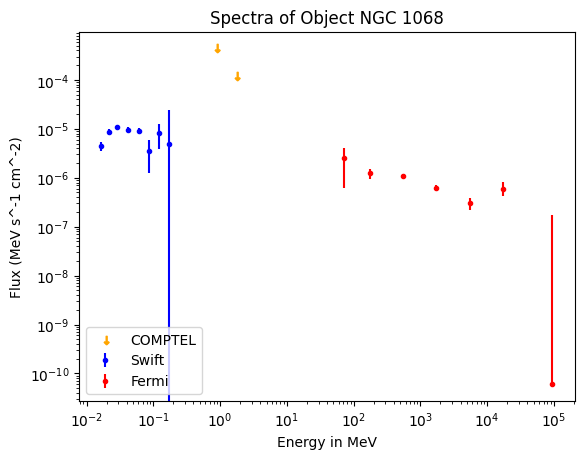

In [245]:
plt.errorbar(Bat_Energy_BandMeV, Obj_NGC1068_spectra_swift, Obj_NGC1068_spectra_swift_err, fmt = 'o', color= 'blue', markersize = 3, label = 'Swift')
plt.scatter(COMPTEL_EnergyBand, Obj_NGC1068_COMPTEL_EnergyFlux, marker = r'$\downarrow$', color = 'orange', label = 'COMPTEL')
plt.errorbar(Fermi_Energy_BandMeV, Obj_NGC1068_spectra_fermi, Obj_NGC1068_spectra_fermi_yerr, fmt = 'o', color = 'red', markersize = 3, label = 'Fermi')
plt.legend(loc='lower left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of Object NGC 1068')


# 3C 454.3

In [246]:
fermi_obj_name = table['ASSOC1']
objname_fermi = '3C 454.3                    ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J2253.9+1609,343.4963,16.1506,86.1185,-38.1849,0.0046,0.0046,-53.830,0.0074,0.0074,-53.830,699,,443.845,517.46,9.8347e-08,5.9638e-10,1.1148e-09,5.3423e-12,PLSuperExpCutoff,6.3231e-10,2.8152e-12,2.3872,0.0034,7.2007e-10,3.9488e-12,2.3149,0.0050,0.0999,0.0027,38.146,7.0141e-10,3.5839e-12,2.0142,0.0095,0.01991,0.00142,0.5184,0.0067,39.508,72486.00,2.5202414e-06 .. 6.3178913e-11,-9.9892794e-08 .. 1.5491015e-11,4.0201378e-10 .. 1.7561069e-12,20.126493 .. 13.044973,50905.2305,0.8069,0.2157,355.842,5.1103757e-06,2.8642487e-08,318230016.0,31560000.0,1.1215884e-06 .. 2.3332825e-06,-1.3649307e-08 .. 2.0764046e-08,149.57155 .. 214.46951,132456.5781,1.2604,0.1300,295.682,1.3344133e-05,8.290318e-08,310340000.0,5260000.0,3.1720895e-06 .. 3.2216678e-06,-4.0893774e-08 .. 4.4087955e-08,137.70451 .. 130.8758,3FGL J2254.0+1608,3FHL J2253.9+1608,J2254+1609,3EG J2254+1601,EGR J2253+1606,N,,FSRQ,,3C 454.3,,1.0000,0.9996,343.4906,16.1482,0.00000,0


In [247]:
Obj_3C4543_spectra_fermi = []

for gal in table[wg3]:
    Obj_3C4543_spectra_fermi.extend(gal['nuFnu_Band'])

#print(Obj_3C111_spectra_fermi)

Obj_3C4543_spectra_fermi = [i * (624151) for i in Obj_3C4543_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_3C4543_spectra_fermi)

Obj_3C4543_spectra_fermi_yerrmin = [9.945408667094008e-06, 3.249965206378238e-06, 1.297116714320647e-06, 1.0125479557778622e-06, 9.045272925008174e-07, 7.843460217252544e-07, 2.3366005750719595e-07]
Obj_3C4543_spectra_fermi_yerrmax = [9.945408667094008e-06, 3.249965206378238e-06, 1.297116714320647e-06, 1.0125479557778622e-06, 9.045272925008174e-07, 7.843460217252544e-07, 2.687499129454805e-07]
Obj_3C4543_spectra_fermi_yerr = [Obj_3C4543_spectra_fermi_yerrmin, Obj_3C4543_spectra_fermi_yerrmax]


[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[0.00025091730490653386, 0.0002374215940803559, 0.0001840810951458105, 0.00011872551349807747, 5.44828607308076e-05, 1.4361509971047223e-05, 1.096075859119785e-06]


In [248]:
obj_name = table1['COUNTERPART_NAME']
name = '3C 454.3'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
1171,SWIFT J2253.9+1608,343.485,16.149,61.98,3C 454.3,0.0,343.4906,16.1482,158.36,155.57,161.17,0.0,1.50,1.45,1.55,13.00,0.859,47.75,0.0,80,Beamed AGN,3.0 .. 22.5,0.000904141809 .. 0.0176009666,0.0224485956 .. 0.165065587


In [249]:
Obj_3C4543_spectra_swift = [] 
Obj_3C4543_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_3C4543_spectra_swift.extend(gal['Flux'])
    Obj_3C4543_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_3C4543_spectra_swift = [i * (1e-3) for i in Obj_3C4543_spectra_swift]
Obj_3C4543_spectra_swift_err = [i * (1e-3) for i in Obj_3C4543_spectra_swift_err]

print(Obj_3C4543_spectra_swift)
print(Obj_3C4543_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[2.24485956e-05, 2.2155009199999998e-05, 2.7347702500000003e-05, 2.69263834e-05, 3.55346203e-05, 4.73680757e-05, 6.72985762e-05, 0.000165065587]
[9.041418090000001e-07, 1.0656825e-06, 9.39523801e-07, 1.0069882300000001e-06, 1.23451569e-06, 2.2686785099999997e-06, 4.27514454e-06, 1.76009666e-05]


In [250]:
Obj_3C4543_COMPTEL_PhotonFlux_075_1MEV = 10.4 * (1e-5)
Obj_3C4543_COMPTEL_PhotonFlux_1_3MEV = 9.2 * (1e-5)
Obj_3C4543_COMPTEL_PhotonFlux_3_10MEV = 2.8 * (1e-5)
Obj_3C4543_COMPTEL_PhotonFlux_10_30MEV = 2.9 * (1e-5)

Obj_3C4543_COMPTEL_EnergyFlux_075_1MEV = math.sqrt(0.75) * Obj_3C4543_COMPTEL_PhotonFlux_075_1MEV
Obj_3C4543_COMPTEL_EnergyFlux_1_3MEV = math.sqrt(3) * Obj_3C4543_COMPTEL_PhotonFlux_1_3MEV
Obj_3C4543_COMPTEL_EnergyFlux_3_10MEV = math.sqrt(30) * Obj_3C4543_COMPTEL_PhotonFlux_3_10MEV
Obj_3C4543_COMPTEL_EnergyFlux_10_30MEV = math.sqrt(300) * Obj_3C4543_COMPTEL_PhotonFlux_10_30MEV

Obj_3C4543_COMPTEL_PhotonFlux_075_1MEV_err = 0 * (1e-5)
Obj_3C4543_COMPTEL_PhotonFlux_1_3MEV_err = 0 * (1e-5)
Obj_3C4543_COMPTEL_PhotonFlux_3_10MEV_err = 2.3 * (1e-5)
Obj_3C4543_COMPTEL_PhotonFlux_10_30MEV_err = 1 * (1e-5)

Obj_3C4543_COMPTEL_EnergyFlux_075_1MEV_err = math.sqrt(0.75) * Obj_3C4543_COMPTEL_PhotonFlux_075_1MEV_err
Obj_3C4543_COMPTEL_EnergyFlux_1_3MEV_err = math.sqrt(3) * Obj_3C4543_COMPTEL_PhotonFlux_1_3MEV_err
Obj_3C4543_COMPTEL_EnergyFlux_3_10MEV_err = math.sqrt(30) * Obj_3C4543_COMPTEL_PhotonFlux_3_10MEV_err
Obj_3C4543_COMPTEL_EnergyFlux_10_30MEV_err = math.sqrt(300) * Obj_3C4543_COMPTEL_PhotonFlux_10_30MEV_err

COMPTEL_3C4543_EnergyBand = [math.sqrt(30), math.sqrt(300)]
COMPTEL_3C4543_EnergyBand_UL = [math.sqrt(.75), math.sqrt(3)]

Obj_3C4543_COMPTEL_EnergyFlux = [Obj_3C4543_COMPTEL_EnergyFlux_3_10MEV, Obj_3C4543_COMPTEL_EnergyFlux_10_30MEV]
Obj_3C4543_COMPTEL_EnergyFlux_UL = [Obj_3C4543_COMPTEL_EnergyFlux_075_1MEV, Obj_3C4543_COMPTEL_EnergyFlux_1_3MEV]
Obj_3C4543_COMPTEL_EnergyFlux_err = [Obj_3C4543_COMPTEL_EnergyFlux_3_10MEV_err, Obj_3C4543_COMPTEL_EnergyFlux_10_30MEV_err]

In [251]:
FLE_obj_name = bright_FLE['AssocCOMP']
obj_name_COMP = '3C_454.3               '

wg9 = (obj_name_COMP == FLE_obj_name)
print(wg9)

bright_FLE[wg9]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

Name,RAdeg,DEdeg,GLON,GLAT,ePos,Signi,EF30-100,e_EF30-100,EF100-300,e_EF100-300,F30-100,e_F30-100,F100-300,e_F100-300,Class1,z,Assoc1,Assoc3FGL,AssocCOMP
,deg,deg,deg,deg,deg,,mW / m2,mW / m2,mW / m2,mW / m2,1/cm2/s,1/cm2/s,1/cm2/s,1/cm2/s,,,,,
bytes15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,bytes18,bytes18,bytes23
1FLE J2254+1617,343.562622,16.287817,86.282646,-38.105961,0.240857,99.997,2.732470e-10,5.550470e-11,2.506050e-10,5.881840e-11,3.279760e-06,6.662180e-07,1.039920e-06,2.238510e-07,fsrq,0.859000,3FGL J2254.0+1608,3FGL J2254.0+1608,3C_454.3


In [252]:
EFBucket30_100 = []
EFBucket30_100e = []
EFBucket100_300 = []
EFBucket100_300e = []

for gal in bright_FLE[wg9]:
    EFBucket30_100.append(gal['EF30-100'])
    EFBucket30_100e.append(gal['e_EF30-100'])
    EFBucket100_300.append(gal['EF100-300'])
    EFBucket100_300e.append(gal['e_EF100-300'])

print(EFBucket30_100)
print(EFBucket30_100e)
print(EFBucket100_300)
print(EFBucket100_300e)

EF_FLE = EFBucket30_100 + EFBucket100_300
EF_FLEe = EFBucket30_100e + EFBucket100_300e

EF_FLE = [624151 * x for x in EF_FLE]
EF_FLEe = [624151 * x for x in EF_FLEe]


print(EF_FLE)
print(EF_FLEe)

EBucket30_100 = math.sqrt(30*100)
EBucket100_300 = math.sqrt(100*300)

EBuckets = [EBucket30_100, EBucket100_300]
print(EBuckets)

[2.73247e-10]
[5.55047e-11]
[2.50605e-10]
[5.88184e-11]
[0.000170547388297, 0.00015641536135499999]
[3.4643314009700004e-05, 3.67115631784e-05]
[54.772255750516614, 173.20508075688772]


Text(0.5, 1.0, 'Spectra of Object 3C 454.3')

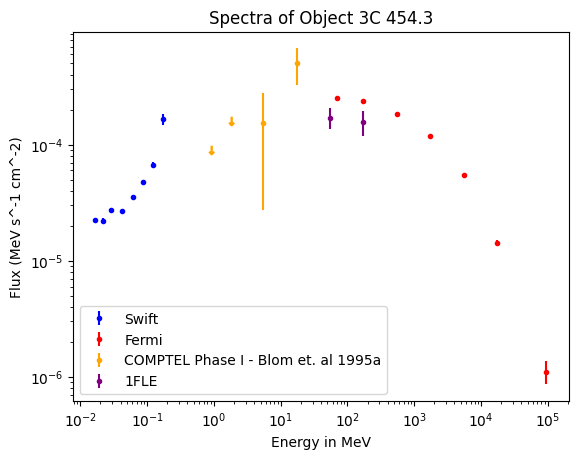

In [253]:
plt.errorbar(Bat_Energy_BandMeV, Obj_3C4543_spectra_swift, yerr = Obj_3C4543_spectra_swift_err, fmt = 'o', color= 'blue', markersize = 3, label = 'Swift')
plt.errorbar(Fermi_Energy_BandMeV, Obj_3C4543_spectra_fermi, yerr = Obj_3C4543_spectra_fermi_yerr, fmt = 'o', color = 'red', markersize = 3, label = 'Fermi')
plt.errorbar(COMPTEL_3C4543_EnergyBand, Obj_3C4543_COMPTEL_EnergyFlux, yerr = Obj_3C4543_COMPTEL_EnergyFlux_err, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL Phase I - Blom et. al 1995a') 
plt.scatter(COMPTEL_3C4543_EnergyBand_UL, Obj_3C4543_COMPTEL_EnergyFlux_UL, marker = r'$\downarrow$', color= 'orange')
plt.errorbar(EBuckets, EF_FLE, yerr = EF_FLEe, fmt = 'o', markersize = 3, color = 'purple', label = '1FLE')
plt.legend(loc='lower left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of Object 3C 454.3')


# Cygnus X-1

In [254]:
fermi_obj_name = table['ASSOC1']
objname_fermi = 'Cyg X-1                     ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J1958.5+3512,299.6343,35.2024,71.3544,3.0366,0.0291,0.0252,5.740,0.0472,0.0408,5.740,726,,7.602,3884.74,5.8879e-10,1.0082e-10,6.6152e-12,1.2272e-12,PowerLaw,3.6851e-14,5.8893e-15,2.1462,0.1212,3.5152e-14,6.6091e-15,2.1566,0.1103,-0.0250,0.0452,0.518,3.5885e-14,5.9247e-15,2.2125,0.1339,-0.00018,0.00022,0.6667,--,0.594,463.83,3.831134e-14 .. 1.2243921e-11,-- .. 8.369924e-12,6.101975e-18 .. 6.1669165e-13,0.0 .. 2.5691476,11.9980,0.3483,0.2781,--,--,--,--,--,1.5269212e-08 .. 1.0243142e-08,-4.186545e-09 .. 4.225733e-09,4.2776423 .. 2.981174,47.2909,0.0000,10.0000,--,--,--,--,--,2.8071081e-08 .. 2.885507e-11,-1.1127053e-08 .. 1.15215375e-08,2.8240907 .. 0.0,,,,,,N,,hmb,,Cyg X-1,,0.0000,0.9996,299.5912,35.1990,0.00045,0


In [255]:
Obj_CygX1_spectra_fermi = []

for gal in table[wg3]:
    Obj_CygX1_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_CygX1_spectra_fermi = [i * (624151) for i in Obj_CygX1_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_CygX1_spectra_fermi)

Obj_CygX1_spectra_fermi_yerrmin = [0.0, 0.0, 3.4038312892088675e-07, 1.8339589656113797e-07, 1.3976811518284718e-07, 1.6351159057480263e-07, 1.9785589394020348e-07]
Obj_CygX1_spectra_fermi_yerrmax = [4.7548716312134295e-06, 1.3196433053500219e-06, 3.43902532250087e-07, 1.91386394057184e-07, 1.536902397952756e-07, 1.9159806765336974e-07, 2.6312293445864086e-07]
Obj_CygX1_spectra_fermi_yerr = [Obj_CygX1_spectra_fermi_yerrmin,Obj_CygX1_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[3.8085537320666255e-12, 1.208028504937742e-07, 7.486273204394779e-07, 6.118147171636041e-07, 5.278551093118133e-07, 4.355178489521606e-07, 3.8490870868764437e-07]


In [256]:
obj_name = table1['COUNTERPART_NAME']
name = 'Cyg X-1'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
1054,SWIFT J1958.4+3510,299.591,35.201,8332.89,Cyg X-1,0.0,299.5903,35.2016,17234.20,17232.30,17237.60,0.0,1.90,1.90,1.90,17727.80,0.0,0.0,0.0,180,HMXB,3.0 .. 22.5,0.000975374423 .. 0.0164632946,3.48308802 .. 3.1939187


In [257]:
Obj_CygX1_spectra_swift = [] 
Obj_CygX1_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_CygX1_spectra_swift.extend(gal['Flux'])
    Obj_CygX1_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_CygX1_spectra_swift = [i * (1e-3) for i in Obj_CygX1_spectra_swift]
Obj_CygX1_spectra_swift_err = [i * (1e-3) for i in Obj_CygX1_spectra_swift_err]

print(Obj_CygX1_spectra_swift)
print(Obj_CygX1_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[0.00348308802, 0.00372093749, 0.00391419125, 0.00412275457, 0.00418137646, 0.0040272569699999995, 0.00374916744, 0.0031939187000000003]
[9.75374423e-07, 1.04770949e-06, 8.991980580000001e-07, 1.00408052e-06, 1.20502117e-06, 2.0638993e-06, 3.83532909e-06, 1.6463294600000002e-05]


In [258]:
Obj_CygX1_COMPTEL_PhotonFlux_075_1MEV = 22.9 * (1e-5)
Obj_CygX1_COMPTEL_PhotonFlux_1_3MEV = 16.5 * (1e-5)
Obj_CygX1_COMPTEL_PhotonFlux_3_10MEV = 4.0 * (1e-5)
Obj_CygX1_COMPTEL_PhotonFlux_10_30MEV = 0.27 * (1e-5)

Obj_CygX1_COMPTEL_EnergyFlux_075_1MEV = math.sqrt(0.75) * Obj_CygX1_COMPTEL_PhotonFlux_075_1MEV
Obj_CygX1_COMPTEL_EnergyFlux_1_3MEV = math.sqrt(3) * Obj_CygX1_COMPTEL_PhotonFlux_1_3MEV
Obj_CygX1_COMPTEL_EnergyFlux_3_10MEV = math.sqrt(30) * Obj_CygX1_COMPTEL_PhotonFlux_3_10MEV
Obj_CygX1_COMPTEL_EnergyFlux_10_30MEV = math.sqrt(300) * Obj_CygX1_COMPTEL_PhotonFlux_10_30MEV

Obj_CygX1_COMPTEL_PhotonFlux_075_1MEV_err = 2.9 * (1e-5)
Obj_CygX1_COMPTEL_PhotonFlux_1_3MEV_err = 2.6 * (1e-5)
Obj_CygX1_COMPTEL_PhotonFlux_3_10MEV_err = 1 * (1e-5)
Obj_CygX1_COMPTEL_PhotonFlux_10_30MEV_err = 0 * (1e-5) #low limit is less than 0, lets figure this out

Obj_CygX1_COMPTEL_EnergyFlux_075_1MEV_err = math.sqrt(0.75) * Obj_CygX1_COMPTEL_PhotonFlux_075_1MEV_err
Obj_CygX1_COMPTEL_EnergyFlux_1_3MEV_err = math.sqrt(3) * Obj_CygX1_COMPTEL_PhotonFlux_1_3MEV_err
Obj_CygX1_COMPTEL_EnergyFlux_3_10MEV_err = math.sqrt(30) * Obj_CygX1_COMPTEL_PhotonFlux_3_10MEV_err
Obj_CygX1_COMPTEL_EnergyFlux_10_30MEV_err = math.sqrt(300) * Obj_CygX1_COMPTEL_PhotonFlux_10_30MEV_err

COMPTEL_CygX1_EnergyBand = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30), math.sqrt(300)]

Obj_CygX1_COMPTEL_EnergyFlux = [Obj_CygX1_COMPTEL_EnergyFlux_075_1MEV, Obj_CygX1_COMPTEL_EnergyFlux_1_3MEV,Obj_CygX1_COMPTEL_EnergyFlux_3_10MEV,Obj_CygX1_COMPTEL_EnergyFlux_10_30MEV]
Obj_CygX1_COMPTEL_EnergyFlux_err = [Obj_CygX1_COMPTEL_EnergyFlux_075_1MEV_err, Obj_CygX1_COMPTEL_EnergyFlux_1_3MEV_err, Obj_CygX1_COMPTEL_EnergyFlux_3_10MEV_err, Obj_CygX1_COMPTEL_EnergyFlux_10_30MEV_err]

Text(0.5, 1.0, 'Spectra of Object Cygnus X-1')

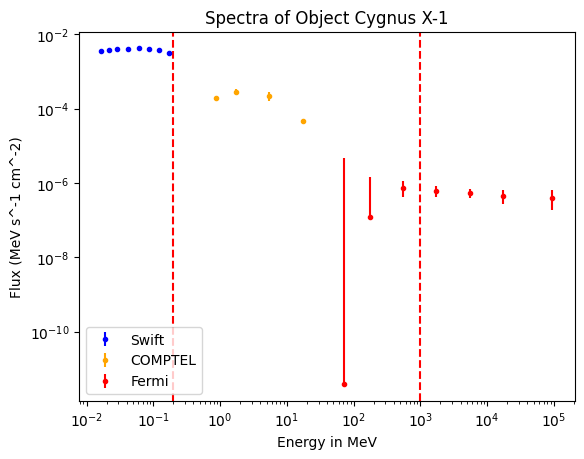

In [259]:
plt.errorbar(Bat_Energy_BandMeV, Obj_CygX1_spectra_swift, yerr = Obj_CygX1_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(COMPTEL_CygX1_EnergyBand, Obj_CygX1_COMPTEL_EnergyFlux, Obj_CygX1_COMPTEL_EnergyFlux_err, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL')
plt.errorbar(Fermi_Energy_BandMeV, Obj_CygX1_spectra_fermi, yerr = Obj_CygX1_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.axvline(x=.2, color='r', linestyle='--')
plt.axvline(x=1000, color='r', linestyle='--')
plt.legend(loc='lower left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of Object Cygnus X-1')

# CTA 102

In [260]:
fermi_obj_name = table['ASSOC1']
objname_fermi = 'CTA 102                     ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J2232.6+1143,338.1525,11.7306,77.4385,-38.5832,0.0060,0.0060,-26.470,0.0097,0.0097,-26.470,1215,,199.458,414.07,1.8789e-08,2.4464e-10,2.2012e-10,2.1896e-12,LogParabola,2.1136e-10,1.9238e-12,2.3785,0.0072,2.3241e-10,2.4354e-12,2.2607,0.0088,0.1007,0.0060,16.128,2.2348e-10,2.2148e-12,2.1027,0.0184,0.00392,0.00026,0.6667,--,16.437,22015.18,4.8138196e-07 .. 5.2458315e-12,-2.7125306e-08 .. 5.5841386e-12,7.7409475e-11 .. 1.8268446e-13,8.519442 .. 2.0327704,14315.2090,0.9575,0.2560,183.847,1.2822404e-06,1.3493233e-08,476029728.0,31559456.0,1.1389902e-07 .. 1.2822404e-06,-4.8152313e-09 .. 1.3493233e-08,35.372093 .. 183.8471,25276.4258,1.1533,0.1191,142.882,2.77533e-06,3.9012978e-08,478660000.0,5260000.0,1.1657867e-07 .. 1.3792907e-06,-1.0844816e-08 .. 2.9507543e-08,16.230228 .. 83.1392,3FGL J2232.5+1143,3FHL J2232.7+1143,J2232+1132,3EG J2232+1147,,N,,FSRQ,,CTA 102,,1.0000,0.9997,338.1517,11.7308,0.00000,256


In [261]:
Obj_CTA102_spectra_fermi = []

for gal in table[wg3]:
    Obj_CTA102_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_CTA102_spectra_fermi = [i * (624151) for i in Obj_CTA102_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_CTA102_spectra_fermi)

Obj_CTA102_spectra_fermi_yerrmin = [2.722504650424021e-06, 1.0823877911311439e-06, 4.775767090413373e-07, 4.068548890921839e-07, 4.0222246522271694e-07, 3.858378596826662e-07, 7.536086707732456e-08]
Obj_CTA102_spectra_fermi_yerrmax = [2.722504650424021e-06, 1.0823877911311439e-06, 4.775767090413373e-07, 4.068548890921839e-07, 4.0222246522271694e-07, 4.1604140812664687e-07, 1.2137608803638588e-07]
Obj_CTA102_spectra_fermi_yerr = [Obj_CTA102_spectra_fermi_yerrmin, Obj_CTA102_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[4.831520102076964e-05, 4.533557304246122e-05, 3.5892719719158445e-05, 2.2862905185008775e-05, 1.0841413796548391e-05, 3.4062155090685588e-06, 1.1402268907477323e-07]


In [262]:
obj_name = table1['COUNTERPART_NAME']
name = '[HB89] 2230+114'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
1155,SWIFT J2232.5+1141,338.178,11.713,10.78,[HB89] 2230+114,0.0,338.1517,11.7308,30.05,26.91,33.41,0.0,1.49,1.24,1.76,0.30,1.037,47.23,0.0,80,Beamed AGN,3.0 .. 22.5,0.000940803497 .. 0.0187821295,0.00351800676 .. 0.00908446591


In [263]:
Obj_CTA102_spectra_swift = [] 
Obj_CTA102_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_CTA102_spectra_swift.extend(gal['Flux'])
    Obj_CTA102_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_CTA102_spectra_swift = [i * (1e-3) for i in Obj_CTA102_spectra_swift]
Obj_CTA102_spectra_swift_err = [i * (1e-3) for i in Obj_CTA102_spectra_swift_err]

print(Obj_CTA102_spectra_swift)
print(Obj_CTA102_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[3.5180067600000004e-06, 4.6133888e-06, 5.478855220000001e-06, 4.8082047099999995e-06, 7.1730921000000005e-06, 1.01435725e-05, 9.32974368e-06, 9.084465910000001e-06]
[9.40803497e-07, 1.08162302e-06, 9.70055466e-07, 1.07329641e-06, 1.2855744e-06, 2.37393193e-06, 4.2825453000000005e-06, 1.87821295e-05]


In [264]:
Obj_CTA102_COMPTEL_PhotonFlux_075_1MEV = 7.8 * (1e-5)
Obj_CTA102_COMPTEL_PhotonFlux_1_3MEV = 12.2 * (1e-5)
Obj_CTA102_COMPTEL_PhotonFlux_3_10MEV =  6.4 * (1e-5)
Obj_CTA102_COMPTEL_PhotonFlux_10_30MEV = 1.9 * (1e-5)

Obj_CTA102_COMPTEL_EnergyFlux_075_1MEV = math.sqrt(0.75) * Obj_CTA102_COMPTEL_PhotonFlux_075_1MEV
Obj_CTA102_COMPTEL_EnergyFlux_1_3MEV = math.sqrt(3) * Obj_CTA102_COMPTEL_PhotonFlux_1_3MEV
Obj_CTA102_COMPTEL_EnergyFlux_3_10MEV = math.sqrt(30) * Obj_CTA102_COMPTEL_PhotonFlux_3_10MEV
Obj_CTA102_COMPTEL_EnergyFlux_10_30MEV = math.sqrt(300) * Obj_CTA102_COMPTEL_PhotonFlux_10_30MEV

Obj_CTA102_COMPTEL_PhotonFlux_075_1MEV_err = 0 * (1e-5)
Obj_CTA102_COMPTEL_PhotonFlux_1_3MEV_err = 0 * (1e-5)
Obj_CTA102_COMPTEL_PhotonFlux_3_10MEV_err = 0 * (1e-5)
Obj_CTA102_COMPTEL_PhotonFlux_10_30MEV_err = .9 * (1e-5)

Obj_CTA102_COMPTEL_EnergyFlux_075_1MEV_err = math.sqrt(0.75) * Obj_CTA102_COMPTEL_PhotonFlux_075_1MEV_err
Obj_CTA102_COMPTEL_EnergyFlux_1_3MEV_err = math.sqrt(3) * Obj_CTA102_COMPTEL_PhotonFlux_1_3MEV_err
Obj_CTA102_COMPTEL_EnergyFlux_3_10MEV_err = math.sqrt(30) * Obj_CTA102_COMPTEL_PhotonFlux_3_10MEV_err
Obj_CTA102_COMPTEL_EnergyFlux_10_30MEV_err = math.sqrt(300) * Obj_CTA102_COMPTEL_PhotonFlux_10_30MEV_err

COMPTEL_CTA102_EnergyBand = [math.sqrt(300)]
COMTPEL_CTA102_EnergyBand_UL = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30)]

Obj_CTA102_COMPTEL_EnergyFlux = [Obj_CTA102_COMPTEL_EnergyFlux_10_30MEV]
Obj_CTA102_COMPTEL_EnergyFlux_err = [Obj_CTA102_COMPTEL_EnergyFlux_10_30MEV_err]
Obj_CTA102_COMPTEL_EnergyFlux_UL = [Obj_CTA102_COMPTEL_EnergyFlux_075_1MEV, Obj_CTA102_COMPTEL_EnergyFlux_1_3MEV,Obj_CTA102_COMPTEL_EnergyFlux_10_30MEV]

In [265]:
FLE_obj_name = bright_FLE['AssocCOMP']
obj_name_COMP = 'CTA_102_(PKS_2230+114) '

wg9 = (obj_name_COMP == FLE_obj_name)
print(wg9)

bright_FLE[wg9]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

Name,RAdeg,DEdeg,GLON,GLAT,ePos,Signi,EF30-100,e_EF30-100,EF100-300,e_EF100-300,F30-100,e_F30-100,F100-300,e_F100-300,Class1,z,Assoc1,Assoc3FGL,AssocCOMP
,deg,deg,deg,deg,deg,,mW / m2,mW / m2,mW / m2,mW / m2,1/cm2/s,1/cm2/s,1/cm2/s,1/cm2/s,,,,,
bytes15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,bytes18,bytes18,bytes23
1FLE J2231+1132,337.938690,11.538370,77.075043,-38.593109,0.243086,30.071,6.882840e-11,1.526120e-11,7.432160e-11,2.209390e-11,8.261400e-07,1.831790e-07,2.619470e-07,8.408490e-08,fsrq,1.037000,3FGL J2232.5+1143,3FGL J2232.5+1143,CTA_102_(PKS_2230+114)


In [266]:
EFBucket30_100 = []
EFBucket30_100e = []
EFBucket100_300 = []
EFBucket100_300e = []

for gal in bright_FLE[wg9]:
    EFBucket30_100.append(gal['EF30-100'])
    EFBucket30_100e.append(gal['e_EF30-100'])
    EFBucket100_300.append(gal['EF100-300'])
    EFBucket100_300e.append(gal['e_EF100-300'])

print(EFBucket30_100)
print(EFBucket30_100e)
print(EFBucket100_300)
print(EFBucket100_300e)

EF_FLE = EFBucket30_100 + EFBucket100_300
EF_FLEe = EFBucket30_100e + EFBucket100_300e

EF_FLE = [624151 * x for x in EF_FLE]
EF_FLEe = [624151 * x for x in EF_FLEe]


print(EF_FLE)
print(EF_FLEe)

EBucket30_100 = math.sqrt(30*100)
EBucket100_300 = math.sqrt(100*300)

EBuckets = [EBucket30_100, EBucket100_300]
print(EBuckets)

[6.88284e-11]
[1.52612e-11]
[7.43216e-11]
[2.20939e-11]
[4.29593146884e-05, 4.63879009616e-05]
[9.525293241199998e-06, 1.37899297789e-05]
[54.772255750516614, 173.20508075688772]


Text(0.5, 1.0, 'Spectra of Object CTA 102')

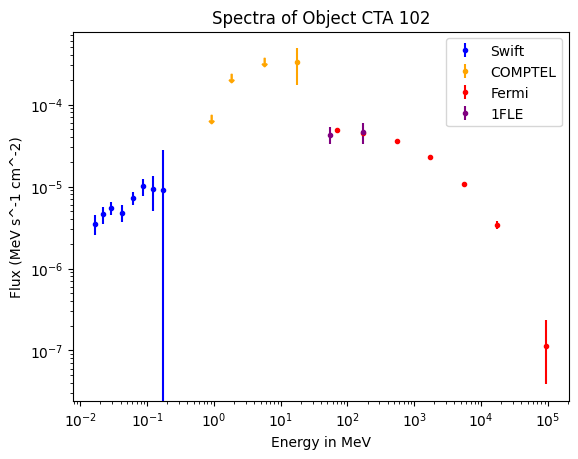

In [267]:
plt.errorbar(Bat_Energy_BandMeV, Obj_CTA102_spectra_swift, Obj_CTA102_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(COMPTEL_CTA102_EnergyBand, Obj_CTA102_COMPTEL_EnergyFlux, yerr = Obj_CTA102_COMPTEL_EnergyFlux_err, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL')
plt.scatter(COMTPEL_CTA102_EnergyBand_UL, Obj_CTA102_COMPTEL_EnergyFlux_UL, marker = r'$\downarrow$', color = 'orange')
plt.errorbar(Fermi_Energy_BandMeV, Obj_CTA102_spectra_fermi, Obj_CTA102_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.errorbar(EBuckets, EF_FLE, yerr = EF_FLEe, fmt = 'o', markersize = 3, color = 'purple', label = '1FLE')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of Object CTA 102')

# GROJ1224+2155 

In [268]:
Obj_GROJ1224_COMPTEL_PhotonFlux_075_1MEV = 4.8 * (1e-5)
Obj_GROJ1224_COMPTEL_PhotonFlux_1_3MEV = 5.4 * (1e-5)
Obj_GROJ1224_COMPTEL_PhotonFlux_3_10MEV =  2.6 * (1e-5)
Obj_GROJ1224_COMPTEL_PhotonFlux_10_30MEV = 0.9 * (1e-5)

Obj_GROJ1224_COMPTEL_EnergyFlux_075_1MEV = math.sqrt(0.75) * Obj_GROJ1224_COMPTEL_PhotonFlux_075_1MEV
Obj_GROJ1224_COMPTEL_EnergyFlux_1_3MEV = math.sqrt(3) * Obj_GROJ1224_COMPTEL_PhotonFlux_1_3MEV
Obj_GROJ1224_COMPTEL_EnergyFlux_3_10MEV = math.sqrt(30) * Obj_GROJ1224_COMPTEL_PhotonFlux_3_10MEV
Obj_GROJ1224_COMPTEL_EnergyFlux_10_30MEV = math.sqrt(300) * Obj_GROJ1224_COMPTEL_PhotonFlux_10_30MEV

Obj_GROJ1224_COMPTEL_PhotonFlux_075_1MEV_err = 0 * (1e-5)
Obj_GROJ1224_COMPTEL_PhotonFlux_1_3MEV_err = 0 * (1e-5)
Obj_GROJ1224_COMPTEL_PhotonFlux_3_10MEV_err = 0.9 * (1e-5)
Obj_GROJ1224_COMPTEL_PhotonFlux_10_30MEV_err = 0 * (1e-5)

Obj_GROJ1224_COMPTEL_EnergyFlux_075_1MEV_err = math.sqrt(0.75) * Obj_GROJ1224_COMPTEL_PhotonFlux_075_1MEV_err
Obj_GROJ1224_COMPTEL_EnergyFlux_1_3MEV_err = math.sqrt(3) * Obj_GROJ1224_COMPTEL_PhotonFlux_1_3MEV_err
Obj_GROJ1224_COMPTEL_EnergyFlux_3_10MEV_err = math.sqrt(30) * Obj_GROJ1224_COMPTEL_PhotonFlux_3_10MEV_err
Obj_GROJ1224_COMPTEL_EnergyFlux_10_30MEV_err = math.sqrt(300) * Obj_GROJ1224_COMPTEL_PhotonFlux_10_30MEV_err

COMPTEL_GROJ1224_EnergyBand = [math.sqrt(30)]
COMTPEL_GROJ1224_EnergyBand_UL = [math.sqrt(0.75), math.sqrt(3), math.sqrt(300)]

COMPTEL_GROJ1224_EnergyFlux = [Obj_GROJ1224_COMPTEL_EnergyFlux_3_10MEV]
COMPTEL_GROJ1224_EnergyFlux_err = [Obj_GROJ1224_COMPTEL_PhotonFlux_3_10MEV_err]
COMPTEL_GROJ1224_EnergyFlux_UL = [Obj_GROJ1224_COMPTEL_EnergyFlux_075_1MEV, Obj_GROJ1224_COMPTEL_EnergyFlux_1_3MEV, Obj_GROJ1224_COMPTEL_EnergyFlux_10_30MEV]

In [269]:
fermi_obj_name = table['ASSOC1']
objname_fermi = '4C +21.35                   ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J1224.9+2122,186.2277,21.3814,255.0679,81.6616,0.0055,0.0055,-83.110,0.0089,0.0089,-83.110,1068,,211.243,393.68,1.9832e-08,2.4006e-10,2.3198e-10,2.2976e-12,LogParabola,2.3269e-10,1.9988e-12,2.3335,0.0068,2.4309e-10,2.3355e-12,2.2722,0.0090,0.0450,0.0045,7.277,2.3681e-10,2.1202e-12,2.2324,0.0133,0.00128,0.00015,0.6667,--,6.939,24063.52,5.168021e-07 .. 1.0360074e-10,-2.2967862e-08 .. 1.9310217e-11,8.240524e-11 .. 4.2031556e-12,12.617417 .. 17.562609,17566.5957,0.9943,0.2658,202.662,1.3178145e-06,1.2597564e-08,286670016.0,31560000.0,7.767332e-08 .. 5.7892958e-08,-3.902095e-09 .. 4.0574033e-09,30.362185 .. 21.345629,31860.0586,1.2400,0.1280,145.815,2.5350862e-06,3.3761104e-08,299820000.0,5260000.0,5.619648e-08 .. 8.0303174e-08,-7.561023e-09 .. 1.1468526e-08,10.523777 .. 10.363925,3FGL J1224.9+2122,3FHL J1224.9+2122,,3EG J1224+2118,,P,4C +21.35,FSRQ,,4C +21.35,,1.0000,0.9990,186.2269,21.3796,0.00000,0


In [270]:
Obj_GROJ1224_spectra_fermi = []

for gal in table[wg3]:
    Obj_GROJ1224_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_GROJ1224_spectra_fermi = [i * (624151) for i in Obj_GROJ1224_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_GROJ1224_spectra_fermi)

Obj_GROJ1224_spectra_fermi_yerrmin = [2.285813630340059e-06, 9.577348479655702e-07, 4.3924044177919876e-07, 3.9363899262444615e-07, 4.433676032107115e-07, 5.649715804076968e-07, 4.252033627380231e-07]
Obj_GROJ1224_spectra_fermi_yerrmax = [2.285813630340059e-06, 9.577348479655702e-07, 4.3924044177919876e-07, 3.9363899262444615e-07, 4.433676032107115e-07, 5.649715804076968e-07, 4.889781540594177e-07]
Obj_GROJ1224_spectra_fermi_yerr = [Obj_GROJ1224_spectra_fermi_yerrmin, Obj_GROJ1224_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[5.1433314419264964e-05, 4.4278036597705794e-05, 3.4013783613721926e-05, 2.2914534053349034e-05, 1.3601667807233361e-05, 6.8625624717278885e-06, 2.623403782562716e-06]


In [271]:
obj_name = table1['COUNTERPART_NAME']
name = 'PG 1222+216'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
614,SWIFT J1224.9+2122,186.221,21.401,12.60,PG 1222+216,0.0,186.2269,21.3796,24.50,21.63,27.16,0.0,1.70,1.45,1.96,1.80,0.432,46.22,0.0,80,Beamed AGN,3.0 .. 22.5,0.000757230446 .. 0.016293589,0.00400736462 .. 0.0504963249


In [272]:
Obj_GROJ1224_spectra_swift = [] 
Obj_GROJ1224_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_GROJ1224_spectra_swift.extend(gal['Flux'])
    Obj_GROJ1224_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_GROJ1224_spectra_swift = [i * (1e-3) for i in Obj_GROJ1224_spectra_swift]
Obj_GROJ1224_spectra_swift_err = [i * (1e-3) for i in Obj_GROJ1224_spectra_swift_err]

print(Obj_GROJ1224_spectra_swift)
print(Obj_GROJ1224_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[4.007364620000001e-06, 5.61628398e-06, 4.02160501e-06, 5.17058698e-06, 5.57197491e-06, 5.61379129e-06, 1.0977961099999999e-05, 5.04963249e-05]
[7.572304459999999e-07, 9.01977241e-07, 7.638644889999999e-07, 8.84956447e-07, 1.0694153600000001e-06, 1.97383342e-06, 3.64640518e-06, 1.6293589000000003e-05]


In [273]:
FLE_obj_name = bright_FLE['AssocCOMP']
obj_name_COMP = 'GROJ1224+2155          '

wg9 = (obj_name_COMP == FLE_obj_name)
print(wg9)

bright_FLE[wg9]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

Name,RAdeg,DEdeg,GLON,GLAT,ePos,Signi,EF30-100,e_EF30-100,EF100-300,e_EF100-300,F30-100,e_F30-100,F100-300,e_F100-300,Class1,z,Assoc1,Assoc3FGL,AssocCOMP
,deg,deg,deg,deg,deg,,mW / m2,mW / m2,mW / m2,mW / m2,1/cm2/s,1/cm2/s,1/cm2/s,1/cm2/s,,,,,
bytes15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,bytes18,bytes18,bytes23
1FLE J1224+2118,186.245590,21.313829,255.477493,81.625549,0.243811,28.172,5.635250e-11,1.249500e-11,4.976590e-11,1.479410e-11,6.763930e-07,1.499760e-07,2.144660e-07,5.630340e-08,fsrq,0.435000,3FGL J1224.9+2122,3FGL J1224.9+2122,GROJ1224+2155


In [274]:
EFBucket30_100 = []
EFBucket30_100e = []
EFBucket100_300 = []
EFBucket100_300e = []

for gal in bright_FLE[wg9]:
    EFBucket30_100.append(gal['EF30-100'])
    EFBucket30_100e.append(gal['e_EF30-100'])
    EFBucket100_300.append(gal['EF100-300'])
    EFBucket100_300e.append(gal['e_EF100-300'])

print(EFBucket30_100)
print(EFBucket30_100e)
print(EFBucket100_300)
print(EFBucket100_300e)

EF_FLE = EFBucket30_100 + EFBucket100_300
EF_FLEe = EFBucket30_100e + EFBucket100_300e

EF_FLE = [624151 * x for x in EF_FLE]
EF_FLEe = [624151 * x for x in EF_FLEe]


print(EF_FLE)
print(EF_FLEe)

EBucket30_100 = math.sqrt(30*100)
EBucket100_300 = math.sqrt(100*300)

EBuckets = [EBucket30_100, EBucket100_300]
print(EBuckets)

[5.63525e-11]
[1.2495e-11]
[4.97659e-11]
[1.47941e-11]
[3.51724692275e-05, 3.10614362509e-05]
[7.798766745e-06, 9.2337523091e-06]
[54.772255750516614, 173.20508075688772]


Text(0.5, 1.0, 'Spectra of Object GRO J1224+2155')

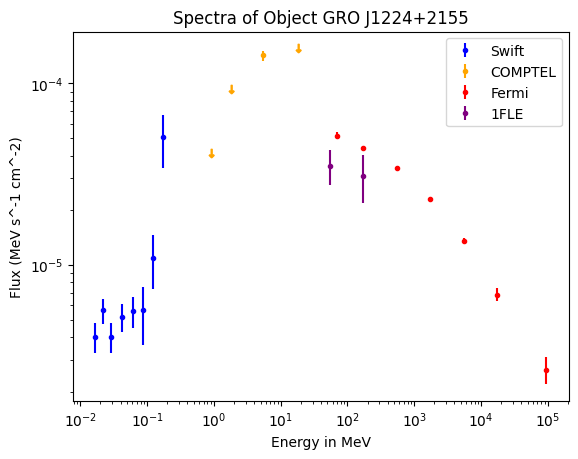

In [275]:
plt.errorbar(Bat_Energy_BandMeV, Obj_GROJ1224_spectra_swift, Obj_GROJ1224_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(COMPTEL_GROJ1224_EnergyBand, COMPTEL_GROJ1224_EnergyFlux, yerr = COMPTEL_GROJ1224_EnergyFlux_err, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL')
plt.scatter(COMTPEL_GROJ1224_EnergyBand_UL, COMPTEL_GROJ1224_EnergyFlux_UL, marker = r'$\downarrow$', color = 'orange')
plt.errorbar(Fermi_Energy_BandMeV, Obj_GROJ1224_spectra_fermi, Obj_GROJ1224_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.errorbar(EBuckets, EF_FLE, yerr = EF_FLEe, fmt = 'o', markersize = 3, color = 'purple', label = '1FLE')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of Object GRO J1224+2155')

# PKS 1622-297

In [276]:
Obj_PKS1622_COMPTEL_PhotonFlux_075_1MEV = 22 * (1e-5)
Obj_PKS1622_COMPTEL_PhotonFlux_1_3MEV = 13.5 * (1e-5)
Obj_PKS1622_COMPTEL_PhotonFlux_3_10MEV = 6.1 * (1e-5)
Obj_PKS1622_COMPTEL_PhotonFlux_10_30MEV = 3.3 * (1e-5)

Obj_PKS1622_COMPTEL_EnergyFlux_075_1MEV = math.sqrt(0.75) * Obj_PKS1622_COMPTEL_PhotonFlux_075_1MEV
Obj_PKS1622_COMPTEL_EnergyFlux_1_3MEV = math.sqrt(3) * Obj_PKS1622_COMPTEL_PhotonFlux_1_3MEV
Obj_PKS1622_COMPTEL_EnergyFlux_3_10MEV = math.sqrt(30) * Obj_PKS1622_COMPTEL_PhotonFlux_3_10MEV
Obj_PKS1622_COMPTEL_EnergyFlux_10_30MEV = math.sqrt(300) * Obj_PKS1622_COMPTEL_PhotonFlux_10_30MEV

Obj_PKS1622_COMPTEL_PhotonFlux_075_1MEV_err = 0 * (1e-5)
Obj_PKS1622_COMPTEL_PhotonFlux_1_3MEV_err = 0 * (1e-5)
Obj_PKS1622_COMPTEL_PhotonFlux_3_10MEV_err = 0 * (1e-5)
Obj_PKS1622_COMPTEL_PhotonFlux_10_30MEV_err = 0.7 * (1e-5)

Obj_PKS1622_COMPTEL_EnergyFlux_075_1MEV_err = math.sqrt(0.75) * Obj_PKS1622_COMPTEL_PhotonFlux_075_1MEV_err
Obj_PKS1622_COMPTEL_EnergyFlux_1_3MEV_err = math.sqrt(3) * Obj_PKS1622_COMPTEL_PhotonFlux_1_3MEV_err
Obj_PKS1622_COMPTEL_EnergyFlux_3_10MEV_err = math.sqrt(30) * Obj_PKS1622_COMPTEL_PhotonFlux_3_10MEV_err
Obj_PKS1622_COMPTEL_EnergyFlux_10_30MEV_err = math.sqrt(300) * Obj_PKS1622_COMPTEL_PhotonFlux_10_30MEV_err

COMPTEL_PKS1622_EnergyBand = [math.sqrt(300)]
COMTPEL_PKS1622_EnergyBand_UL = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30)]

COMPTEL_PKS1622_EnergyFlux = [Obj_PKS1622_COMPTEL_EnergyFlux_10_30MEV]
COMPTEL_PKS1622_EnergyFlux_err = [Obj_PKS1622_COMPTEL_PhotonFlux_10_30MEV_err]
COMPTEL_PKS1622_EnergyFlux_UL = [Obj_PKS1622_COMPTEL_EnergyFlux_075_1MEV, Obj_PKS1622_COMPTEL_EnergyFlux_1_3MEV, Obj_PKS1622_COMPTEL_EnergyFlux_3_10MEV]

In [277]:
fermi_obj_name = table['ASSOC1']
objname_fermi = 'PKS B1622-297               ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J1626.0-2950,246.5150,-29.8486,348.8178,13.3280,0.0143,0.0127,19.920,0.0232,0.0206,19.920,779,,45.057,598.93,3.0748e-09,1.2023e-10,4.2333e-11,1.5458e-12,LogParabola,1.7104e-11,5.0611e-13,2.5494,0.0241,1.9341e-11,6.6618e-13,2.4726,0.0335,0.1161,0.0216,5.426,1.8521e-11,6.3552e-13,2.2691,0.0736,0.00379,0.00102,0.6667,--,4.453,4738.03,9.7610105e-08 .. 1.1663472e-11,-4.0526075e-08 .. 7.798689e-12,1.5651775e-11 .. 3.8308058e-13,2.441363 .. 3.5950463,376.0275,0.6034,0.1641,29.995,1.4543681e-07,6.3467414e-09,444470016.0,31560000.0,4.042333e-08 .. 1.3231323e-07,-5.795035e-09 .. 7.1861996e-09,7.9631777 .. 23.653406,853.9994,0.7805,0.0850,19.434,2.7664547e-07,1.9243222e-08,473400000.0,5260000.0,5.6773064e-08 .. 3.498312e-08,-1.401848e-08 .. 1.1062381e-08,4.769775 .. 3.6438313,3FGL J1626.0-2951,3FHL J1625.9-2951,J1626-2943,3EG J1625-2955,EGR J1625-2958,N,,FSRQ,,PKS B1622-297,,1.0000,0.9997,246.5251,-29.8575,0.00000,0


In [278]:
Obj_PKS1622_spectra_fermi = []

for gal in table[wg3]:
    Obj_PKS1622_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_PKS1622_spectra_fermi = [i * (624151) for i in Obj_PKS1622_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_PKS1622_spectra_fermi)

Obj_PKS1622_spectra_fermi_yerrmin = [4.0559541089370266e-06, 8.235729015831092e-07, 2.985576899612987e-07, 2.0026428446191422e-07, 1.5460918944930476e-07, 1.4770174811495028e-07, 1.1203249711063562e-07]
Obj_PKS1622_spectra_fermi_yerrmax = [3.680159308743977e-06, 8.235729015831092e-07, 2.985576899612987e-07, 2.0026428446191422e-07, 1.6428682776903564e-07, 1.757598175152386e-07, 1.5987242161328717e-07]
Obj_PKS1622_spectra_fermi_yerr = [Obj_PKS1622_spectra_fermi_yerrmin, Obj_PKS1622_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[9.769071027353887e-06, 1.0431291060973916e-05, 6.990192988392749e-06, 3.68120170646637e-06, 1.2996609930512708e-06, 5.417520764025726e-07, 2.3910012983269766e-07]


In [279]:
obj_name = table1['COUNTERPART_NAME']
name = 'PKS 1622-29'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
808,SWIFT J1626.5-2951,246.554,-29.855,5.07,PKS 1622-29,0.0,246.5251,-29.8575,15.54,12.64,19.09,0.0,1.32,0.66,1.99,1.00,0.815,46.69,0.0,80,Beamed AGN,3.0 .. 22.5,0.00126115826 .. 0.0177975725,0.0023802123 .. -0.0170777645


In [280]:
Obj_PKS1622_spectra_swift = [] 
Obj_PKS1622_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_PKS1622_spectra_swift.extend(gal['Flux'])
    Obj_PKS1622_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_PKS1622_spectra_swift = [i * (1e-3) for i in Obj_PKS1622_spectra_swift]
Obj_PKS1622_spectra_swift_err = [i * (1e-3) for i in Obj_PKS1622_spectra_swift_err]

print(Obj_PKS1622_spectra_swift)
print(Obj_PKS1622_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[2.3802123000000002e-06, 2.70619732e-06, 1.36569946e-06, 2.72666733e-06, 2.56664376e-06, 6.614626850000001e-06, 8.68858397e-06, -1.7077764499999997e-05]
[1.2611582599999999e-06, 1.1796074699999999e-06, 9.57568176e-07, 1.01660134e-06, 1.23042322e-06, 2.24051159e-06, 4.0323315199999995e-06, 1.7797572500000002e-05]


In [281]:
FLE_obj_name = bright_FLE['AssocCOMP']
obj_name_COMP = 'PKS_1622-297           '

wg9 = (obj_name_COMP == FLE_obj_name)
print(wg9)

bright_FLE[wg9]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

Name,RAdeg,DEdeg,GLON,GLAT,ePos,Signi,EF30-100,e_EF30-100,EF100-300,e_EF100-300,F30-100,e_F30-100,F100-300,e_F100-300,Class1,z,Assoc1,Assoc3FGL,AssocCOMP
,deg,deg,deg,deg,deg,,mW / m2,mW / m2,mW / m2,mW / m2,1/cm2/s,1/cm2/s,1/cm2/s,1/cm2/s,,,,,
bytes15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,bytes18,bytes18,bytes23
1FLE J1625-2926,246.427643,-29.434141,349.079071,13.664161,0.246676,4.228,1.206180e-11,3.992080e-12,1.368360e-11,3.884660e-12,1.447770e-07,4.791650e-08,4.590490e-08,1.478420e-08,fsrq,0.815000,3FGL J1626.0-2951,3FGL J1626.0-2951,PKS_1622-297


In [282]:
EFBucket30_100 = []
EFBucket30_100e = []
EFBucket100_300 = []
EFBucket100_300e = []

for gal in bright_FLE[wg9]:
    EFBucket30_100.append(gal['EF30-100'])
    EFBucket30_100e.append(gal['e_EF30-100'])
    EFBucket100_300.append(gal['EF100-300'])
    EFBucket100_300e.append(gal['e_EF100-300'])

print(EFBucket30_100)
print(EFBucket30_100e)
print(EFBucket100_300)
print(EFBucket100_300e)

EF_FLE = EFBucket30_100 + EFBucket100_300
EF_FLEe = EFBucket30_100e + EFBucket100_300e

EF_FLE = [624151 * x for x in EF_FLE]
EF_FLEe = [624151 * x for x in EF_FLEe]


print(EF_FLE)
print(EF_FLEe)

EBucket30_100 = math.sqrt(30*100)
EBucket100_300 = math.sqrt(100*300)

EBuckets = [EBucket30_100, EBucket100_300]
print(EBuckets)

[1.20618e-11]
[3.99208e-12]
[1.36836e-11]
[3.88466e-12]
[7.5283845318e-06, 8.5406326236e-06]
[2.49166072408e-06, 2.42461442366e-06]
[54.772255750516614, 173.20508075688772]


Text(0.5, 1.0, 'Spectra of Object PKS 1622-297')

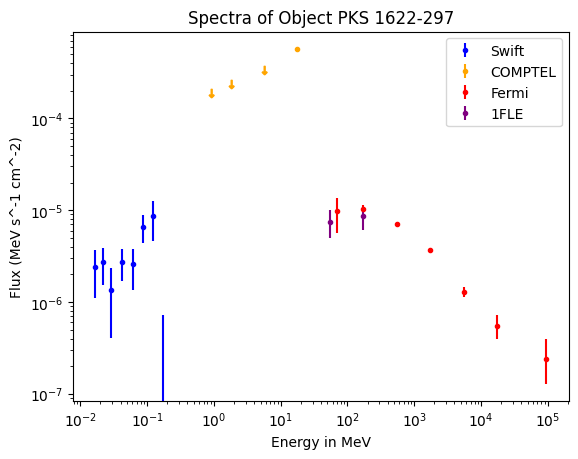

In [283]:
plt.errorbar(Bat_Energy_BandMeV, Obj_PKS1622_spectra_swift, Obj_PKS1622_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(COMPTEL_PKS1622_EnergyBand, COMPTEL_PKS1622_EnergyFlux, yerr = COMPTEL_PKS1622_EnergyFlux_err, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL')
plt.scatter(COMTPEL_PKS1622_EnergyBand_UL, COMPTEL_PKS1622_EnergyFlux_UL, marker = r'$\downarrow$', color = 'orange')
plt.errorbar(Fermi_Energy_BandMeV, Obj_PKS1622_spectra_fermi, Obj_PKS1622_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.errorbar(EBuckets, EF_FLE, yerr = EF_FLEe, fmt = 'o', markersize = 3, color = 'purple', label = '1FLE')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of Object PKS 1622-297')

# GRO J1214+06

In [284]:
Obj_GROJ1214_COMPTEL_PhotonFlux_075_1MEV = 5.1 * (1e-5)
Obj_GROJ1214_COMPTEL_PhotonFlux_1_3MEV = 6.8 * (1e-5)
Obj_GROJ1214_COMPTEL_PhotonFlux_3_10MEV =  4.0 * (1e-5)
Obj_GROJ1214_COMPTEL_PhotonFlux_10_30MEV = 0.7 * (1e-5)

Obj_GROJ1214_COMPTEL_EnergyFlux_075_1MEV = math.sqrt(0.75) * Obj_GROJ1214_COMPTEL_PhotonFlux_075_1MEV
Obj_GROJ1214_COMPTEL_EnergyFlux_1_3MEV = math.sqrt(3) * Obj_GROJ1214_COMPTEL_PhotonFlux_1_3MEV
Obj_GROJ1214_COMPTEL_EnergyFlux_3_10MEV = math.sqrt(30) * Obj_GROJ1214_COMPTEL_PhotonFlux_3_10MEV
Obj_GROJ1214_COMPTEL_EnergyFlux_10_30MEV = math.sqrt(300) * Obj_GROJ1214_COMPTEL_PhotonFlux_10_30MEV

Obj_GROJ1214_COMPTEL_PhotonFlux_075_1MEV_err = 0 * (1e-5)
Obj_GROJ1214_COMPTEL_PhotonFlux_1_3MEV_err = 0 * (1e-5)
Obj_GROJ1214_COMPTEL_PhotonFlux_3_10MEV_err = 0.9 * (1e-5)
Obj_GROJ1214_COMPTEL_PhotonFlux_10_30MEV_err = 0 * (1e-5)

Obj_GROJ1214_COMPTEL_EnergyFlux_075_1MEV_err = math.sqrt(0.75) * Obj_GROJ1214_COMPTEL_PhotonFlux_075_1MEV_err
Obj_GROJ1214_COMPTEL_EnergyFlux_1_3MEV_err = math.sqrt(3) * Obj_GROJ1214_COMPTEL_PhotonFlux_1_3MEV_err
Obj_GROJ1214_COMPTEL_EnergyFlux_3_10MEV_err = math.sqrt(30) * Obj_GROJ1214_COMPTEL_PhotonFlux_3_10MEV_err
Obj_GROJ1214_COMPTEL_EnergyFlux_10_30MEV_err = math.sqrt(300) * Obj_GROJ1214_COMPTEL_PhotonFlux_10_30MEV_err

COMPTEL_GROJ1214_EnergyBand = [math.sqrt(30)]
COMTPEL_GROJ1214_EnergyBand_UL = [math.sqrt(0.75), math.sqrt(3), math.sqrt(300)]

COMPTEL_GROJ1214_EnergyFlux = [Obj_GROJ1214_COMPTEL_EnergyFlux_3_10MEV]
COMPTEL_GROJ1214_EnergyFlux_err = [Obj_GROJ1214_COMPTEL_PhotonFlux_3_10MEV_err]
COMPTEL_GROJ1214_EnergyFlux_UL = [Obj_GROJ1214_COMPTEL_EnergyFlux_075_1MEV, Obj_GROJ1214_COMPTEL_EnergyFlux_1_3MEV, Obj_GROJ1214_COMPTEL_EnergyFlux_10_30MEV]

In [285]:
fermi_obj_name = table['ASSOC2']
objname_fermi = 'SDSS J12168+0541          ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J1216.2+0537,184.0612,5.6248,280.0810,66.9222,0.0803,0.0677,33.580,0.1302,0.1097,33.580,384,,4.723,2048.20,1.5861e-10,3.7623e-11,1.7996e-12,4.3328e-13,PowerLaw,3.9362e-14,9.3051e-15,2.1771,0.1805,4.6881e-14,1.3301e-14,2.0018,0.2897,0.1528,0.1767,0.935,4.4537e-14,1.1880e-14,1.7575,0.5199,0.00211,0.00270,0.6667,--,1.000,184.07,1.646107e-10 .. 1.8533395e-16,-- .. 5.233595e-12,2.6186039e-14 .. 9.22289e-18,0.0 .. 0.0,15.9734,0.6632,0.3232,--,--,--,--,--,6.508436e-10 .. 1.498828e-11,-- .. 1.5603424e-09,0.52061725 .. 0.0,48.3710,0.0000,10.0000,--,--,--,--,--,3.6003288e-12 .. 4.337738e-10,-- .. 5.9174345e-09,0.0 .. 0.08385912,,,,,,N,,,agn,,SDSS J12168+0541,0.3200,0.0000,184.2083,5.6933,0.00450,0


In [286]:
Obj_GROJ1214_spectra_fermi = []

for gal in table[wg3]:
    Obj_GROJ1214_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_GROJ1214_spectra_fermi = [i * (624151) for i in Obj_GROJ1214_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_GROJ1214_spectra_fermi)

Obj_GROJ1214_spectra_fermi_yerrmin = [0.0, 3.2712917016956504e-07, 9.146859593701622e-08, 6.798765363707e-08, 6.116212935721078e-08, 7.485802926620816e-08, 0.0]
Obj_GROJ1214_spectra_fermi_yerrmax = [2.6146810438963664e-06, 3.347299871918428e-07, 9.746276596141103e-08, 7.474033625321213e-08, 7.61008534051668e-08, 1.1711965886602603e-07, 1.625555603884676e-07]
Obj_GROJ1214_spectra_fermi_yerr = [Obj_GROJ1214_spectra_fermi_yerrmin, Obj_GROJ1214_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[1.6344042309899336e-08, 6.263414944077204e-07, 1.1705661525539734e-07, 2.3135423300756942e-07, 1.2631807100615706e-07, 1.393210673483194e-07, 5.756476092559904e-12]


In [287]:
obj_name = table1['COUNTERPART_NAME']
name = '2MASX J12150077+0500512'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
1400,SWIFT J1215.0+0504,183.778,5.074,6.20,2MASX J12150077+0500512,0.0,183.7532,5.0143,7.87,6.33,9.66,0.0,2.73,2.13,3.56,1.00,0.0782,44.07,0.0,40,Sy1.8,3.0 .. 22.5,0.000948868168 .. 0.0193079505,0.00348384748 .. -0.00138042041


In [288]:
Obj_GROJ1214_spectra_swift = [] 
Obj_GROJ1214_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_GROJ1214_spectra_swift.extend(gal['Flux'])
    Obj_GROJ1214_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_GROJ1214_spectra_swift = [i * (1e-3) for i in Obj_GROJ1214_spectra_swift]
Obj_GROJ1214_spectra_swift_err = [i * (1e-3) for i in Obj_GROJ1214_spectra_swift_err]

print(Obj_GROJ1214_spectra_swift)
print(Obj_GROJ1214_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[3.48384748e-06, 2.84613599e-06, 3.05769988e-06, 2.55668862e-06, 8.60825472e-07, -3.38742486e-06, 5.43989288e-06, -1.3804204099999999e-06]
[9.488681680000001e-07, 1.04994595e-06, 9.12636053e-07, 1.0590747700000001e-06, 1.2750960899999999e-06, 2.39123823e-06, 4.3191635e-06, 1.93079505e-05]


Text(0.5, 1.0, 'Spectra of Object GRO J1214+06')

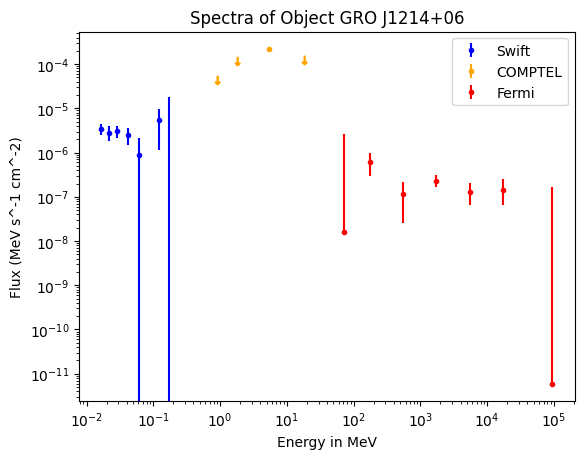

In [289]:
plt.errorbar(Bat_Energy_BandMeV, Obj_GROJ1214_spectra_swift, Obj_GROJ1214_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(COMPTEL_GROJ1214_EnergyBand, COMPTEL_GROJ1214_EnergyFlux, yerr = COMPTEL_GROJ1214_EnergyFlux_err, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL')
plt.scatter(COMTPEL_GROJ1214_EnergyBand_UL, COMPTEL_GROJ1214_EnergyFlux_UL, marker = r'$\downarrow$', color = 'orange')
plt.errorbar(Fermi_Energy_BandMeV, Obj_GROJ1214_spectra_fermi, Obj_GROJ1214_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of Object GRO J1214+06')

# PKS 0528+134

In [290]:
Obj_PKS0528_COMPTEL_PhotonFlux_075_1MEV1 = 8.7 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_1_3MEV1 = 5.8 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV1 = 4.3  * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_10_30MEV1 = 2.0 * (1e-5)

Obj_PKS0528_COMPTEL_EnergyFlux_075_1MEV1 = math.sqrt(0.75) * Obj_PKS0528_COMPTEL_PhotonFlux_075_1MEV1
Obj_PKS0528_COMPTEL_EnergyFlux_1_3MEV1 = math.sqrt(3) * Obj_PKS0528_COMPTEL_PhotonFlux_1_3MEV1
Obj_PKS0528_COMPTEL_EnergyFlux_3_10MEV1 = math.sqrt(30) * Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV1
Obj_PKS0528_COMPTEL_EnergyFlux_10_30MEV1 = math.sqrt(300) * Obj_PKS0528_COMPTEL_PhotonFlux_10_30MEV1

Obj_PKS0528_COMPTEL_PhotonFlux_075_1MEV_err1 = 0 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_1_3MEV_err1 = 3.4 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV_err1 = 1.4 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_10_30MEV_err1 = 0.5 * (1e-5)

Obj_PKS0528_COMPTEL_EnergyFlux_075_1MEV_err1 = math.sqrt(0.75) * Obj_PKS0528_COMPTEL_PhotonFlux_075_1MEV_err1
Obj_PKS0528_COMPTEL_EnergyFlux_1_3MEV_err1 = math.sqrt(3) * Obj_PKS0528_COMPTEL_PhotonFlux_1_3MEV_err1
Obj_PKS0528_COMPTEL_EnergyFlux_3_10MEV_err1 = math.sqrt(30) * Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV_err1
Obj_PKS0528_COMPTEL_EnergyFlux_10_30MEV_err1 = math.sqrt(300) * Obj_PKS0528_COMPTEL_PhotonFlux_10_30MEV_err1

COMPTEL_PKS0528_EnergyBand_UL1 = [math.sqrt(0.75)]
COMPTEL_PKS0528_EnergyBand1 = [math.sqrt(3), math.sqrt(30), math.sqrt(300)]

COMPTEL_PKS0528_EnergyFlux_UL1 = [Obj_PKS0528_COMPTEL_EnergyFlux_075_1MEV1]
COMPTEL_PKS0528_EnergyFlux_err1 = [Obj_PKS0528_COMPTEL_PhotonFlux_1_3MEV_err1, Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV_err1, Obj_PKS0528_COMPTEL_PhotonFlux_10_30MEV_err1]
COMPTEL_PKS0528_EnergyFlux1 = [Obj_PKS0528_COMPTEL_EnergyFlux_1_3MEV1, Obj_PKS0528_COMPTEL_EnergyFlux_3_10MEV1, Obj_PKS0528_COMPTEL_EnergyFlux_10_30MEV1]

In [291]:
Obj_PKS0528_COMPTEL_PhotonFlux_075_1MEV2 = 4.2 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_1_3MEV2 = 8.5 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV2 = 2.3  * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_10_30MEV2 = 1.3 * (1e-5)

Obj_PKS0528_COMPTEL_EnergyFlux_075_1MEV2 = math.sqrt(0.75) * Obj_PKS0528_COMPTEL_PhotonFlux_075_1MEV2
Obj_PKS0528_COMPTEL_EnergyFlux_1_3MEV2 = math.sqrt(3) * Obj_PKS0528_COMPTEL_PhotonFlux_1_3MEV2
Obj_PKS0528_COMPTEL_EnergyFlux_3_10MEV2 = math.sqrt(30) * Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV2
Obj_PKS0528_COMPTEL_EnergyFlux_10_30MEV2 = math.sqrt(300) * Obj_PKS0528_COMPTEL_PhotonFlux_10_30MEV2

Obj_PKS0528_COMPTEL_PhotonFlux_075_1MEV_err2 = 3.4 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_1_3MEV_err2 = 2.7 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV_err2 = 1.0 * (1e-5)
Obj_PKS0528_COMPTEL_PhotonFlux_10_30MEV_err2 = 0.4 * (1e-5)

Obj_PKS0528_COMPTEL_EnergyFlux_075_1MEV_err2 = math.sqrt(0.75) * Obj_PKS0528_COMPTEL_PhotonFlux_075_1MEV_err2
Obj_PKS0528_COMPTEL_EnergyFlux_1_3MEV_err2 = math.sqrt(3) * Obj_PKS0528_COMPTEL_PhotonFlux_1_3MEV_err2
Obj_PKS0528_COMPTEL_EnergyFlux_3_10MEV_err2 = math.sqrt(30) * Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV_err2
Obj_PKS0528_COMPTEL_EnergyFlux_10_30MEV_err2 = math.sqrt(300) * Obj_PKS0528_COMPTEL_PhotonFlux_10_30MEV_err2

COMPTEL_PKS0528_EnergyBand2 = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30), math.sqrt(300)]

COMPTEL_PKS0528_EnergyFlux_err2 = [Obj_PKS0528_COMPTEL_EnergyFlux_075_1MEV_err2, Obj_PKS0528_COMPTEL_EnergyFlux_1_3MEV_err2, Obj_PKS0528_COMPTEL_PhotonFlux_3_10MEV_err2, Obj_PKS0528_COMPTEL_EnergyFlux_10_30MEV_err2]
COMPTEL_PKS0528_EnergyFlux2 = [Obj_PKS0528_COMPTEL_EnergyFlux_075_1MEV2, Obj_PKS0528_COMPTEL_EnergyFlux_1_3MEV2, Obj_PKS0528_COMPTEL_EnergyFlux_3_10MEV2, Obj_PKS0528_COMPTEL_EnergyFlux_10_30MEV2]

In [292]:
fermi_obj_name = table['ASSOC1']
objname_fermi = 'PKS 0528+134                ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J0530.9+1332,82.7364,13.5402,191.3612,-11.0065,0.0228,0.0210,23.730,0.0369,0.0341,23.730,858,,26.917,736.41,2.0537e-09,1.1899e-10,2.5775e-11,1.8933e-12,LogParabola,6.7134e-12,3.1248e-13,2.5757,0.0343,8.5092e-12,4.5934e-13,2.5016,0.0596,0.2437,0.0506,6.706,8.2811e-12,4.5359e-13,1.8863,0.1573,0.00999,0.00232,0.6667,--,6.185,2915.51,6.924727e-08 .. 1.5326091e-12,-6.138056e-08 .. 6.1407264e-12,1.1380634e-11 .. 4.3069206e-14,1.1384275 .. 0.61632246,402.3596,1.0224,0.2774,23.655,1.4356816e-07,7.96768e-09,349790016.0,31560000.0,8.202372e-08 .. 1.1339679e-08,-6.2535883e-09 .. 5.37027e-09,16.38329 .. 2.3393593,727.5315,1.2304,0.1341,16.631,2.4005791e-07,1.9505062e-08,242073712.0,5032582.5,2.4005791e-07 .. 2.1390296e-08,-1.9505062e-08 .. 1.40120076e-08,16.631462 .. 1.7198346,3FGL J0530.8+1330,,J0531+1334,3EG J0530+1323,EGR J0530+1331,N,,FSRQ,,PKS 0528+134,,1.0000,0.9940,82.7351,13.5320,0.00000,0


In [293]:
Obj_PKS0528_spectra_fermi = []

for gal in table[wg3]:
    Obj_PKS0528_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_PKS0528_spectra_fermi = [i * (624151) for i in Obj_PKS0528_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_PKS0528_spectra_fermi)

Obj_PKS0528_spectra_fermi_yerrmin = [6.296284291882083e-06, 1.0615924309767914e-06, 3.2865782252241045e-07, 1.9082087810246687e-07, 1.3832316571226577e-07, 7.076770759351277e-08, 0.0]
Obj_PKS0528_spectra_fermi_yerrmax = [3.7410890932460493e-06, 1.1193401948888073e-06, 3.2865783774831906e-07, 1.9082088787913888e-07, 1.4969799659662582e-07, 1.079433411725557e-07, 1.0770723003563384e-07]
Obj_PKS0528_spectra_fermi_yerr = [Obj_PKS0528_spectra_fermi_yerrmin, Obj_PKS0528_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[7.103234267861677e-06, 6.244257400893002e-06, 5.057512902748203e-06, 2.364447393817231e-06, 8.285422234700348e-07, 1.2287258077412562e-07, 2.688168814501561e-08]


In [294]:
obj_name = table1['COUNTERPART_NAME']
name = 'PKS 0528+134'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
282,SWIFT J0530.8+1333,82.742,13.572,4.74,PKS 0528+134,0.0,82.7351,13.5320,18.24,14.84,22.96,0.0,1.25,0.75,1.73,2.30,2.06,47.75,0.0,80,Beamed AGN,3.0 .. 22.5,0.00106426375 .. 0.0216995981,0.000233800194 .. -0.0252453517


In [295]:
Obj_PKS0528_spectra_swift = [] 
Obj_PKS0528_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_PKS0528_spectra_swift.extend(gal['Flux'])
    Obj_PKS0528_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_PKS0528_spectra_swift = [i * (1e-3) for i in Obj_PKS0528_spectra_swift]
Obj_PKS0528_spectra_swift_err = [i * (1e-3) for i in Obj_PKS0528_spectra_swift_err]

print(Obj_PKS0528_spectra_swift)
print(Obj_PKS0528_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[2.33800194e-07, 2.2295804200000003e-06, 3.1682041e-06, 2.8319202800000002e-06, 3.69375967e-06, 1.11239264e-05, -2.7793936900000002e-06, -2.52453517e-05]
[1.0642637500000001e-06, 1.25197286e-06, 1.0831869400000001e-06, 1.2324110100000002e-06, 1.42104377e-06, 2.5704552000000003e-06, 4.938037600000001e-06, 2.1699598099999997e-05]


Text(0.5, 1.0, 'Spectra of Object PKS 0528+134')

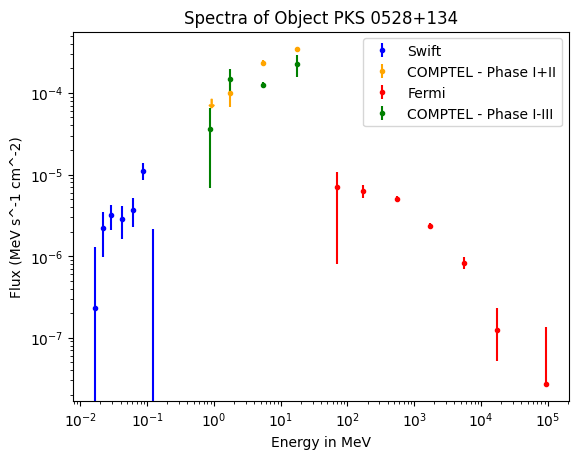

In [296]:
plt.errorbar(Bat_Energy_BandMeV, Obj_PKS0528_spectra_swift, Obj_PKS0528_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(COMPTEL_PKS0528_EnergyBand1, COMPTEL_PKS0528_EnergyFlux1, yerr = COMPTEL_PKS0528_EnergyFlux_err1, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL - Phase I+II')
plt.scatter(COMPTEL_PKS0528_EnergyBand_UL1, COMPTEL_PKS0528_EnergyFlux_UL1, marker = r'$\downarrow$', color = 'orange')
plt.errorbar(Fermi_Energy_BandMeV, Obj_PKS0528_spectra_fermi, Obj_PKS0528_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.errorbar(COMPTEL_PKS0528_EnergyBand2, COMPTEL_PKS0528_EnergyFlux2, yerr = COMPTEL_PKS0528_EnergyFlux_err2, fmt = 'o', markersize = 3, color = 'green', label = 'COMPTEL - Phase I-III')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of Object PKS 0528+134')

# GT 0236+610

In [297]:
Obj_GT0236_COMPTEL_PhotonFlux_075_1MEV1 = 4.8 * (1e-5)
Obj_GT0236_COMPTEL_PhotonFlux_1_3MEV1 = 11.2 * (1e-5)
Obj_GT0236_COMPTEL_PhotonFlux_3_10MEV1 = 5.0  * (1e-5)
Obj_GT0236_COMPTEL_PhotonFlux_10_30MEV1 = 1.24 * (1e-5)

Obj_GT0236_COMPTEL_EnergyFlux_075_1MEV1 = math.sqrt(0.75) * Obj_GT0236_COMPTEL_PhotonFlux_075_1MEV1
Obj_GT0236_COMPTEL_EnergyFlux_1_3MEV1 = math.sqrt(3) * Obj_GT0236_COMPTEL_PhotonFlux_1_3MEV1
Obj_GT0236_COMPTEL_EnergyFlux_3_10MEV1 = math.sqrt(30) * Obj_GT0236_COMPTEL_PhotonFlux_3_10MEV1
Obj_GT0236_COMPTEL_EnergyFlux_10_30MEV1 = math.sqrt(300) * Obj_GT0236_COMPTEL_PhotonFlux_10_30MEV1

Obj_GT0236_COMPTEL_PhotonFlux_075_1MEV_err1 = 0 * (1e-5)
Obj_GT0236_COMPTEL_PhotonFlux_1_3MEV_err1 = 3.2 * (1e-5)
Obj_GT0236_COMPTEL_PhotonFlux_3_10MEV_err1 = 1.2 * (1e-5)
Obj_GT0236_COMPTEL_PhotonFlux_10_30MEV_err1 = 0.38 * (1e-5)

Obj_GT0236_COMPTEL_EnergyFlux_075_1MEV_err1 = math.sqrt(0.75) * Obj_GT0236_COMPTEL_PhotonFlux_075_1MEV_err1
Obj_GT0236_COMPTEL_EnergyFlux_1_3MEV_err1 = math.sqrt(3) * Obj_GT0236_COMPTEL_PhotonFlux_1_3MEV_err1
Obj_GT0236_COMPTEL_EnergyFlux_3_10MEV_err1 = math.sqrt(30) * Obj_GT0236_COMPTEL_PhotonFlux_3_10MEV_err1
Obj_GT0236_COMPTEL_EnergyFlux_10_30MEV_err1 = math.sqrt(300) * Obj_GT0236_COMPTEL_PhotonFlux_10_30MEV_err1

COMPTEL_GT0236_EnergyBand_UL1 = [math.sqrt(0.75)]
COMPTEL_GT0236_EnergyBand1 = [math.sqrt(3), math.sqrt(30), math.sqrt(300)]

COMPTEL_GT0236_EnergyFlux_UL1 = [Obj_GT0236_COMPTEL_EnergyFlux_075_1MEV1]
COMPTEL_GT0236_EnergyFlux_err1 = [Obj_GT0236_COMPTEL_PhotonFlux_1_3MEV_err1, Obj_GT0236_COMPTEL_PhotonFlux_3_10MEV_err1, Obj_GT0236_COMPTEL_PhotonFlux_10_30MEV_err1]
COMPTEL_GT0236_EnergyFlux1 = [Obj_GT0236_COMPTEL_EnergyFlux_1_3MEV1, Obj_GT0236_COMPTEL_EnergyFlux_3_10MEV1, Obj_GT0236_COMPTEL_EnergyFlux_10_30MEV1]

In [298]:
Obj_GT0236_COMPTEL_PhotonFlux_075_1MEV2 = 4.8 * (1e-5)
Obj_GT0236_COMPTEL_PhotonFlux_1_3MEV2 = 5.6 * (1e-5)
Obj_GT0236_COMPTEL_PhotonFlux_3_10MEV2 = 3.2  * (1e-5)
Obj_GT0236_COMPTEL_PhotonFlux_10_30MEV2 = 1.3 * (1e-5)

Obj_GT0236_COMPTEL_EnergyFlux_075_1MEV2 = math.sqrt(0.75) * Obj_GT0236_COMPTEL_PhotonFlux_075_1MEV2
Obj_GT0236_COMPTEL_EnergyFlux_1_3MEV2 = math.sqrt(3) * Obj_GT0236_COMPTEL_PhotonFlux_1_3MEV2
Obj_GT0236_COMPTEL_EnergyFlux_3_10MEV2 = math.sqrt(30) * Obj_GT0236_COMPTEL_PhotonFlux_3_10MEV2
Obj_GT0236_COMPTEL_EnergyFlux_10_30MEV2 = math.sqrt(300) * Obj_GT0236_COMPTEL_PhotonFlux_10_30MEV2

Obj_GT0236_COMPTEL_PhotonFlux_075_1MEV_err2 = 0 * (1e-5)
Obj_GT0236_COMPTEL_PhotonFlux_1_3MEV_err2 = 3.0 * (1e-5)
Obj_GT0236_COMPTEL_PhotonFlux_3_10MEV_err2 = 1.3 * (1e-5)
Obj_GT0236_COMPTEL_PhotonFlux_10_30MEV_err2 = 0 * (1e-5)

Obj_GT0236_COMPTEL_EnergyFlux_075_1MEV_err2 = math.sqrt(0.75) * Obj_GT0236_COMPTEL_PhotonFlux_075_1MEV_err2
Obj_GT0236_COMPTEL_EnergyFlux_1_3MEV_err2 = math.sqrt(3) * Obj_GT0236_COMPTEL_PhotonFlux_1_3MEV_err2
Obj_GT0236_COMPTEL_EnergyFlux_3_10MEV_err2 = math.sqrt(30) * Obj_GT0236_COMPTEL_PhotonFlux_3_10MEV_err2
Obj_GT0236_COMPTEL_EnergyFlux_10_30MEV_err2 = math.sqrt(300) * Obj_GT0236_COMPTEL_PhotonFlux_10_30MEV_err2

COMPTEL_GT0236_EnergyBand2 = [math.sqrt(3), math.sqrt(30)]
COMPTEL_GT0236_EnergyBand_UL2 = [math.sqrt(0.75), math.sqrt(300)]

COMPTEL_GT0236_EnergyFlux_err2 = [Obj_GT0236_COMPTEL_EnergyFlux_1_3MEV_err2]
COMPTEL_GT0236_EnergyFlux2 = [Obj_GT0236_COMPTEL_EnergyFlux_1_3MEV2, Obj_GT0236_COMPTEL_EnergyFlux_3_10MEV2]
COMPTEL_GT0236_EnergyFlux_UL2 = [Obj_GT0236_COMPTEL_EnergyFlux_075_1MEV2, Obj_GT0236_COMPTEL_EnergyFlux_10_30MEV2]


In [299]:
fermi_obj_name = table['ASSOC1']
objname_fermi = 'LSI +61 303                 ' 


wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J0240.5+6113,40.1426,61.2287,135.6802,1.0876,0.0047,0.0047,53.550,0.0077,0.0077,53.550,95,,215.389,1177.76,4.7357e-08,4.2997e-10,4.7377e-10,4.9677e-12,LogParabola,3.9747e-11,3.1711e-13,2.3717,0.0056,4.9046e-11,4.6545e-13,2.3960,0.0082,0.1519,0.0054,28.227,4.8344e-11,4.4336e-13,1.9195,0.0122,0.00511,0.00012,0.6667,--,27.359,33453.59,7.101151e-07 .. 7.1472134e-11,-1.4744674e-07 .. 1.4744797e-11,1.15858746e-10 .. 2.3144269e-12,5.026773 .. 13.127079,199.7633,0.0858,0.0238,109.722,8.599513e-07,1.2811763e-08,476029728.0,31559456.0,7.111012e-07 .. 8.599513e-07,-1.371505e-08 .. 1.2811763e-08,82.057526 .. 109.722305,713.9661,0.1233,0.0136,55.383,9.4847013e-07,2.6496613e-08,478660000.0,5260000.0,6.5636334e-07 .. 8.482056e-07,-2.7066784e-08 .. 2.6195949e-08,37.061207 .. 50.037838,3FGL J0240.5+6113,3FHL J0240.5+6113,J0239+6120,,EGR J0240+6112,P,LS I +61 303,HMB,,LSI +61 303,,1.0000,0.9959,40.1319,61.2293,0.00045,0


In [300]:
Obj_GT0236_spectra_fermi = []

for gal in table[wg3]:
    Obj_GT0236_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_GT0236_spectra_fermi = [i * (624151) for i in Obj_GT0236_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_GT0236_spectra_fermi)

Obj_GT0236_spectra_fermi_yerrmin = [1.5014985882095405e-05, 3.070847658923504e-06, 1.0849022271328937e-06, 7.185939635218422e-07, 5.650031825718332e-07, 4.6798558756710627e-07, 2.511288304394752e-07]
Obj_GT0236_spectra_fermi_yerrmax = [1.3050439446342724e-05, 3.070847658923504e-06, 1.0849022271328937e-06, 7.185939635218422e-07, 5.650031825718332e-07, 4.6798558756710627e-07, 2.980129755711142e-07]
Obj_GT0236_spectra_fermi_yerr = [Obj_GT0236_spectra_fermi_yerrmin, Obj_GT0236_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[7.231335230447472e-05, 8.186402598611697e-05, 8.010566479126069e-05, 5.79662263934036e-05, 2.7259919052505938e-05, 6.3738958392157985e-06, 1.4445518403227546e-06]


In [301]:
obj_name = table1['COUNTERPART_NAME']
name = 'LS I +61 303'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
139,SWIFT J0240.5+6118,40.163,61.239,15.45,LS I +61 303,0.0,40.1319,61.2293,31.91,28.95,34.09,0.0,1.73,1.53,1.93,0.70,0.0,0.0,0.0,180,HMXB,3.0 .. 22.5,0.000886371301 .. 0.0170586072,0.00538339606 .. 0.0349496454


In [302]:
Obj_GT0236_spectra_swift = [] 
Obj_GT0236_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_GT0236_spectra_swift.extend(gal['Flux'])
    Obj_GT0236_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_GT0236_spectra_swift = [i * (1e-3) for i in Obj_GT0236_spectra_swift]
Obj_GT0236_spectra_swift_err = [i * (1e-3) for i in Obj_GT0236_spectra_swift_err]

print(Obj_GT0236_spectra_swift)
print(Obj_GT0236_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[5.3833960600000005e-06, 5.927601830000001e-06, 6.76952489e-06, 5.88094164e-06, 8.30306485e-06, 8.72145779e-06, 7.55225867e-06, 3.49496454e-05]
[8.863713010000001e-07, 9.812111969999999e-07, 8.42902286e-07, 9.35552642e-07, 1.1331168899999999e-06, 2.0950552999999997e-06, 3.89582966e-06, 1.70586072e-05]


In [303]:
FLE_obj_name = bright_FLE['AssocCOMP']
obj_name_COMP = 'GT_0236+610            '

wg9 = (obj_name_COMP == FLE_obj_name)
print(wg9)

bright_FLE[wg9]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

Name,RAdeg,DEdeg,GLON,GLAT,ePos,Signi,EF30-100,e_EF30-100,EF100-300,e_EF100-300,F30-100,e_F30-100,F100-300,e_F100-300,Class1,z,Assoc1,Assoc3FGL,AssocCOMP
,deg,deg,deg,deg,deg,,mW / m2,mW / m2,mW / m2,mW / m2,1/cm2/s,1/cm2/s,1/cm2/s,1/cm2/s,,,,,
bytes15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,bytes18,bytes18,bytes23
1FLE J0238+6115,39.691208,61.257107,135.470108,1.025690,0.243408,64.455,2.527660e-10,5.134440e-11,1.582660e-10,3.714600e-11,3.033930e-06,6.162820e-07,9.619780e-07,1.413700e-07,hmb,0.000000,3FGL J0240.5+6113,3FGL J0240.5+6113,GT_0236+610


In [304]:
EFBucket30_100 = []
EFBucket30_100e = []
EFBucket100_300 = []
EFBucket100_300e = []

for gal in bright_FLE[wg9]:
    EFBucket30_100.append(gal['EF30-100'])
    EFBucket30_100e.append(gal['e_EF30-100'])
    EFBucket100_300.append(gal['EF100-300'])
    EFBucket100_300e.append(gal['e_EF100-300'])

print(EFBucket30_100)
print(EFBucket30_100e)
print(EFBucket100_300)
print(EFBucket100_300e)

EF_FLE = EFBucket30_100 + EFBucket100_300
EF_FLEe = EFBucket30_100e + EFBucket100_300e

EF_FLE = [624151 * x for x in EF_FLE]
EF_FLEe = [624151 * x for x in EF_FLEe]

print(EF_FLE)
print(EF_FLEe)

EBucket30_100 = math.sqrt(30*100)
EBucket100_300 = math.sqrt(100*300)

EBuckets = [EBucket30_100, EBucket100_300]
print(EBuckets)

[2.52766e-10]
[5.13444e-11]
[1.58266e-10]
[3.7146e-11]
[0.000157764151666, 9.8781882166e-05]
[3.20466586044e-05, 2.3184713046e-05]
[54.772255750516614, 173.20508075688772]


Text(0.5, 1.0, 'GT 0236+610')

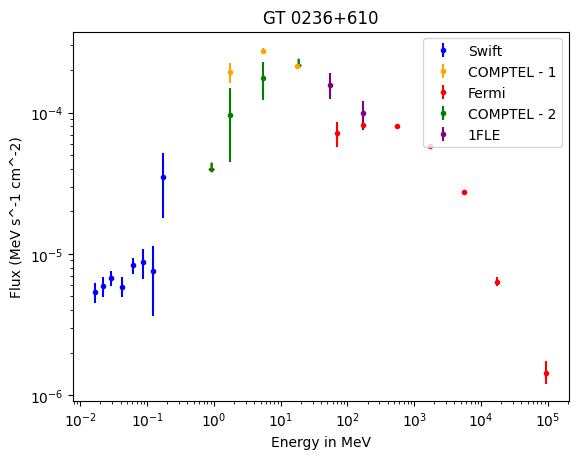

In [305]:
plt.errorbar(Bat_Energy_BandMeV, Obj_GT0236_spectra_swift, Obj_GT0236_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(COMPTEL_GT0236_EnergyBand1, COMPTEL_GT0236_EnergyFlux1, yerr = COMPTEL_GT0236_EnergyFlux_err1, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL - 1')
plt.scatter(COMPTEL_GT0236_EnergyBand_UL1, COMPTEL_GT0236_EnergyFlux_UL1, marker = r'$\downarrow$', color = 'orange')
plt.scatter(COMPTEL_GT0236_EnergyBand_UL2, COMPTEL_GT0236_EnergyFlux_UL2, marker = r'$\downarrow$', color = 'green')
plt.errorbar(Fermi_Energy_BandMeV, Obj_GT0236_spectra_fermi, Obj_GT0236_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.errorbar(COMPTEL_GT0236_EnergyBand2, COMPTEL_GT0236_EnergyFlux2, yerr = COMPTEL_GT0236_EnergyFlux_err2, fmt = 'o', markersize = 3, color = 'green', label = 'COMPTEL - 2')
plt.errorbar(EBuckets, EF_FLE, yerr = EF_FLEe, fmt = 'o', markersize = 3, color = 'purple', label = '1FLE')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('GT 0236+610')

# GRO J 1823-12

In [306]:
Obj_GROJ1823_COMPTEL_PhotonFlux_075_1MEV2 = 4.1 * (1e-5)
Obj_GROJ1823_COMPTEL_PhotonFlux_1_3MEV2 = 9.9* (1e-5)
Obj_GROJ1823_COMPTEL_PhotonFlux_3_10MEV2 = 3.5  * (1e-5)
Obj_GROJ1823_COMPTEL_PhotonFlux_10_30MEV2 = 1.0 * (1e-5)

Obj_GROJ1823_COMPTEL_EnergyFlux_075_1MEV2 = math.sqrt(0.75) * Obj_GROJ1823_COMPTEL_PhotonFlux_075_1MEV2
Obj_GROJ1823_COMPTEL_EnergyFlux_1_3MEV2 = math.sqrt(3) * Obj_GROJ1823_COMPTEL_PhotonFlux_1_3MEV2
Obj_GROJ1823_COMPTEL_EnergyFlux_3_10MEV2 = math.sqrt(30) * Obj_GROJ1823_COMPTEL_PhotonFlux_3_10MEV2
Obj_GROJ1823_COMPTEL_EnergyFlux_10_30MEV2 = math.sqrt(300) * Obj_GROJ1823_COMPTEL_PhotonFlux_10_30MEV2

Obj_GROJ1823_COMPTEL_PhotonFlux_075_1MEV_err2 = 1.7 * (1e-5)
Obj_GROJ1823_COMPTEL_PhotonFlux_1_3MEV_err2 = 1.5 * (1e-5)
Obj_GROJ1823_COMPTEL_PhotonFlux_3_10MEV_err2 = 0.6 * (1e-5)
Obj_GROJ1823_COMPTEL_PhotonFlux_10_30MEV_err2 = 0.2 * (1e-5)

Obj_GROJ1823_COMPTEL_EnergyFlux_075_1MEV_err2 = math.sqrt(0.75) * Obj_GROJ1823_COMPTEL_PhotonFlux_075_1MEV_err2
Obj_GROJ1823_COMPTEL_EnergyFlux_1_3MEV_err2 = math.sqrt(3) * Obj_GROJ1823_COMPTEL_PhotonFlux_1_3MEV_err2
Obj_GROJ1823_COMPTEL_EnergyFlux_3_10MEV_err2 = math.sqrt(30) * Obj_GROJ1823_COMPTEL_PhotonFlux_3_10MEV_err2
Obj_GROJ1823_COMPTEL_EnergyFlux_10_30MEV_err2 = math.sqrt(300) * Obj_GROJ1823_COMPTEL_PhotonFlux_10_30MEV_err2

COMPTEL_GROJ1823_EnergyBand2 = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30), math.sqrt(300)]

COMPTEL_GROJ1823_EnergyFlux_err2 = [Obj_GROJ1823_COMPTEL_EnergyFlux_075_1MEV_err2, Obj_GROJ1823_COMPTEL_EnergyFlux_1_3MEV_err2, Obj_GROJ1823_COMPTEL_PhotonFlux_3_10MEV_err2, Obj_GROJ1823_COMPTEL_EnergyFlux_10_30MEV_err2]
COMPTEL_GROJ1823_EnergyFlux2 = [Obj_GROJ1823_COMPTEL_EnergyFlux_075_1MEV2, Obj_GROJ1823_COMPTEL_EnergyFlux_1_3MEV2, Obj_GROJ1823_COMPTEL_EnergyFlux_3_10MEV2, Obj_GROJ1823_COMPTEL_EnergyFlux_10_30MEV2]

In [307]:
fermi_obj_name = table['ASSOC1']
objname_fermi = 'LS 5039                     ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J1826.2-1450,276.5637,-14.8496,16.8810,-1.2906,0.0070,0.0069,77.510,0.0114,0.0112,77.510,112,,55.842,1031.04,2.0317e-08,4.8421e-10,2.7040e-10,9.3344e-12,LogParabola,2.6699e-11,5.9184e-13,2.6028,0.0151,3.2079e-11,8.0003e-13,2.5812,0.0232,0.1240,0.0148,8.692,3.2179e-11,9.4670e-13,2.1585,0.0745,0.00512,0.00083,0.6667,--,8.024,11694.29,6.449627e-07 .. 5.7676072e-11,-- .. 1.6488389e-11,1.0366549e-10 .. 1.876363e-12,0.6274928 .. 7.121968,6.8769,0.0000,10.0000,--,--,--,--,--,5.8368676e-07 .. 5.846073e-07,-2.7917372e-08 .. 2.895337e-08,23.919039 .. 22.993168,38.5006,0.0000,10.0000,--,--,--,--,--,6.3110406e-07 .. 5.8590473e-07,-5.6376614e-08 .. 5.0135117e-08,12.55682 .. 13.228664,3FGL J1826.2-1450,3FHL J1826.2-1451,J1826-1438,,,P,LS 5039,HMB,,LS 5039,,1.0000,0.0000,276.5627,-14.8484,0.00045,512


In [308]:
Obj_GROJ1823_spectra_fermi = []

for gal in table[wg3]:
    Obj_GROJ1823_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_GROJ1823_spectra_fermi = [i * (624151) for i in Obj_GROJ1823_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_GROJ1823_spectra_fermi)

Obj_GROJ1823_spectra_fermi_yerrmin = [0.0, 1.1855075427749911e-05, 2.191046109044406e-06, 8.307006227950813e-07, 4.92802422913191e-07, 3.3480356005382127e-07, 2.891140851612874e-07]
Obj_GROJ1823_spectra_fermi_yerrmax = [4.430812348205776e-05, 9.498425492089624e-06, 2.1910461161889043e-06, 8.30700644513494e-07, 4.928024219434473e-07, 3.707010659318951e-07, 3.348028007434719e-07]
Obj_GROJ1823_spectra_fermi_yerr = [Obj_GROJ1823_spectra_fermi_yerrmin, Obj_GROJ1823_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[6.470292103191722e-05, 7.021367149600416e-05, 4.33040738692797e-05, 2.6074248080553558e-05, 9.478988334039873e-06, 1.7845264333495037e-06, 1.1711338411084498e-06]


In [309]:
obj_name = table1['COUNTERPART_NAME']
name = 'RX J1826.2-1450'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
977,SWIFT J1826.2-1452,276.562,-14.848,9.42,RX J1826.2-1450,0.0,276.5630,-14.8480,32.69,29.62,34.97,0.0,1.62,1.37,1.87,0.50,0.0,0.0,0.0,180,HMXB,3.0 .. 22.5,0.00132584199 .. 0.0189896058,0.00535810459 .. 0.0136435134


In [310]:
Obj_GROJ1823_spectra_swift = [] 
Obj_GROJ1823_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_GROJ1823_spectra_swift.extend(gal['Flux'])
    Obj_GROJ1823_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_GROJ1823_spectra_swift = [i * (1e-3) for i in Obj_GROJ1823_spectra_swift]
Obj_GROJ1823_spectra_swift_err = [i * (1e-3) for i in Obj_GROJ1823_spectra_swift_err]

print(Obj_GROJ1823_spectra_swift)
print(Obj_GROJ1823_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[5.35810459e-06, 5.04219113e-06, 6.33448502e-06, 6.173023950000001e-06, 7.0662763900000005e-06, 1.19059905e-05, 9.190825749999999e-06, 1.36435134e-05]
[1.3258419900000001e-06, 1.22760027e-06, 9.699070940000001e-07, 1.06516259e-06, 1.22873369e-06, 2.2417292900000002e-06, 4.25200257e-06, 1.8989605800000002e-05]


Text(0.5, 1.0, 'Spectra of Object GRO J 1823-12')

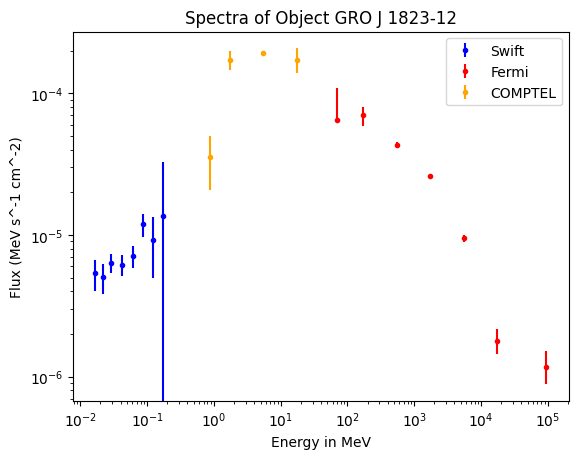

In [311]:
plt.errorbar(Bat_Energy_BandMeV, Obj_GROJ1823_spectra_swift, Obj_GROJ1823_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(Fermi_Energy_BandMeV, Obj_GROJ1823_spectra_fermi, Obj_GROJ1823_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.errorbar(COMPTEL_GROJ1823_EnergyBand2, COMPTEL_GROJ1823_EnergyFlux2, yerr = COMPTEL_GROJ1823_EnergyFlux_err2, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of Object GRO J 1823-12')

# Vela Pulsar

In [312]:
Obj_Vela_COMPTEL_PhotonFlux_075_1MEV2 = 3.6 * (1e-5)
Obj_Vela_COMPTEL_PhotonFlux_1_3MEV2 = 2.8* (1e-5)
Obj_Vela_COMPTEL_PhotonFlux_3_10MEV2 = 2.9  * (1e-5)
Obj_Vela_COMPTEL_PhotonFlux_10_30MEV2 = 2.3 * (1e-5)

Obj_Vela_COMPTEL_EnergyFlux_075_1MEV2 = math.sqrt(0.75) * Obj_Vela_COMPTEL_PhotonFlux_075_1MEV2
Obj_Vela_COMPTEL_EnergyFlux_1_3MEV2 = math.sqrt(3) * Obj_Vela_COMPTEL_PhotonFlux_1_3MEV2
Obj_Vela_COMPTEL_EnergyFlux_3_10MEV2 = math.sqrt(30) * Obj_Vela_COMPTEL_PhotonFlux_3_10MEV2
Obj_Vela_COMPTEL_EnergyFlux_10_30MEV2 = math.sqrt(300) * Obj_Vela_COMPTEL_PhotonFlux_10_30MEV2

Obj_Vela_COMPTEL_PhotonFlux_075_1MEV_err2 = 1.9 * (1e-5)
Obj_Vela_COMPTEL_PhotonFlux_1_3MEV_err2 = 2.2 * (1e-5)
Obj_Vela_COMPTEL_PhotonFlux_3_10MEV_err2 = 1.0 * (1e-5)
Obj_Vela_COMPTEL_PhotonFlux_10_30MEV_err2 = 0.4 * (1e-5)

Obj_Vela_COMPTEL_EnergyFlux_075_1MEV_err2 = math.sqrt(0.75) * Obj_Vela_COMPTEL_PhotonFlux_075_1MEV_err2
Obj_Vela_COMPTEL_EnergyFlux_1_3MEV_err2 = math.sqrt(3) * Obj_Vela_COMPTEL_PhotonFlux_1_3MEV_err2
Obj_Vela_COMPTEL_EnergyFlux_3_10MEV_err2 = math.sqrt(30) * Obj_Vela_COMPTEL_PhotonFlux_3_10MEV_err2
Obj_Vela_COMPTEL_EnergyFlux_10_30MEV_err2 = math.sqrt(300) * Obj_Vela_COMPTEL_PhotonFlux_10_30MEV_err2

COMPTEL_Vela_EnergyBand2 = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30), math.sqrt(300)]

COMPTEL_Vela_EnergyFlux_err2 = [Obj_Vela_COMPTEL_EnergyFlux_075_1MEV_err2, Obj_Vela_COMPTEL_EnergyFlux_1_3MEV_err2, Obj_Vela_COMPTEL_PhotonFlux_3_10MEV_err2, Obj_Vela_COMPTEL_EnergyFlux_10_30MEV_err2]
COMPTEL_Vela_EnergyFlux2 = [Obj_Vela_COMPTEL_EnergyFlux_075_1MEV2, Obj_Vela_COMPTEL_EnergyFlux_1_3MEV2, Obj_Vela_COMPTEL_EnergyFlux_3_10MEV2, Obj_Vela_COMPTEL_EnergyFlux_10_30MEV2]

In [313]:
fermi_obj_name = table['ASSOC1']
objname_fermi = 'PSR J0835-4510              ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J0835.3-4510,128.8370,-45.1781,263.5537,-2.7877,0.0043,0.0043,8.160,0.0069,0.0069,8.160,123,,496.139,1746.46,1.3507e-06,4.3147e-09,9.3780e-09,3.2849e-11,PLSuperExpCutoff,3.2263e-10,2.0626e-12,2.2226,0.0016,5.4941e-10,2.0472e-12,2.2909,0.0013,0.3160,0.0002,196.328,5.5107e-10,1.9071e-12,1.2127,0.0185,0.02303,0.00271,0.5748,0.0105,199.277,205311.17,5.8643336e-06 .. 1.9628878e-10,-2.0002429e-07 .. 2.6714306e-11,9.635427e-10 .. 5.455999e-12,7.617217 .. 18.688257,4.2532,0.0000,10.0000,--,--,--,--,--,1.07203105e-05 .. 1.0580934e-05,-6.814974e-08 .. 6.6032e-08,227.67336 .. 234.95935,57.8061,0.0039,0.0035,--,--,--,--,--,1.0484841e-05 .. 1.0434223e-05,-1.11939435e-07 .. 1.1084343e-07,129.76855 .. 138.9433,3FGL J0835.3-4510,3FHL J0835.3-4510,J0835-4514,,,P,Vela Pulsar,PSR,,PSR J0835-4510,Vela X field,1.0000,0.0000,128.8359,-45.1763,0.00001,512


In [314]:
Obj_Vela_spectra_fermi = []

for gal in table[wg3]:
    Obj_Vela_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_Vela_spectra_fermi = [i * (624151) for i in Obj_Vela_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_Vela_spectra_fermi)

Obj_Vela_spectra_fermi_yerrmin = [2.0512786902650987e-05, 5.3103160320845666e-05, 1.2783361504425939e-05, 7.458000839163058e-06, 4.88935582493126e-06, 2.2711783771449563e-06, 4.22698434453749e-07]
Obj_Vela_spectra_fermi_yerrmax = [2.0512786902650987e-05, 5.3103160320845666e-05, 1.2783361504425939e-05, 7.458000839163058e-06, 4.88935582493126e-06, 2.2711783771449563e-06, 4.6346011706041796e-07]
Obj_Vela_spectra_fermi_yerr = [Obj_Vela_spectra_fermi_yerrmin, Obj_Vela_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[0.0006013961335561424, 0.0009538219521844082, 0.0015160618788783164, 0.001630245238633865, 0.0008715296677453965, 0.00013688182000046178, 3.4053671905897274e-06]


In [315]:
obj_name = table1['COUNTERPART_NAME']
name = 'Vela Pulsar'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
421,SWIFT J0835.2-4513,128.841,-45.183,97.77,Vela Pulsar,0.0,128.8361,-45.1764,175.49,173.16,178.06,0.0,1.97,1.94,2.01,1.30,0.0,0.0,0.0,150,Pulsar,3.0 .. 22.5,0.000877483631 .. 0.0163842831,0.04037432 .. 0.0734262913


In [316]:
Obj_Vela_spectra_swift = [] 
Obj_Vela_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_Vela_spectra_swift.extend(gal['Flux'])
    Obj_Vela_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_Vela_spectra_swift = [i * (1e-3) for i in Obj_Vela_spectra_swift]
Obj_Vela_spectra_swift_err = [i * (1e-3) for i in Obj_Vela_spectra_swift_err]

print(Obj_Vela_spectra_swift)
print(Obj_Vela_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[4.037432e-05, 4.0251083700000006e-05, 4.16269191e-05, 4.09739763e-05, 4.1399013300000005e-05, 3.99797931e-05, 4.8701819e-05, 7.34262913e-05]
[8.77483631e-07, 1.0139787299999999e-06, 8.72064556e-07, 9.27617599e-07, 1.19389477e-06, 2.1664020600000004e-06, 3.9856704e-06, 1.63842831e-05]


In [317]:
FLE_obj_name = bright_FLE['AssocCOMP']
obj_name_COMP = 'PSR_B833-45(Vela)      '

wg9 = (obj_name_COMP == FLE_obj_name)
print(wg9)

bright_FLE[wg9]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

Name,RAdeg,DEdeg,GLON,GLAT,ePos,Signi,EF30-100,e_EF30-100,EF100-300,e_EF100-300,F30-100,e_F30-100,F100-300,e_F100-300,Class1,z,Assoc1,Assoc3FGL,AssocCOMP
,deg,deg,deg,deg,deg,,mW / m2,mW / m2,mW / m2,mW / m2,1/cm2/s,1/cm2/s,1/cm2/s,1/cm2/s,,,,,
bytes15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,bytes18,bytes18,bytes23
1FLE J0835-4507,128.936661,-45.120628,263.549805,-2.697017,0.239915,230.490,1.095390e-09,1.095390e-10,1.717630e-09,4.207770e-10,1.314790e-05,1.314790e-06,4.168830e-06,1.601390e-06,psr,0.000000,3FGL J0835.3-4510,3FGL J0835.3-4510,PSR_B833-45(Vela)


In [318]:
EFBucket30_100 = []
EFBucket30_100e = []
EFBucket100_300 = []
EFBucket100_300e = []

for gal in bright_FLE[wg9]:
    EFBucket30_100.append(gal['EF30-100'])
    EFBucket30_100e.append(gal['e_EF30-100'])
    EFBucket100_300.append(gal['EF100-300'])
    EFBucket100_300e.append(gal['e_EF100-300'])

print(EFBucket30_100)
print(EFBucket30_100e)
print(EFBucket100_300)
print(EFBucket100_300e)

EF_FLE = EFBucket30_100 + EFBucket100_300
EF_FLEe = EFBucket30_100e + EFBucket100_300e

EF_FLE = [624151 * x for x in EF_FLE]
EF_FLEe = [624151 * x for x in EF_FLEe]


print(EF_FLE)
print(EF_FLEe)

EBucket30_100 = math.sqrt(30*100)
EBucket100_300 = math.sqrt(100*300)

EBuckets = [EBucket30_100, EBucket100_300]
print(EBuckets)

[1.09539e-09]
[1.09539e-10]
[1.71763e-09]
[4.20777e-10]
[0.0006836887638900001, 0.00107206048213]
[6.836887638899999e-05, 0.000262628385327]
[54.772255750516614, 173.20508075688772]


Text(0.5, 1.0, 'Vela Pulsar')

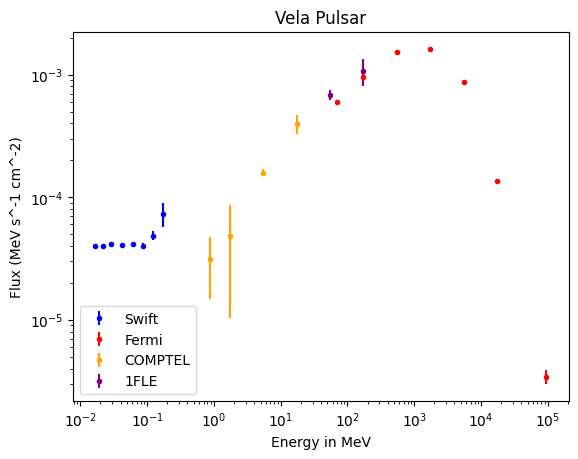

In [319]:
plt.errorbar(Bat_Energy_BandMeV, Obj_Vela_spectra_swift, Obj_Vela_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(Fermi_Energy_BandMeV, Obj_Vela_spectra_fermi, Obj_Vela_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.errorbar(COMPTEL_Vela_EnergyBand2, COMPTEL_Vela_EnergyFlux2, yerr = COMPTEL_Vela_EnergyFlux_err2, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL')
plt.errorbar(EBuckets, EF_FLE, yerr = EF_FLEe, fmt = 'o', markersize = 3, color = 'purple', label = '1FLE')
plt.legend(loc='lower left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Vela Pulsar')

# PSR B1509-58

In [320]:
Obj_PSRB1509_COMPTEL_PhotonFlux_075_3MEV2 = 8.3 * (1e-5)
Obj_PSRB1509_COMPTEL_PhotonFlux_3_10MEV2 =  3.2 * (1e-5)
Obj_PSRB1509_COMPTEL_PhotonFlux_10_30MEV2 = 1.1 * (1e-5)

Obj_PSRB1509_COMPTEL_EnergyFlux_075_3MEV2 = math.sqrt(0.75 * 3) * Obj_PSRB1509_COMPTEL_PhotonFlux_075_3MEV2
Obj_PSRB1509_COMPTEL_EnergyFlux_3_10MEV2 = math.sqrt(30) * Obj_PSRB1509_COMPTEL_PhotonFlux_3_10MEV2
Obj_PSRB1509_COMPTEL_EnergyFlux_10_30MEV2 = math.sqrt(300) * Obj_PSRB1509_COMPTEL_PhotonFlux_10_30MEV2

Obj_PSRB1509_COMPTEL_PhotonFlux_075_3MEV_err2 = 1.7 * (1e-5)
Obj_PSRB1509_COMPTEL_PhotonFlux_3_10MEV_err2 = 0.6 * (1e-5)
Obj_PSRB1509_COMPTEL_PhotonFlux_10_30MEV_err2 = 0.2 * (1e-5)

Obj_PSRB1509_COMPTEL_EnergyFlux_075_3MEV_err2 = math.sqrt(0.75 * 3) * Obj_PSRB1509_COMPTEL_PhotonFlux_075_3MEV_err2
Obj_PSRB1509_COMPTEL_EnergyFlux_3_10MEV_err2 = math.sqrt(30) * Obj_PSRB1509_COMPTEL_PhotonFlux_3_10MEV_err2
Obj_PSRB1509_COMPTEL_EnergyFlux_10_30MEV_err2 = math.sqrt(300) * Obj_PSRB1509_COMPTEL_PhotonFlux_10_30MEV_err2

COMPTEL_PSRB1509_EnergyBand2 = [math.sqrt(0.75 * 3), math.sqrt(30), math.sqrt(300)]

COMPTEL_PSRB1509_EnergyFlux_err2 = [Obj_PSRB1509_COMPTEL_EnergyFlux_075_3MEV_err2, Obj_PSRB1509_COMPTEL_PhotonFlux_3_10MEV_err2, Obj_PSRB1509_COMPTEL_EnergyFlux_10_30MEV_err2]
COMPTEL_PSRB1509_EnergyFlux2 = [Obj_PSRB1509_COMPTEL_EnergyFlux_075_3MEV2, Obj_PSRB1509_COMPTEL_EnergyFlux_3_10MEV2, Obj_PSRB1509_COMPTEL_EnergyFlux_10_30MEV2]

In [321]:
fermi_obj_name = table['ASSOC1']
objname_fermi = 'MSH 15-52                   ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J1514.2-5909e,228.5710,-59.1630,320.3458,-1.2089,--,--,--,--,--,--,43,MSH 15-52,20.008,11390.72,3.6985e-09,2.9607e-10,4.5624e-11,3.0544e-12,PowerLaw,3.7912e-14,2.4327e-15,1.8027,0.0367,3.7619e-14,2.8693e-15,1.8045,0.0374,-0.0029,0.0184,0.142,3.8381e-14,2.6660e-15,1.7815,0.0557,0.00003,0.00007,0.6667,--,0.376,1841.45,1.2702726e-07 .. 2.2115199e-10,-- .. 2.6055056e-11,2.0510137e-11 .. 1.2818143e-11,0.29870954 .. 16.013363,7.6135,0.0198,0.2246,--,--,--,--,--,3.2267767e-08 .. 2.6995576e-08,-3.900741e-09 .. 3.4417522e-09,11.918167 .. 11.48379,36.0756,0.0000,10.0000,--,--,--,--,--,2.3935286e-08 .. 3.365352e-08,-8.260547e-09 .. 8.783779e-09,3.8153844 .. 6.122599,3FGL J1514.0-5915e,3FHL J1514.2-5909e,J1517-5909,,,E,MSH 15-52,PWN,,MSH 15-52,,--,--,228.6300,-59.1300,0.29000,516


In [322]:
Obj_PSRB1509_spectra_fermi = []

for gal in table[wg3]:
    Obj_PSRB1509_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_PSRB1509_spectra_fermi = [i * (624151) for i in Obj_PSRB1509_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_PSRB1509_spectra_fermi)

Obj_PSRB1509_spectra_fermi_yerrmin = [0.0, 6.6630671986749646e-06, 7.785710649993986e-07, 3.6122834504585084e-07, 3.726522248075781e-07, 6.041838998591295e-07, 8.82733174838917e-07]
Obj_PSRB1509_spectra_fermi_yerrmax = [2.7911548909940326e-05, 6.571977391975868e-06, 7.978123332002445e-07, 3.680601536030126e-07, 3.7265221196732456e-07, 6.041839110893432e-07, 9.425750800505072e-07]
Obj_PSRB1509_spectra_fermi_yerr = [Obj_PSRB1509_spectra_fermi_yerrmin, Obj_PSRB1509_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[1.2801422513418134e-05, 7.015541848924209e-06, 5.230348995633773e-06, 3.5376477593119723e-06, 5.143855699498226e-06, 6.6607038174829394e-06, 8.00045692651765e-06]


In [323]:
obj_name = table1['COUNTERPART_NAME']
name = 'PSR B1509-58'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
764,SWIFT J1513.8-5910,228.486,-59.146,116.22,PSR B1509-58,0.0,228.4813,-59.1358,259.74,257.15,262.03,0.0,1.85,1.83,1.88,2.40,0.0,0.0,0.0,150,Pulsar,3.0 .. 22.5,0.00108931772 .. 0.0177625827,0.0536652431 .. 0.0964921266


In [324]:
Obj_PSRB1509_spectra_swift = [] 
Obj_PSRB1509_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_PSRB1509_spectra_swift.extend(gal['Flux'])
    Obj_PSRB1509_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_PSRB1509_spectra_swift = [i * (1e-3) for i in Obj_PSRB1509_spectra_swift]
Obj_PSRB1509_spectra_swift_err = [i * (1e-3) for i in Obj_PSRB1509_spectra_swift_err]

print(Obj_PSRB1509_spectra_swift)
print(Obj_PSRB1509_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[5.3665243100000005e-05, 5.37901483e-05, 5.44944257e-05, 5.83626665e-05, 6.20712265e-05, 6.6315949e-05, 7.87387192e-05, 9.649212660000001e-05]
[1.08931772e-06, 1.13897549e-06, 9.484717740000001e-07, 1.02405145e-06, 1.22041232e-06, 2.14368594e-06, 3.98345385e-06, 1.77625827e-05]


Text(0.5, 1.0, 'PSR B1509-58')

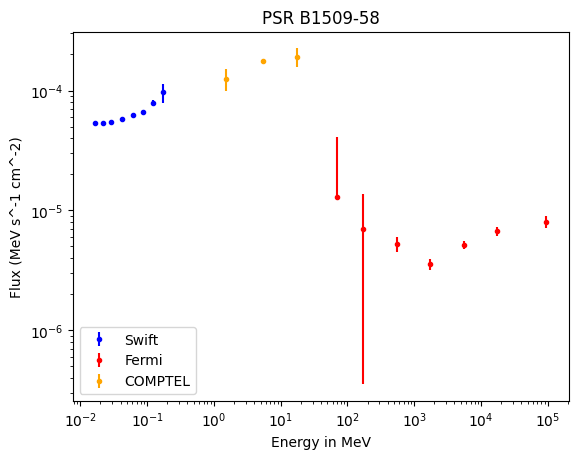

In [325]:
plt.errorbar(Bat_Energy_BandMeV, Obj_PSRB1509_spectra_swift, Obj_PSRB1509_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(Fermi_Energy_BandMeV, Obj_PSRB1509_spectra_fermi, Obj_PSRB1509_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.errorbar(COMPTEL_PSRB1509_EnergyBand2, COMPTEL_PSRB1509_EnergyFlux2, yerr = COMPTEL_PSRB1509_EnergyFlux_err2, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL')
plt.legend(loc='lower left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('PSR B1509-58')

# PSR B1951+32

In [326]:
Obj_PSRB1951_COMPTEL_PhotonFlux_075_1MEV2 = 19 * (1e-5)
Obj_PSRB1951_COMPTEL_PhotonFlux_1_3MEV2 = 21.1 * (1e-5)
Obj_PSRB1951_COMPTEL_PhotonFlux_3_10MEV2 = 7.6 * (1e-5)
Obj_PSRB1951_COMPTEL_PhotonFlux_10_30MEV2 = 2.0 * (1e-5)

Obj_PSRB1951_COMPTEL_EnergyFlux_075_1MEV2 = math.sqrt(0.75) * Obj_PSRB1951_COMPTEL_PhotonFlux_075_1MEV2
Obj_PSRB1951_COMPTEL_EnergyFlux_1_3MEV2 = math.sqrt(3) * Obj_PSRB1951_COMPTEL_PhotonFlux_1_3MEV2
Obj_PSRB1951_COMPTEL_EnergyFlux_3_10MEV2 = math.sqrt(30) * Obj_PSRB1951_COMPTEL_PhotonFlux_3_10MEV2
Obj_PSRB1951_COMPTEL_EnergyFlux_10_30MEV2 = math.sqrt(300) * Obj_PSRB1951_COMPTEL_PhotonFlux_10_30MEV2

COMPTEL_PSRB1951_EnergyBand_UL2 = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30), math.sqrt(300)]
COMPTEL_PSRB1951_EnergyFlux_UL2 = [Obj_PSRB1951_COMPTEL_EnergyFlux_075_1MEV2, Obj_PSRB1951_COMPTEL_EnergyFlux_1_3MEV2, Obj_PSRB1951_COMPTEL_EnergyFlux_3_10MEV2, Obj_PSRB1951_COMPTEL_EnergyFlux_10_30MEV2]

In [327]:
fermi_obj_name = table['ASSOC1']
objname_fermi = 'PSR J1952+3252              ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J1952.9+3252,298.2473,32.8830,68.7715,2.8226,0.0062,0.0062,40.910,0.0101,0.0100,40.910,113,,106.858,1162.51,2.0197e-08,3.2235e-10,1.5079e-10,2.9361e-12,PLSuperExpCutoff,1.5366e-11,2.2493e-13,2.2767,0.0105,2.0674e-11,3.4173e-13,2.1602,0.0186,0.2749,0.0127,25.994,1.9856e-11,3.3814e-13,1.4590,0.0435,0.00820,0.00043,0.6667,--,26.295,12576.79,1.2212033e-07 .. 6.080456e-12,-- .. 5.6759072e-12,1.9915838e-11 .. 1.6901099e-13,0.92455417 .. 2.7879798,3.2786,0.0000,10.0000,--,--,--,--,--,1.9442558e-07 .. 1.9841978e-07,-6.5742127e-09 .. 6.895448e-09,43.742016 .. 42.26172,38.5870,0.0000,10.0000,--,--,--,--,--,1.751495e-07 .. 1.909336e-07,-1.4334162e-08 .. 1.5263668e-08,17.870283 .. 18.715467,3FGL J1952.9+3253,3FHL J1952.8+3253,J1953+3258,,,N,,PSR,,PSR J1952+3252,,1.0000,0.9972,298.2425,32.8779,0.00002,0


In [328]:
Obj_PSRB1951_spectra_fermi = []

for gal in table[wg3]:
    Obj_PSRB1951_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_PSRB1951_spectra_fermi = [i * (624151) for i in Obj_PSRB1951_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_PSRB1951_spectra_fermi)

Obj_PSRB1951_spectra_fermi_yerrmin = [0.0, 2.198296256953707e-06, 6.796443997881638e-07, 5.052718275066069e-07, 4.284986391140661e-07, 2.5912810524346456e-07, 6.540815399811527e-08]
Obj_PSRB1951_spectra_fermi_yerrmax = [5.128303374507884e-06, 2.2057909957349728e-06, 6.796443977295785e-07, 5.052718103305191e-07, 4.2849864964334934e-07, 2.8279401281005906e-07, 9.846995806090894e-08]
Obj_PSRB1951_spectra_fermi_yerr = [Obj_PSRB1951_spectra_fermi_yerrmin, Obj_PSRB1951_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[1.24304902509257e-05, 1.5497954651180756e-05, 2.5050442987284427e-05, 2.410706736418952e-05, 1.2306289279610805e-05, 1.8329746487588412e-06, 1.054883791579695e-07]


In [329]:
obj_name = table1['COUNTERPART_NAME']
name = 'SNR G068.8+02.6'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
1052,SWIFT J1953.0+3256,298.262,32.893,5.65,SNR G068.8+02.6,0.0,298.2310,32.9296,9.21,7.26,10.99,0.0,2.27,1.69,3.07,1.00,0.0,0.0,0.0,160,SNR,3.0 .. 22.5,0.00102515134 .. 0.0168655608,0.00373999402 .. -0.00390872872


In [330]:
Obj_PSRB1951_spectra_swift = [] 
Obj_PSRB1951_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_PSRB1951_spectra_swift.extend(gal['Flux'])
    Obj_PSRB1951_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_PSRB1951_spectra_swift = [i * (1e-3) for i in Obj_PSRB1951_spectra_swift]
Obj_PSRB1951_spectra_swift_err = [i * (1e-3) for i in Obj_PSRB1951_spectra_swift_err]

print(Obj_PSRB1951_spectra_swift)
print(Obj_PSRB1951_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[3.73999402e-06, 1.46276457e-06, 1.85301551e-06, 4.0152687600000005e-06, 1.5645074899999999e-06, 1.6912147400000001e-06, -1.01909239e-06, -3.90872872e-06]
[1.02515134e-06, 1.06792955e-06, 9.15680139e-07, 1.02481013e-06, 1.24524813e-06, 2.16025766e-06, 3.90131888e-06, 1.68655608e-05]


Text(0.5, 1.0, 'PSR B1951+32')

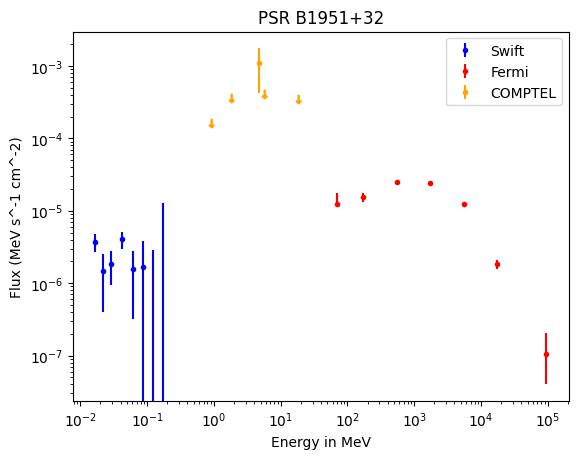

In [331]:
plt.errorbar(Bat_Energy_BandMeV, Obj_PSRB1951_spectra_swift, Obj_PSRB1951_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(Fermi_Energy_BandMeV, Obj_PSRB1951_spectra_fermi, Obj_PSRB1951_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.scatter(COMPTEL_PSRB1951_EnergyBand_UL2, COMPTEL_PSRB1951_EnergyFlux_UL2, marker = r'$\downarrow$', color = 'orange')
plt.errorbar(math.sqrt(0.75*30), 2.3*10e-5*math.sqrt(0.75*30), yerr = 1.4*10e-5*math.sqrt(0.75*30), fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('PSR B1951+32')

# Cas A

In [332]:
fermi_obj_name = table['ASSOC1']
objname_fermi = 'Cas A                       ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J2323.4+5849,350.8613,58.8173,111.7410,-2.1294,0.0061,0.0060,-68.070,0.0099,0.0098,-68.070,1304,,65.887,2261.80,6.6573e-09,1.8101e-10,6.1065e-11,2.1186e-12,LogParabola,1.2398e-12,3.3122e-14,1.9739,0.0188,1.3731e-12,4.1457e-14,1.8639,0.0292,0.0824,0.0129,5.587,1.2834e-12,3.6151e-14,1.8479,0.0361,0.00046,0.00012,0.6667,--,3.774,4136.97,1.2497825e-13 .. 1.4649645e-10,-- .. 1.9798555e-11,2.0594508e-17 .. 6.522142e-12,0.0 .. 19.62613,4.2663,0.0000,10.0000,--,--,--,--,--,3.0499088e-08 .. 3.645816e-08,-2.6185534e-09 .. 2.4257125e-09,19.193396 .. 25.87027,42.7376,0.0000,10.0000,--,--,--,--,--,3.0778036e-08 .. 3.7704886e-08,-6.0612275e-09 .. 5.9926717e-09,7.5618763 .. 11.684849,3FGL J2323.4+5849,3FHL J2323.4+5848,,,,P,Cassiopeia A,snr,,Cas A,,0.8000,0.9999,350.8583,58.8000,0.00045,0


In [333]:
Obj_CasA_spectra_fermi = []

for gal in table[wg3]:
    Obj_CasA_spectra_fermi.extend(gal['nuFnu_Band'])

Obj_CasA_spectra_fermi = [i * (624151) for i in Obj_CasA_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_CasA_spectra_fermi)

Obj_CasA_spectra_fermi_yerrmin = [0.0, 1.134028450016005e-06, 3.613334477036763e-07, 2.8823921538733504e-07, 3.3086828263252864e-07, 4.90034376129862e-07, 5.096948276246407e-07]
Obj_CasA_spectra_fermi_yerrmax = [3.0971092603326346e-06, 1.1312033224868037e-06, 3.613334265712841e-07, 2.882392111825272e-07, 3.3086829747319343e-07, 4.900343904168554e-07, 5.501565941334798e-07]
Obj_CasA_spectra_fermi_yerr = [Obj_CasA_spectra_fermi_yerrmin, Obj_CasA_spectra_fermi_yerrmax]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[1.2854082523430253e-11, 1.174944236522141e-06, 4.439175079349201e-06, 7.0838155162115946e-06, 7.179028573507662e-06, 6.006303255533772e-06, 4.070801577093011e-06]


In [334]:
obj_name = table1['COUNTERPART_NAME']
name = 'Cas A'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
1193,SWIFT J2323.3+5849,350.846,58.817,57.11,Cas A,0.0,350.8500,58.8150,64.90,63.43,66.82,0.0,3.33,3.24,3.43,3.20,0.0,0.0,0.0,160,SNR,3.0 .. 22.5,0.000914489559 .. 0.0163744185,0.046121113 .. 0.0177854951


In [335]:
Obj_CasA_spectra_swift = [] 
Obj_CasA_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_CasA_spectra_swift.extend(gal['Flux'])
    Obj_CasA_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_CasA_spectra_swift = [i * (1e-3) for i in Obj_CasA_spectra_swift]
Obj_CasA_spectra_swift_err = [i * (1e-3) for i in Obj_CasA_spectra_swift_err]

print(Obj_CasA_spectra_swift)
print(Obj_CasA_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[4.6121113e-05, 2.89420877e-05, 2.08314564e-05, 1.31045161e-05, 1.1106742500000001e-05, 9.435698390000001e-06, 4.04164009e-06, 1.77854951e-05]
[9.14489559e-07, 9.56047617e-07, 8.402731040000001e-07, 9.54257383e-07, 1.16315403e-06, 2.1528343200000004e-06, 3.7618468e-06, 1.63744185e-05]


Text(0.5, 1.0, 'Cas A')

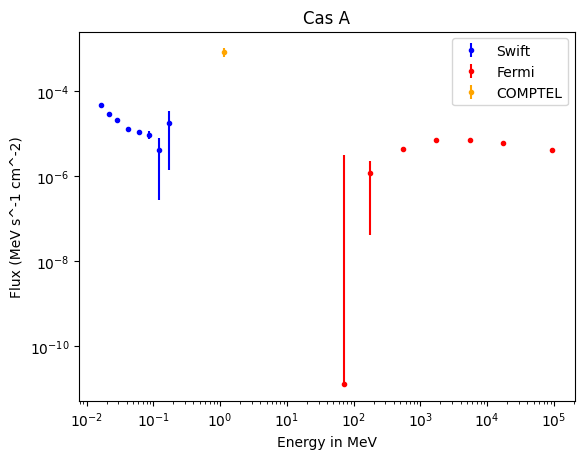

In [336]:
plt.errorbar(Bat_Energy_BandMeV, Obj_CasA_spectra_swift, Obj_CasA_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(Fermi_Energy_BandMeV, Obj_CasA_spectra_fermi, Obj_CasA_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')

plt.errorbar(1.157, 7.0*10e-5*1.157, yerr = 1.7*10e-5*1.157, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Cas A')

# 3C 273 (Redo)

In [337]:
fermi_obj_name = table['ASSOC1']
objname_fermi = '3C 273                      ' 

wg3 = (fermi_obj_name == objname_fermi)
print(wg3)

table[wg3]


[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J1229.0+0202,187.2675,2.0454,289.9305,64.3510,0.0090,0.0088,88.230,0.0146,0.0143,88.230,1208,,135.872,279.05,6.2881e-09,1.4483e-10,1.2873e-10,1.5582e-12,LogParabola,3.6662e-10,4.4482e-12,2.7049,0.0109,3.9371e-10,5.4815e-12,2.6083,0.0156,0.0917,0.0093,8.696,3.8336e-10,5.0600e-12,2.4512,0.0291,0.00511,0.00057,0.6667,--,8.878,15287.06,6.1187336e-07 .. 3.3676237e-12,-3.736698e-08 .. 4.8877387e-12,9.664999e-11 .. 1.10055973e-13,18.304876 .. 1.9060148,6361.0679,0.9583,0.2563,125.509,1.0176407e-06,1.35996805e-08,286670016.0,31560000.0,4.975151e-07 .. 2.9988996e-07,-8.881011e-09 .. 8.9901055e-09,86.491905 .. 48.23688,12153.2773,1.1640,0.1204,99.685,2.0882555e-06,3.5279548e-08,273520000.0,5260000.0,6.503525e-07 .. 1.6970517e-07,-2.0927224e-08 .. 1.7773973e-08,47.125755 .. 12.778085,3FGL J1229.1+0202,3FHL J1229.2+0201,J1228+0154,3EG J1229+0210,EGR J1229+0203,N,,FSRQ,,3C 273,,1.0000,0.9998,187.2779,2.0524,0.00000,0


In [338]:
Obj_3C273_spectra_fermi = []

for gal in table[wg3]:
    Obj_3C273_spectra_fermi.extend(gal['nuFnu_Band'])

#print(Obj_3C111_spectra_fermi)

Obj_3C273_spectra_fermi = [i * (624151) for i in Obj_3C273_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_3C273_spectra_fermi)

Obj_3C273_spectra_fermi_yerrmin = [3.683985674416204e-06, 8.442139870464601e-07, 3.4609076218712663e-07, 2.422386578232016e-07, 1.908510182080077e-07, 1.4144101766306e-07, 5.172677499143576e-08]
Obj_3C273_spectra_fermi_yerrmax = [3.683985674416204e-06, 8.442139870464601e-07, 3.4609076218712663e-07, 2.422386578232016e-07, 1.908510182080077e-07, 1.7405769924002767e-07, 9.969828917995142e-08]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[6.032418580202009e-05, 3.9444581008567237e-05, 1.9985055935031054e-05, 7.876183412333475e-06, 2.1914352220642457e-06, 4.573640122290906e-07, 6.869154585044396e-08]


In [339]:
obj_name = table1['COUNTERPART_NAME']
name = '3C 273'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
619,SWIFT J1229.1+0202,187.276,2.047,197.62,3C 273,0.0,187.2779,2.0524,421.57,418.49,424.66,0.0,1.75,1.73,1.77,0.70,0.1583,46.46,0.0,80,Beamed AGN,3.0 .. 22.5,0.000884711219 .. 0.0188428052,0.0735220909 .. 0.15560098


In [340]:
Obj_3C273_spectra_swift = [] 
Obj_3C273_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_3C273_spectra_swift.extend(gal['Flux'])
    Obj_3C273_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_3C273_spectra_swift = [i * (1e-3) for i in Obj_3C273_spectra_swift]
Obj_3C273_spectra_swift_err = [i * (1e-3) for i in Obj_3C273_spectra_swift_err]

print(Obj_3C273_spectra_swift)
print(Obj_3C273_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[7.35220909e-05, 7.88383186e-05, 8.4435761e-05, 9.35884714e-05, 0.000100185104, 0.00011159676300000001, 0.000122341111, 0.00015560098]
[8.84711219e-07, 1.05392095e-06, 8.95128236e-07, 1.02069112e-06, 1.2564923400000001e-06, 2.2350503100000004e-06, 4.18877369e-06, 1.88428052e-05]


In [341]:
Obj_3C273_COMPTEL_PhotonFlux_075_1MEV3 = 8.5 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_1_3MEV3 = 14.5 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_3_10MEV3 = 3.9  * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_10_30MEV3 = 0.6 * (1e-5)

Obj_3C273_COMPTEL_EnergyFlux_075_1MEV3 = math.sqrt(0.75) * Obj_3C273_COMPTEL_PhotonFlux_075_1MEV3
Obj_3C273_COMPTEL_EnergyFlux_1_3MEV3 = math.sqrt(3) * Obj_3C273_COMPTEL_PhotonFlux_1_3MEV3
Obj_3C273_COMPTEL_EnergyFlux_3_10MEV3 = math.sqrt(30) * Obj_3C273_COMPTEL_PhotonFlux_3_10MEV3
Obj_3C273_COMPTEL_EnergyFlux_10_30MEV3 = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV3

Obj_3C273_COMPTEL_PhotonFlux_075_1MEV_err3 = 0 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_1_3MEV_err3 = 2.2 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_3_10MEV_err3 = 0.9 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_10_30MEV_err3 = 0.3 * (1e-5)

Obj_3C273_COMPTEL_EnergyFlux_075_1MEV_err3 = math.sqrt(0.75) * Obj_3C273_COMPTEL_PhotonFlux_075_1MEV_err3
Obj_3C273_COMPTEL_EnergyFlux_1_3MEV_err3 = math.sqrt(3) * Obj_3C273_COMPTEL_PhotonFlux_1_3MEV_err3
Obj_3C273_COMPTEL_EnergyFlux_3_10MEV_err3 = math.sqrt(30) * Obj_3C273_COMPTEL_PhotonFlux_3_10MEV_err3
Obj_3C273_COMPTEL_EnergyFlux_10_30MEV_err3 = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV_err3

COMPTEL_3C273_EnergyBand_UL3 = [math.sqrt(0.75)]
COMPTEL_3C273_EnergyBand3 = [math.sqrt(3), math.sqrt(30), math.sqrt(300)]

COMPTEL_3C273_EnergyFlux_UL3 = [Obj_3C273_COMPTEL_EnergyFlux_075_1MEV3]
COMPTEL_3C273_EnergyFlux_err3 = [Obj_3C273_COMPTEL_PhotonFlux_1_3MEV_err3, Obj_3C273_COMPTEL_PhotonFlux_3_10MEV_err3, Obj_3C273_COMPTEL_PhotonFlux_10_30MEV_err3]
COMPTEL_3C273_EnergyFlux3 = [Obj_3C273_COMPTEL_EnergyFlux_1_3MEV3, Obj_3C273_COMPTEL_EnergyFlux_3_10MEV3, Obj_3C273_COMPTEL_EnergyFlux_10_30MEV3]

In [342]:
Obj_3C273_COMPTEL_PhotonFlux_075_1MEV1 = 13.8 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_1_3MEV1 = 10.7 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_3_10MEV1 = 5.6 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1 = 1.7 * (1e-5)

Obj_3C273_COMPTEL_EnergyFlux_075_1MEV1 = math.sqrt(0.75) * Obj_3C273_COMPTEL_PhotonFlux_075_1MEV1
Obj_3C273_COMPTEL_EnergyFlux_1_3MEV1 = math.sqrt(3) * Obj_3C273_COMPTEL_PhotonFlux_1_3MEV1
Obj_3C273_COMPTEL_EnergyFlux_3_10MEV1 = math.sqrt(30) * Obj_3C273_COMPTEL_PhotonFlux_3_10MEV1
Obj_3C273_COMPTEL_EnergyFlux_10_30MEV1 = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1

Obj_3C273_COMPTEL_PhotonFlux_075_1MEV1_err = 4.8 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_1_3MEV1_err = 3.7 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_3_10MEV1_err = 1.9 * (1e-5)
#Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1_err = 0 * (1e-5)

Obj_3C273_COMPTEL_EnergyFlux_075_1MEV1_err = math.sqrt(0.75) * Obj_3C273_COMPTEL_PhotonFlux_075_1MEV1_err
Obj_3C273_COMPTEL_EnergyFlux_1_3MEV1_err = math.sqrt(3) * Obj_3C273_COMPTEL_PhotonFlux_1_3MEV1_err
Obj_3C273_COMPTEL_EnergyFlux_3_10MEV1_err = math.sqrt(30) * Obj_3C273_COMPTEL_PhotonFlux_3_10MEV1_err
#Obj_3C273_COMPTEL_EnergyFlux_10_30MEV1_err = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1_err

COMPTEL_EnergyBand = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30)]
print(COMPTEL_EnergyBand)

Obj_3C273_COMPTEL_EnergyFlux1 = [Obj_3C273_COMPTEL_EnergyFlux_075_1MEV1, Obj_3C273_COMPTEL_EnergyFlux_1_3MEV1, Obj_3C273_COMPTEL_EnergyFlux_3_10MEV1]
print(Obj_3C273_COMPTEL_EnergyFlux1)

Obj_3C273_COMPTEL_EnergyFlux_err1 = [Obj_3C273_COMPTEL_EnergyFlux_075_1MEV1_err, Obj_3C273_COMPTEL_EnergyFlux_1_3MEV1_err, Obj_3C273_COMPTEL_EnergyFlux_3_10MEV1_err]
print(Obj_3C273_COMPTEL_EnergyFlux_err1)

[0.8660254037844386, 1.7320508075688772, 5.477225575051661]
[0.00011951150572225254, 0.00018532943640986986, 0.00030672463220289304]
[4.1569219381653056e-05, 6.408587988004847e-05, 0.00010406728592598157]


In [343]:
Obj_3C273_COMPTEL_PhotonFlux_075_1MEV2 = 27.6 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_1_3MEV2 = 6.1 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_3_10MEV2 = 1.1 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_10_30MEV2 = 0.08 * (1e-5)

Obj_3C273_COMPTEL_EnergyFlux_075_1MEV2 = math.sqrt(0.75) * Obj_3C273_COMPTEL_PhotonFlux_075_1MEV2
Obj_3C273_COMPTEL_EnergyFlux_1_3MEV2 = math.sqrt(3) * Obj_3C273_COMPTEL_PhotonFlux_1_3MEV2
Obj_3C273_COMPTEL_EnergyFlux_3_10MEV2 = math.sqrt(30) * Obj_3C273_COMPTEL_PhotonFlux_3_10MEV2
Obj_3C273_COMPTEL_EnergyFlux_10_30MEV2 = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV2

Obj_3C273_COMPTEL_PhotonFlux_075_1MEV2_err = 9.6 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_1_3MEV2_err = 2.1 * (1e-5)
Obj_3C273_COMPTEL_PhotonFlux_3_10MEV2_err = 0.4 * (1e-5)
#Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1_err = 0 * (1e-5)

Obj_3C273_COMPTEL_EnergyFlux_075_1MEV2_err = math.sqrt(0.75) * Obj_3C273_COMPTEL_PhotonFlux_075_1MEV2_err
Obj_3C273_COMPTEL_EnergyFlux_1_3MEV2_err = math.sqrt(3) * Obj_3C273_COMPTEL_PhotonFlux_1_3MEV2_err
Obj_3C273_COMPTEL_EnergyFlux_3_10MEV2_err = math.sqrt(30) * Obj_3C273_COMPTEL_PhotonFlux_3_10MEV2_err
#Obj_3C273_COMPTEL_EnergyFlux_10_30MEV1_err = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1_err

COMPTEL_EnergyBand = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30)]
print(COMPTEL_EnergyBand)

Obj_3C273_COMPTEL_EnergyFlux2 = [Obj_3C273_COMPTEL_EnergyFlux_075_1MEV2, Obj_3C273_COMPTEL_EnergyFlux_1_3MEV2, Obj_3C273_COMPTEL_EnergyFlux_3_10MEV2]
print(Obj_3C273_COMPTEL_EnergyFlux2)

Obj_3C273_COMPTEL_EnergyFlux_err2 = [Obj_3C273_COMPTEL_EnergyFlux_075_1MEV2_err, Obj_3C273_COMPTEL_EnergyFlux_1_3MEV2_err, Obj_3C273_COMPTEL_EnergyFlux_3_10MEV2_err]
print(Obj_3C273_COMPTEL_EnergyFlux_err2)

[0.8660254037844386, 1.7320508075688772, 5.477225575051661]
[0.00023902301144450508, 0.00010565509926170151, 6.024948132556828e-05]
[8.313843876330611e-05, 3.637306695894642e-05, 2.190890230020665e-05]


In [344]:
FLE_obj_name = bright_FLE['AssocCOMP']
obj_name_COMP = '3C273                  '

wg9 = (obj_name_COMP == FLE_obj_name)
print(wg9)

bright_FLE[wg9]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

Name,RAdeg,DEdeg,GLON,GLAT,ePos,Signi,EF30-100,e_EF30-100,EF100-300,e_EF100-300,F30-100,e_F30-100,F100-300,e_F100-300,Class1,z,Assoc1,Assoc3FGL,AssocCOMP
,deg,deg,deg,deg,deg,,mW / m2,mW / m2,mW / m2,mW / m2,1/cm2/s,1/cm2/s,1/cm2/s,1/cm2/s,,,,,
bytes15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,bytes18,bytes18,bytes23
1FLE J1227+0218,186.971298,2.308913,289.132965,64.547798,0.243569,31.050,6.490310e-11,1.439090e-11,3.745700e-11,1.063370e-11,7.790260e-07,1.727320e-07,2.470080e-07,4.046980e-08,fsrq,0.158000,3FGL J1229.1+0202,3FGL J1229.1+0202,3C273


In [345]:
EFBucket30_100 = []
EFBucket30_100e = []
EFBucket100_300 = []
EFBucket100_300e = []

for gal in bright_FLE[wg9]:
    EFBucket30_100.append(gal['EF30-100'])
    EFBucket30_100e.append(gal['e_EF30-100'])
    EFBucket100_300.append(gal['EF100-300'])
    EFBucket100_300e.append(gal['e_EF100-300'])

print(EFBucket30_100)
print(EFBucket30_100e)
print(EFBucket100_300)
print(EFBucket100_300e)

EF_FLE = EFBucket30_100 + EFBucket100_300
EF_FLEe = EFBucket30_100e + EFBucket100_300e

EF_FLE = [624151 * x for x in EF_FLE]
EF_FLEe = [624151 * x for x in EF_FLEe]


print(EF_FLE)
print(EF_FLEe)

EBucket30_100 = math.sqrt(30*100)
EBucket100_300 = math.sqrt(100*300)

EBuckets = [EBucket30_100, EBucket100_300]
print(EBuckets)

[6.49031e-11]
[1.43909e-11]
[3.7457e-11]
[1.06337e-11]
[4.0509334768099995e-05, 2.3378824007e-05]
[8.982094625899999e-06, 6.6370344887e-06]
[54.772255750516614, 173.20508075688772]


Text(0.5, 1.0, '3C 273')

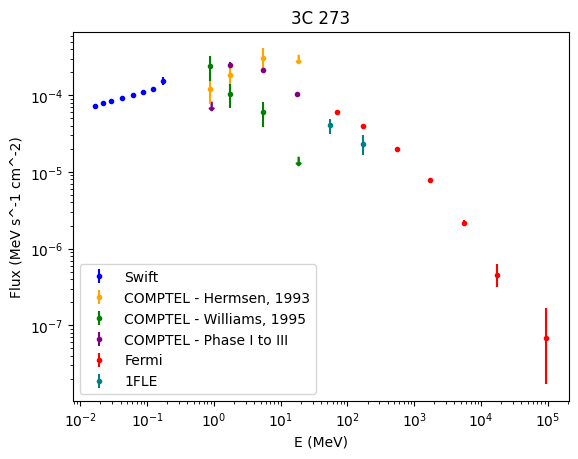

In [346]:
plt.errorbar(Bat_Energy_BandMeV, Obj_3C273_spectra_swift, yerr = Obj_3C273_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(COMPTEL_EnergyBand, Obj_3C273_COMPTEL_EnergyFlux1, yerr = Obj_3C273_COMPTEL_EnergyFlux_err1, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL - Hermsen, 1993')
plt.errorbar(COMPTEL_EnergyBand, Obj_3C273_COMPTEL_EnergyFlux2, yerr = Obj_3C273_COMPTEL_EnergyFlux_err2, fmt = 'o', markersize = 3, color = 'green', label = 'COMPTEL - Williams, 1995')
plt.errorbar(COMPTEL_3C273_EnergyBand3, COMPTEL_3C273_EnergyFlux3, yerr = COMPTEL_3C273_EnergyFlux_err3, fmt = 'o', markersize = 3, color = 'purple', label = 'COMPTEL - Phase I to III')
plt.scatter(math.sqrt(300),Obj_3C273_COMPTEL_EnergyFlux_10_30MEV2, marker = r'$\downarrow$', color = 'green')
plt.scatter(math.sqrt(300),Obj_3C273_COMPTEL_EnergyFlux_10_30MEV1, marker = r'$\downarrow$', color = 'orange')
plt.scatter(math.sqrt(0.75), Obj_3C273_COMPTEL_EnergyFlux_075_1MEV3, marker = r'$\downarrow$', color = 'purple')
plt.errorbar(Fermi_Energy_BandMeV, Obj_3C273_spectra_fermi, yerr = Obj_3C273_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.errorbar(EBuckets, EF_FLE, yerr = EF_FLEe, fmt = 'o', markersize = 3, color = 'teal', label = '1FLE')
plt.legend(loc='lower left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E (MeV)')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('3C 273')

# 3C 279 (Redo)

In [347]:
Obj_3C279_COMPTEL_PhotonFlux_075_1MEV1 = 8.8 * (1e-5)
Obj_3C279_COMPTEL_PhotonFlux_1_3MEV1 = 6.3 * (1e-5)
Obj_3C279_COMPTEL_PhotonFlux_3_10MEV1 = 3.2  * (1e-5)
Obj_3C279_COMPTEL_PhotonFlux_10_30MEV1 = 0.8 * (1e-5)

Obj_3C279_COMPTEL_EnergyFlux_075_1MEV1 = math.sqrt(0.75) * Obj_3C279_COMPTEL_PhotonFlux_075_1MEV1
Obj_3C279_COMPTEL_EnergyFlux_1_3MEV1 = math.sqrt(3) * Obj_3C279_COMPTEL_PhotonFlux_1_3MEV1
Obj_3C279_COMPTEL_EnergyFlux_3_10MEV1 = math.sqrt(30) * Obj_3C279_COMPTEL_PhotonFlux_3_10MEV1
Obj_3C279_COMPTEL_EnergyFlux_10_30MEV1 = math.sqrt(300) * Obj_3C279_COMPTEL_PhotonFlux_10_30MEV1

Obj_3C279_COMPTEL_PhotonFlux_075_1MEV_err1 = 0 * (1e-5)
Obj_3C279_COMPTEL_PhotonFlux_1_3MEV_err1 = 2.0 * (1e-5)
Obj_3C279_COMPTEL_PhotonFlux_3_10MEV_err1 = 0 * (1e-5)
Obj_3C279_COMPTEL_PhotonFlux_10_30MEV_err1 = 0.3 * (1e-5)

Obj_3C279_COMPTEL_EnergyFlux_075_1MEV_err1 = math.sqrt(0.75) * Obj_3C279_COMPTEL_PhotonFlux_075_1MEV_err1
Obj_3C279_COMPTEL_EnergyFlux_1_3MEV_err1 = math.sqrt(3) * Obj_3C279_COMPTEL_PhotonFlux_1_3MEV_err1
Obj_3C279_COMPTEL_EnergyFlux_3_10MEV_err1 = math.sqrt(30) * Obj_3C279_COMPTEL_PhotonFlux_3_10MEV_err1
Obj_3C279_COMPTEL_EnergyFlux_10_30MEV_err1 = math.sqrt(300) * Obj_3C279_COMPTEL_PhotonFlux_10_30MEV_err1

COMPTEL_3C279_EnergyBand_UL1 = [math.sqrt(0.75), math.sqrt(30)]
COMPTEL_3C279_EnergyBand1 = [math.sqrt(3), math.sqrt(300)]

COMPTEL_3C279_EnergyFlux_UL1 = [Obj_3C279_COMPTEL_EnergyFlux_075_1MEV1, Obj_3C279_COMPTEL_PhotonFlux_3_10MEV_err1]
COMPTEL_3C279_EnergyFlux_err1 = [Obj_3C279_COMPTEL_PhotonFlux_1_3MEV_err1, Obj_3C279_COMPTEL_PhotonFlux_10_30MEV_err1]
COMPTEL_3C279_EnergyFlux1 = [Obj_3C279_COMPTEL_EnergyFlux_1_3MEV1, Obj_3C279_COMPTEL_EnergyFlux_10_30MEV1]

In [348]:
Obj_3C279_COMPTEL_PhotonFlux_075_1MEV2 = 5.9 * (1e-5)
Obj_3C279_COMPTEL_PhotonFlux_1_3MEV2 = 6.9 * (1e-5)
Obj_3C279_COMPTEL_PhotonFlux_3_10MEV2 = 1.5  * (1e-5)
Obj_3C279_COMPTEL_PhotonFlux_10_30MEV2 = 1 * (1e-5)

Obj_3C279_COMPTEL_EnergyFlux_075_1MEV2 = math.sqrt(0.75) * Obj_3C279_COMPTEL_PhotonFlux_075_1MEV2
Obj_3C279_COMPTEL_EnergyFlux_1_3MEV2 = math.sqrt(3) * Obj_3C279_COMPTEL_PhotonFlux_1_3MEV2
Obj_3C279_COMPTEL_EnergyFlux_3_10MEV2 = math.sqrt(30) * Obj_3C279_COMPTEL_PhotonFlux_3_10MEV2
Obj_3C279_COMPTEL_EnergyFlux_10_30MEV2 = math.sqrt(300) * Obj_3C279_COMPTEL_PhotonFlux_10_30MEV2

Obj_3C279_COMPTEL_PhotonFlux_075_1MEV_err2 = 3 * (1e-5)
Obj_3C279_COMPTEL_PhotonFlux_1_3MEV_err2 = 2.4 * (1e-5)
Obj_3C279_COMPTEL_PhotonFlux_3_10MEV_err2 = 1 * (1e-5)
Obj_3C279_COMPTEL_PhotonFlux_10_30MEV_err2 = 0.3 * (1e-5)

Obj_3C279_COMPTEL_EnergyFlux_075_1MEV_err2 = math.sqrt(0.75) * Obj_3C279_COMPTEL_PhotonFlux_075_1MEV_err2
Obj_3C279_COMPTEL_EnergyFlux_1_3MEV_err2 = math.sqrt(3) * Obj_3C279_COMPTEL_PhotonFlux_1_3MEV_err2
Obj_3C279_COMPTEL_EnergyFlux_3_10MEV_err2 = math.sqrt(30) * Obj_3C279_COMPTEL_PhotonFlux_3_10MEV_err2
Obj_3C279_COMPTEL_EnergyFlux_10_30MEV_err2 = math.sqrt(300) * Obj_3C279_COMPTEL_PhotonFlux_10_30MEV_err2

COMPTEL_3C279_EnergyBand2 = [math.sqrt(0.75), math.sqrt(3), math.sqrt(30), math.sqrt(300)]

COMPTEL_3C279_EnergyFlux_err2 = [Obj_3C279_COMPTEL_EnergyFlux_075_1MEV_err2, Obj_3C279_COMPTEL_EnergyFlux_1_3MEV_err2, Obj_3C279_COMPTEL_PhotonFlux_3_10MEV_err2, Obj_3C279_COMPTEL_EnergyFlux_10_30MEV_err2]
COMPTEL_3C279_EnergyFlux2 = [Obj_3C279_COMPTEL_EnergyFlux_075_1MEV2, Obj_3C279_COMPTEL_EnergyFlux_1_3MEV2, Obj_3C279_COMPTEL_EnergyFlux_3_10MEV2, Obj_3C279_COMPTEL_EnergyFlux_10_30MEV2]

In [349]:
Obj_3C279_COMPTEL_PhotonFlux_3_10MEV = 13.8 * (1e-5)
Obj_3C279_COMPTEL_PhotonFlux_10_30MEV = 2.9 * (1e-5)

Obj_3C279_COMPTEL_EnergyFlux_3_10MEV = math.sqrt(30) * Obj_3C279_COMPTEL_PhotonFlux_3_10MEV
Obj_3C279_COMPTEL_EnergyFlux_10_30MEV = math.sqrt(300) * Obj_3C279_COMPTEL_PhotonFlux_10_30MEV


Obj_3C279_COMPTEL_PhotonFlux_3_10MEV_err = 0 * (1e-5)
Obj_3C279_COMPTEL_PhotonFlux_10_30MEV_err = 0.9 * (1e-5)


Obj_3C279_COMPTEL_EnergyFlux_3_10MEV_err = math.sqrt(30) * Obj_3C279_COMPTEL_PhotonFlux_3_10MEV_err
#Obj_3C273_COMPTEL_EnergyFlux_10_30MEV1_err = math.sqrt(300) * Obj_3C273_COMPTEL_PhotonFlux_10_30MEV1_err

COMPTEL_EnergyBand = [math.sqrt(30)]
print(COMPTEL_EnergyBand)

Obj_3C279_COMPTEL_EnergyFlux = [Obj_3C279_COMPTEL_PhotonFlux_3_10MEV]
print(Obj_3C279_COMPTEL_EnergyFlux)

Obj_3C279_COMPTEL_EnergyFlux_err = [Obj_3C279_COMPTEL_PhotonFlux_10_30MEV_err]
print(Obj_3C279_COMPTEL_EnergyFlux_err)

[5.477225575051661]
[0.00013800000000000002]
[9e-06]


In [350]:
fermi_obj_name = table['ASSOC1']
objname_fermi = '3C 279                      ' 

wg4 = (fermi_obj_name == objname_fermi)
print(wg4)

table[wg4]

[False False False ... False False False]


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,Variability2_Index,Frac2_Variability,Unc_Frac2_Variability,Signif2_Peak,Flux2_Peak,Unc_Flux2_Peak,Time2_Peak,Peak2_Interval,Flux2_History,Unc_Flux2_History,Sqrt_TS2_History,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,deg,deg,deg,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],"float32[7,2]",float32[7],float32[7],float32,float32,float32,float32,float32,float32,float64,float32,float32[8],"float32[8,2]",float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",float32[48],bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes26,bytes5,bytes5,bytes28,bytes26,float32,float32,float64,float64,float32,int16
4FGL J1256.1-0547,194.0415,-5.7887,305.0952,57.0632,0.0054,0.0054,-80.290,0.0088,0.0088,-80.290,350,,200.439,441.99,2.4531e-08,2.8454e-10,2.7903e-10,2.6584e-12,LogParabola,2.1955e-10,1.8581e-12,2.3381,0.0066,2.3595e-10,2.2839e-12,2.2534,0.0093,0.0699,0.0048,12.667,2.2823e-10,2.0762e-12,2.1557,0.0149,0.00235,0.00018,0.6667,--,12.640,25713.41,5.879691e-07 .. 6.7262994e-11,-3.280813e-08 .. 1.6311114e-11,9.420267e-11 .. 2.5494641e-12,7.1564097 .. 12.653219,5667.2402,0.5543,0.1483,126.090,8.884944e-07,1.1771937e-08,444470016.0,31560000.0,6.327132e-07 .. 3.987742e-07,-9.104593e-09 .. 8.88e-09,115.81551 .. 71.96925,16261.5596,0.9023,0.0933,135.737,2.523134e-06,3.3842028e-08,457620000.0,5260000.0,3.194375e-07 .. 2.8929236e-07,-1.5916243e-08 .. 1.7506382e-08,31.13378 .. 24.628963,3FGL J1256.1-0547,3FHL J1256.1-0547,J1255-0543,3EG J1255-0549,EGR J1256-0552,P,3C 279,FSRQ,,3C 279,,1.0000,1.0000,194.0465,-5.7893,0.00000,0


In [351]:
Obj_3C279_spectra_fermi = []

for gal in table[wg4]:
    Obj_3C279_spectra_fermi.extend(gal['nuFnu_Band'])

#print(Obj_3C111_spectra_fermi)

Obj_3C279_spectra_fermi = [i * (624151) for i in Obj_3C279_spectra_fermi] 

Fermi_Energy_BandMeV = [1000 * math.sqrt(.05*.1), 1000 * math.sqrt(.1*.3), 1000 * math.sqrt(.3*1), 1000 * math.sqrt(1*3), 1000 * math.sqrt(3*10), 1000 * math.sqrt(10*30), 1000 * math.sqrt(30*300)]

print(Fermi_Energy_BandMeV)

print(Obj_3C279_spectra_fermi)

Obj_3C279_spectra_fermi_yerrmin = [3.280801068787295e-06, 1.851202804100966e-06, 5.377148153459105e-07, 4.6769907030168095e-07, 5.061720321495916e-07, 5.602445868928751e-07, 3.33107145009321e-07]
Obj_3C279_spectra_fermi_yerrmax = [3.280801068787295e-06, 1.851202804100966e-06, 5.377148153459105e-07, 4.6769907030168095e-07, 5.061720321495916e-07, 5.602445868928751e-07, 3.858744356349483e-07]

[70.71067811865477, 173.20508075688772, 547.722557505166, 1732.0508075688772, 5477.2255750516615, 17320.508075688773, 94868.32980505137]
[5.879669283001543e-05, 5.39692442235451e-05, 4.3085094015155034e-05, 2.878121231601055e-05, 1.6502839048320242e-05, 6.3296842085771785e-06, 1.5912505749969552e-06]


In [352]:
obj_name = table1['COUNTERPART_NAME']
name = '3C 279'
wg2 = (obj_name == name)
table1[wg2]

Index,BAT_NAME,RA,DEC,SNR,COUNTERPART_NAME,OTHER_NAME,CTPT_RA,CTPT_DEC,FLUX,FLUX_LO,FLUX_HI,CONTA,GAMMA,GAMM_lo,GAMM_hi,CHI_SQ_R,REDSHIFT,LUM,ASSOC_STREN,CL2,TYPE,Energy_err,Flux_err,Flux
,,deg,deg,,,,deg,deg,10^-12er,10^-12er,10^-12er,,,,,,,,,,,keV,keV / (s cm2),keV / (s cm2)
int64,bytes22,bytes7,bytes7,bytes8,bytes30,float64,bytes8,bytes8,bytes8,bytes8,bytes8,bytes5,bytes5,bytes7,bytes7,bytes9,float64,float64,float64,bytes3,bytes25,float64[8],float64[8],float64[8]
645,SWIFT J1256.2-0551,194.053,-5.799,12.29,3C 279,0.0,194.0465,-5.7893,38.82,34.66,42.49,0.0,1.32,1.09,1.54,1.20,0.5362,46.64,0.0,80,Beamed AGN,3.0 .. 22.5,0.00098094705 .. 0.0198482554,0.0032997462 .. -0.00611037342


In [353]:
Obj_3C279_spectra_swift = [] 
Obj_3C279_spectra_swift_err = []

for gal in table1[wg2]:
    Obj_3C279_spectra_swift.extend(gal['Flux'])
    Obj_3C279_spectra_swift_err.extend(gal['Flux_err'])

Bat_Energy_Band = [math.sqrt(14*20), math.sqrt(20*24), math.sqrt(24*35), math.sqrt(35*50), math.sqrt(50*75), math.sqrt(75*100), math.sqrt(100*150), math.sqrt(150*195)]
Bat_Energy_BandMeV = [x * .001 for x in Bat_Energy_Band]
print(Bat_Energy_BandMeV)


Obj_3C279_spectra_swift = [i * (1e-3) for i in Obj_3C279_spectra_swift]
Obj_3C279_spectra_swift_err = [i * (1e-3) for i in Obj_3C279_spectra_swift_err]

print(Obj_3C279_spectra_swift)
print(Obj_3C279_spectra_swift_err)

[0.016733200530681513, 0.021908902300206645, 0.028982753492378877, 0.041833001326703784, 0.06123724356957946, 0.08660254037844387, 0.12247448713915891, 0.1710263137648707]
[3.2997462000000002e-06, 4.36917087e-06, 6.35640323e-06, 7.06777116e-06, 7.05165602e-06, 1.2285606899999999e-05, 2.02630442e-05, -6.11037342e-06]
[9.8094705e-07, 1.08851376e-06, 9.48345696e-07, 1.0645842400000002e-06, 1.28471444e-06, 2.3395870799999997e-06, 4.34819609e-06, 1.98482554e-05]


Text(0.5, 1.0, 'Spectra of Object 3C 279')

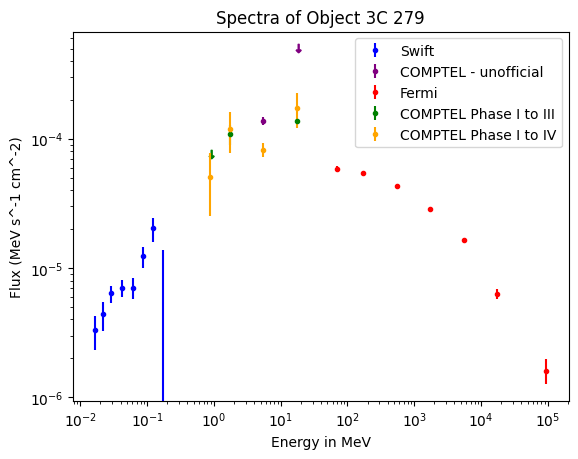

In [354]:
plt.errorbar(Bat_Energy_BandMeV, Obj_3C279_spectra_swift, Obj_3C279_spectra_swift_err, fmt = 'o', markersize = 3, color = 'blue', label = 'Swift')
plt.errorbar(COMPTEL_EnergyBand, Obj_3C279_COMPTEL_EnergyFlux, Obj_3C279_COMPTEL_EnergyFlux_err, fmt = 'o', markersize = 3, color = 'purple', label = 'COMPTEL - unofficial')
plt.scatter(math.sqrt(300),Obj_3C279_COMPTEL_EnergyFlux_10_30MEV, marker = r'$\downarrow$', color = 'purple')
plt.errorbar(Fermi_Energy_BandMeV, Obj_3C279_spectra_fermi, Obj_3C279_spectra_fermi_yerr, fmt = 'o', markersize = 3, color = 'red', label = 'Fermi')
plt.errorbar(COMPTEL_3C279_EnergyBand1, COMPTEL_3C279_EnergyFlux1, yerr = COMPTEL_3C279_EnergyFlux_err1, fmt = 'o', markersize = 3, color = 'green', label = 'COMPTEL Phase I to III')
plt.errorbar(COMPTEL_3C279_EnergyBand2, COMPTEL_3C279_EnergyFlux2, yerr = COMPTEL_3C279_EnergyFlux_err2, fmt = 'o', markersize = 3, color = 'orange', label = 'COMPTEL Phase I to IV')
plt.scatter(COMPTEL_3C279_EnergyBand_UL1, COMPTEL_3C279_EnergyFlux_UL1, marker = r'$\downarrow$', color = 'green')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy in MeV')
plt.ylabel('Flux (MeV s^-1 cm^-2)')
plt.title('Spectra of Object 3C 279')